# Moneyball for Hollywood



## Problem Statement  
  
How to recognize financially successful movie at the very starting point of it's production process by analyzing existing data, using NLP models on keywords from the plot, taglines, cast and crew, as well as entire movie scripts.   
In this project I will work on finding the answer for the question, that every moviemaker-producer-investor asks himself: "Should I start working on this movie or choose another one? Will this one brings some profit to me and my partners(company)?"  
  
I will use few data sets, several most advanced NLP models, my experience as actor and scriptwriter in combination with common sense.
  
First [Data set](../Data/movies_metadata.csv) of about 45000 movies with metadata was collected by [Rounak Banik](https://www.kaggle.com/rounakbanik) from TMDB. These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.  
This dataset consists of the following files:  

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.  

keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.  

credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.  
  
Second [Data set](../Data/Script_budget.csv) of the [movie scripts](https://www.imsdb.com/all%20scripts/) from www.imsdb.com, it's [budgets and revenues](https://www.the-numbers.com/movie/budgets/all/5601) from www.the-numbers.com/movie/budgets in combination with budgets and revenues from [metadata set]('../Data/movies_metadata.csv') I created myself.  

First let's import necessary libraries and datasets.

In [2]:
import numpy as np
import pandas as pd
import ast
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('../Data/movies_metadata.csv')
df.head()

/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
key_df = pd.read_csv('../Data/keywords.csv')
key_df.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [5]:
cr_df = pd.read_csv('../Data/credits.csv')
cr_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

### Looks like few raws in 'movies_metadata' table was brutally shifted, so I would like to drop them before merging with other tables.

In [7]:
df.iloc[19730]

adult                                                   - Written by Ørnås
belongs_to_collection                                             0.065736
budget                                    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
genres                   [{'name': 'Carousel Productions', 'id': 11176}...
homepage                 [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
id                                                              1997-08-20
imdb_id                                                                  0
original_language                                                    104.0
original_title                    [{'iso_639_1': 'en', 'name': 'English'}]
overview                                                          Released
popularity                                                             NaN
poster_path                                                   Midnight Man
production_companies                                                 False
production_countries     

In [8]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

### Also that probably was a reson that 'Id' column is an object. In order to merge tables on 'Id' I gonna change it to integer.

In [9]:
df['id'] = pd.to_numeric(df['id'])
df.shape

(45463, 24)

### Now I will merge all 3 tables.

In [10]:
df_merge = df.merge(key_df, on=["id"],how="left")
df_merge.shape

(46483, 25)

In [11]:
df = df_merge.merge(cr_df, on=["id"],how="left")
df.shape

(46629, 27)

In [12]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46629 entries, 0 to 46628
Data columns (total 27 columns):
adult                    46629 non-null object
belongs_to_collection    4574 non-null object
budget                   46629 non-null object
genres                   46629 non-null object
homepage                 8009 non-null object
id                       46629 non-null int64
imdb_id                  46612 non-null object
original_language        46618 non-null object
original_title           46629 non-null object
overview                 45634 non-null object
popularity               46625 non-null object
poster_path              46230 non-null object
production_companies     46625 non-null object
production_countries     46625 non-null object
release_date             46541 non-null object
revenue                  46625 non-null float64
runtime                  46361 non-null float64
spoken_languages         46625 non-null object
status                   46543 non-null object

### Now I want to remove all the columns that looks not appropriate or unnessesary to me considering our goal. Also will clean some of the columns and give it a right type.

In [14]:
df.drop(columns=['adult', 'id', 'imdb_id', 'original_language', 'original_title',
                'poster_path', 'status', 'video'], inplace=True)

In [15]:
df.iloc[0]

belongs_to_collection    {'id': 10194, 'name': 'Toy Story Collection', ...
budget                                                            30000000
genres                   [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
homepage                              http://toystory.disney.com/toy-story
overview                 Led by Woody, Andy's toys live happily in his ...
popularity                                                         21.9469
production_companies        [{'name': 'Pixar Animation Studios', 'id': 3}]
production_countries     [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                    1995-10-30
revenue                                                        3.73554e+08
runtime                                                                 81
spoken_languages                  [{'iso_639_1': 'en', 'name': 'English'}]
tagline                                                                NaN
title                    

I believe that belonging to collection and having a website will affect the revenue, so I will make a boolean out of this two features.

In [16]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 1 if isinstance(x, str) else 0)
df['homepage'] = df['homepage'].apply(lambda x: 1 if isinstance(x, str) else 0)

There is a lot of zeros in budget and revenue. I gonna fill them with NaNs and turn budget into the int type.  
As well as runtime.

In [17]:
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df['budget'] = [x if x > 10000 else np.nan for x in df['budget']]
df['revenue'] = [x if x > 10000 else np.nan for x in df['revenue']]

In [18]:
df['runtime'] = [x if x > 0 else np.nan for x in df['runtime']]

Genres, production_companies, production_countries, spoken_languages, cast and crew is the stringified JSON Object. I will extract the information we need out of it.

In [19]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval)
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [20]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [21]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [22]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [23]:
liste = []
for i in df['spoken_languages'] :
    if i != []:
        liste.append(i[0])
    else :
        liste.append(np.NaN)

df['spoken_languages'] = liste

In [24]:
df['cast'] = df['cast'].fillna('[]').apply(ast.literal_eval)
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [25]:
df['crew'] = df['crew'].fillna('[]').apply(ast.literal_eval)

In [26]:
def director(d):
    for n in d:
        if n['job'] == 'Director':
            return n['name']
    return np.nan
df['director'] = df['crew'].apply(director)

In [27]:
df['keywords'] = df['keywords'].fillna('[]').apply(ast.literal_eval)
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [28]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

## Change date column to be datetime dtype

In [29]:
df.release_date = pd.to_datetime(df.release_date)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46629 entries, 0 to 46628
Data columns (total 20 columns):
belongs_to_collection    46629 non-null int64
budget                   8722 non-null float64
genres                   46629 non-null object
homepage                 46629 non-null int64
overview                 45634 non-null object
popularity               46625 non-null float64
production_companies     46629 non-null object
production_countries     46629 non-null object
release_date             46541 non-null datetime64[ns]
revenue                  7292 non-null float64
runtime                  44733 non-null float64
spoken_languages         42667 non-null object
tagline                  20783 non-null object
title                    46625 non-null object
vote_average             46625 non-null float64
vote_count               46625 non-null float64
keywords                 46629 non-null object
cast                     46629 non-null object
crew                     46629 non-

In [31]:
df.drop(index = 37160, inplace=True)

df[df['title'] == 'The Guide']

,belongs_to_collection,budget,genres,homepage,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,keywords,cast,crew,director
22516,0,NaN,[Comedy],1,Nine frustrated young architects in an equally...,0.042369,[],[],2011-04-27,NaN,94.0,English,The guide is never part of the group,The Guide,10.0,1.0,[],[],[],NaN
37161,0,722083.0,"[History, Drama]",0,American boy Peter and blind minstrel Ivan are...,0.817488,[],[Ukraine],2014-11-12,499168.0,120.0,English,NaN,The Guide,8.6,6.0,[],"[Stanislav Boklan, Jeff Burrell, Anton Sviatos...","[{'credit_id': '54182fd3c3a36819a4002ddd', 'de...",Oles Sanin


In [32]:
df.drop(index = 37246, inplace=True)
df[df['title'] == 'Me Before You']

,belongs_to_collection,budget,genres,homepage,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,keywords,cast,crew,director
37247,0,20000000.0,"[Drama, Romance]",1,A small town girl is caught between dead-end j...,34.34759,"[New Line Cinema, Sunswept Entertainment, Metr...",[United States of America],2016-06-02,207945075.0,110.0,English,#LiveBoldly,Me Before You,7.6,2674.0,"[england, based on novel, depression, small to...","[Emilia Clarke, Sam Claflin, Janet McTeer, Cha...","[{'credit_id': '56b778879251416615006f86', 'de...",Thea Sharrock


## Now I want to save this DataFrame to the csv file. Just in case...

In [33]:
df.to_csv('../Data/Clean_movies.csv',index=True)

## Data dictionary:

|Feature|Type|Description|
|---|---|---| 
|**belongs_to_collection**|*int*|Binary column that indicates if the movie belongs to collection|
|**budget**|*float*|The budget of the movie in dollars|
|**genres**|*object*|A list of all the genres associated with the movie|
|**homepage**|*int*|Binary column that indicates if the movie has a homepage|
|**overview**|*object*|A brief overview of the movie|
|**popularity**|*float*|The Popularity Score assigned by TMDB|
|**production_companies**|*object*|A list of production companies involved with the making of the movie|
|**production_countries**|*object*|A list of countries where the movie was shot|
|**release_date**|*datetime*|Release Date of the movie|
|**revenue**|*float*|The total revenue of the movie in US dollars|
|**runtime**|*float*|Duration of the movie in minutes|
|**spoken_languages**|*object*|A list of spoken languages in the movie|  
|**tagline**|*object*|The tagline of the movie|  
|**title**|*object*|The Official Title of the movie|  
|**vote_average**|*float*|The average voting rating of the movie, as counted by TMDB|  
|**vote_count**|*float*|The number of votes, as counted by TMDB|  
|**keywords**|*object*|The movie plot keywords|  
|**cast**|*object*|Names of the cast of the movie|  
|**crew**|*object*|Names of the crew of the movie|

## EDA and Vizualization

Because the main goal of this project is to predict financial success of the movie, I will explore and explain everything that related to it.  

First I will determine what is it exactly - financially successful movie.  

Financially successful movie is the movie, whose creators (filmmakers) get some profit out of this movie. According to my experience and knowledge, as well to some movie produccers I've met in Hollywood and New York, very rough formula for detecting creator's profit is:  

Cumulative Worldwide Gross (from movie theatres, DVDs, TV, Video Stream services, etc.) minus Budget (actual spends to produce the movie) minus Releasing Expences (marketing, advertising, sales taxes, theatres-DVDs-TV-VideoStreamServices's share, distributor’s fee, sales agents costs etc.). So if you are lucky enough your Releasing Expences will be around your Movie Budget.  
  
### NB! It is very rough and generalized estimate of the Releasing Expences, that can change drastically from case to case.

I will subtract Releasing Expences (equal to the budget) from the Gross first and then will count how many budgets creators get back.  
  
### NB! Again, it is still very rough and generalized formula . It is possible to make it more sofisticated and percise once I will have access to all the numbers related to Releasing Expences in each individual case, and of course THE REAL budget, before it's adjastments for IRS, if such action had have a place.

So for now the formula is:  
  
  ### (Gross - Release_expenses) / Budget

In [34]:
df['success'] = (df['revenue'] - df['budget']) / df['budget']

In [35]:
df_suc = pd.DataFrame(df.dropna(subset=['success']))

I will create a binary column, that indicates if the movie made any profit or not and called it success_binary.

In [36]:
df_suc['success_binary']= [1 if x > 1 else 0 for x in df_suc['success']]

In [37]:
df_suc['success_binary'].mean()

0.511971567527123

We have a perfect ballance between successful movies and not successful out of 5347 observations.

## Now I want to explore how different features correlated with success

In [38]:
df_suc.head()

,belongs_to_collection,budget,genres,homepage,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,keywords,cast,crew,director,success,success_binary
0,1,30000000.0,"[Animation, Comedy, Family]",1,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,...,NaN,Toy Story,7.7,5415.0,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,11.451801,1
1,0,65000000.0,"[Adventure, Fantasy, Family]",0,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,3.043035,1
3,0,16000000.0,"[Comedy, Drama, Romance]",0,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,...,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,4.090760,1
5,0,60000000.0,"[Action, Crime, Drama, Thriller]",0,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,...,A Los Angeles Crime Saga,Heat,7.7,1886.0,"[robbery, detective, bank, obsession, chase, s...","[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",Michael Mann,2.123947,1
8,0,35000000.0,"[Action, Adventure, Thriller]",0,International action superstar Jean Claude Van...,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171.0,...,Terror goes into overtime.,Sudden Death,5.5,174.0,"[terrorist, hostage, explosive, vice president]","[Jean-Claude Van Damme, Powers Boothe, Dorian ...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",Peter Hyams,0.838576,0


In [39]:
df_suc.describe()

,belongs_to_collection,budget,homepage,popularity,revenue,runtime,vote_average,vote_count,success,success_binary
count,5346.000000,5.346000e+03,5346.000000,5346.000000,5.346000e+03,5335.000000,5346.000000,5346.000000,5346.000000,5346.000000
mean,0.229704,3.158173e+07,0.357651,9.858997,9.162240e+07,110.267854,6.279929,740.349420,7.463257,0.511972
std,0.420682,4.023052e+07,0.479353,13.843350,1.670044e+08,21.441544,0.910300,1255.515257,186.203614,0.499903
min,0.000000,1.117800e+04,0.000000,0.000657,1.001800e+04,26.000000,0.000000,0.000000,-0.999486,0.000000
25%,0.000000,6.000000e+06,0.000000,5.549840,7.826403e+06,95.000000,5.700000,81.000000,-0.191473,0.000000
50%,0.000000,1.750000e+07,0.000000,8.438197,3.100000e+07,106.000000,6.300000,282.000000,1.067341,1.000000
75%,0.000000,4.000000e+07,1.000000,11.787054,1.005153e+08,120.000000,6.900000,812.000000,3.239585,1.000000
max,1.000000,3.800000e+08,1.000000,547.488298,2.787965e+09,338.000000,9.100000,14075.000000,12889.386667,1.000000


In [40]:
df_suc.corr()

,belongs_to_collection,budget,homepage,popularity,revenue,runtime,vote_average,vote_count,success,success_binary
belongs_to_collection,1.000000,0.207711,0.065691,0.153033,0.340529,-0.084359,-0.048295,0.267446,0.041892,0.280501
budget,0.207711,1.000000,0.252569,0.305043,0.728831,0.184973,-0.012152,0.584355,-0.023454,0.057070
homepage,0.065691,0.252569,1.000000,0.165014,0.267562,0.013569,0.061002,0.320320,0.022914,0.083626
popularity,0.153033,0.305043,0.165014,1.000000,0.438468,0.082284,0.160121,0.477548,0.007219,0.145115
revenue,0.340529,0.728831,0.267562,0.438468,1.000000,0.183817,0.168041,0.769681,0.018385,0.365989
runtime,-0.084359,0.184973,0.013569,0.082284,0.183817,1.000000,0.327605,0.196021,-0.025369,0.059281
vote_average,-0.048295,-0.012152,0.061002,0.160121,0.168041,0.327605,1.000000,0.321690,0.003777,0.249284
vote_count,0.267446,0.584355,0.320320,0.477548,0.769681,0.196021,0.321690,1.000000,0.012248,0.316309
success,0.041892,-0.023454,0.022914,0.007219,0.018385,-0.025369,0.003777,0.012248,1.000000,0.039972
success_binary,0.280501,0.057070,0.083626,0.145115,0.365989,0.059281,0.249284,0.316309,0.039972,1.000000


/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


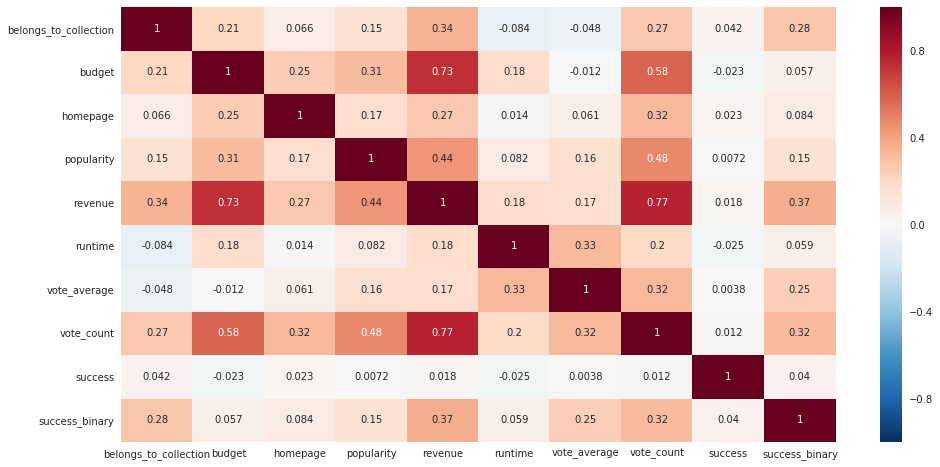

In [41]:
plt.figure(figsize = (16, 8))
sns.heatmap(df_suc.corr(), annot=True);

Very interesting results. Amount of budgets you are going to make or lose doesn't correlate with anything... Will you make any money or will lose - slightly correlated with it's belonging to collection. I wouldn't consider it's correlation with revenue and vote_count, because those features is actually aftermath. Let's explore this dataset deeper anyway, before we will make any models and/or conclusions.

# Exploring Budgets, Revenues and Success (how many budgets returned)

/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


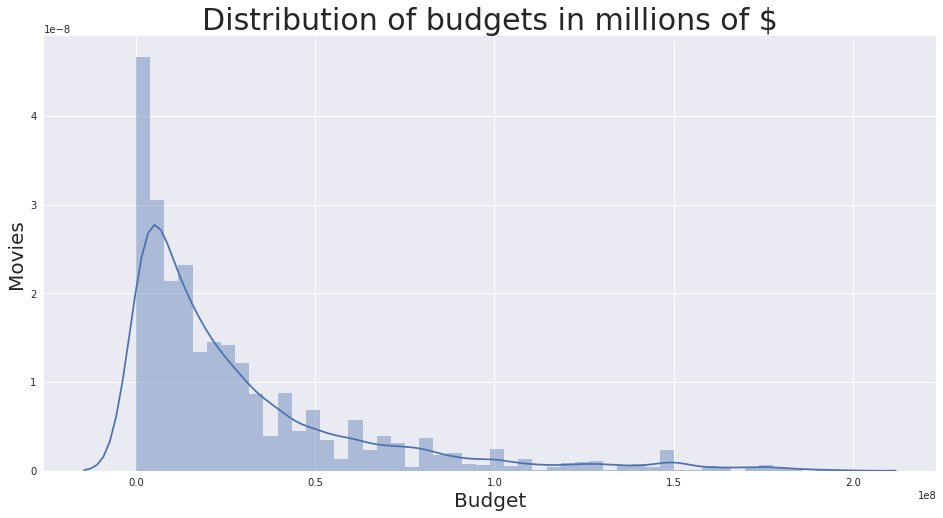

In [42]:
plt.figure(figsize = (16, 8))
sns.distplot(df_suc[df_suc['budget'] < 200_000_000]['budget'])
plt.ylabel('Movies', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Distribution of budgets in millions of $', size = 30);

### Most of the movies has a budget less than $40 millions.

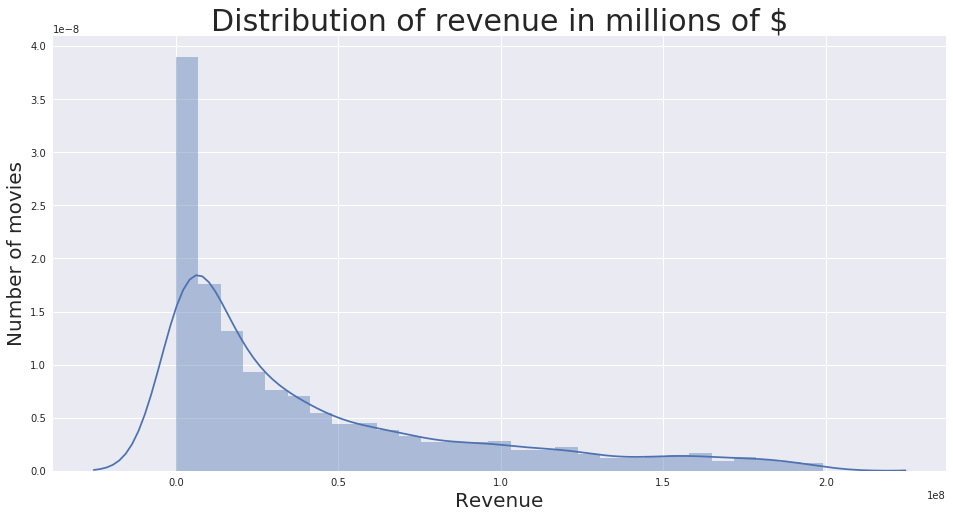

In [43]:
plt.figure(figsize = (16, 8))
sns.distplot(df_suc[df_suc['revenue'] < 200_000_000]['revenue'])
plt.ylabel('Number of movies', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Distribution of revenue in millions of $', size = 30);

### Most of the movies has the revenue less than $50 millions

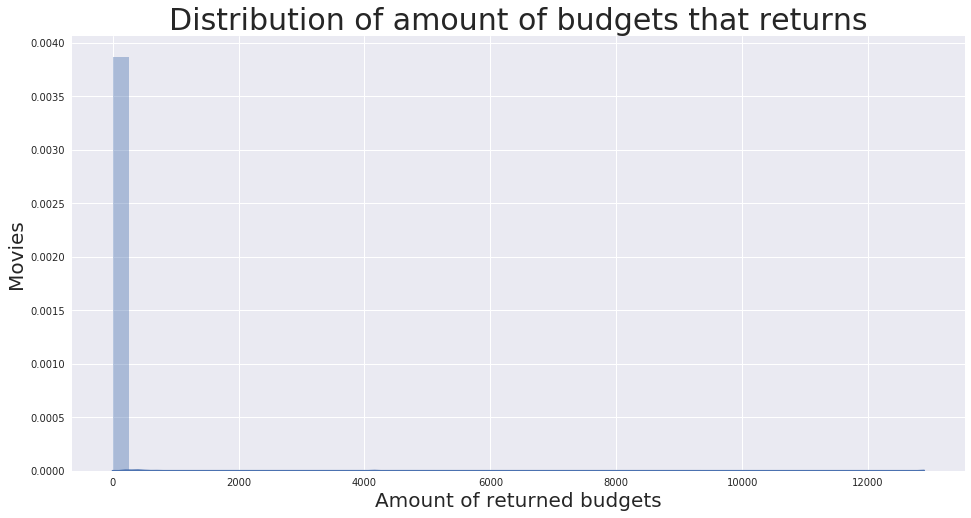

In [44]:
plt.figure(figsize = (16, 8))
sns.distplot(df_suc['success'])
plt.ylabel('Movies', fontsize=20)
plt.xlabel('Amount of returned budgets', fontsize=20)
plt.title('Distribution of amount of budgets that returns', size = 30);

### Success looks very skewed because of some lucky outliers. Let's see the actual numbers.  

I'll translate all budgets and revenues into millions by dividing it by 1.000.000, so it will be easier for us to read.

In [45]:
df_exp = pd.DataFrame(df_suc)
df_exp['budget'] = df_exp['budget'] / 1_000_000
df_exp['revenue'] = df_exp['revenue'] / 1_000_000

In [46]:
print("Mean budget:            " + str(df_exp['budget'].mean()))
print("Median budget:          " + str(df_exp['budget'].median()))
print("Most frequent budget:   " + str(df_exp['budget'].mode()))

Mean budget:            31.58173273363262
Median budget:          17.5
Most frequent budget:   0    20.0
dtype: float64


In [47]:
print("Mean revenue:     " + str(df_suc['revenue'].mean()))
print("Median revenue:   " + str(df_suc['revenue'].median()))

Mean revenue:     91.62239610587355
Median revenue:   31.0


In [48]:
print("Mean of amout of budgets that returned:   " + str(df_suc['success'].mean()))
print("Median of amout of budgets that returned: " + str(df_suc['success'].median()))

print("Max amout of budgets that returned:       " + str(df_suc['success'].max()))
print("Min of amout of budgets that returned:    " + str(df_suc['success'].min()))

Mean of amout of budgets that returned:   7.463256799148402
Median of amout of budgets that returned: 1.0673413912280703
Max amout of budgets that returned:       12889.386666666667
Min of amout of budgets that returned:    -0.99948555


#### Mean success looks skewed because of outliers, but median success shows us that mutual profit for 5347 movies we have here is 0.068 %. This is makes sense, while we know that we have 51 % of successful movies and 49 % of not successful.

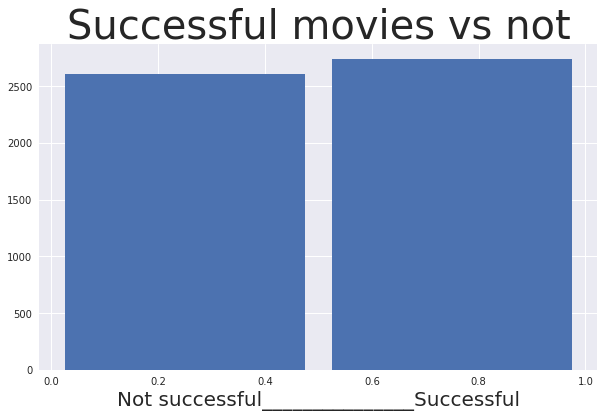

In [49]:
plt.figure(figsize = (10, 6))
plt.hist(df_suc['success_binary'], bins=2, rwidth=0.9)
plt.title('Successful movies vs not', fontsize = 40)
plt.xlabel('Not successful_______________Successful', fontsize=20);

## Movies with a biggest budget

#### For further exploration I will create the budget raiting column, so we can easily see the position of each movie in the "budget raiting list".

In [50]:
df_bud_rait = df_exp.sort_values('budget', ascending=False)

df_bud_rait.reset_index(inplace=True)

df_bud_rait['budget_raiting'] = df_bud_rait.index +1

In [51]:
df_bud_rait[['title','release_date', 'budget', 'revenue', 'success',
        'budget_raiting']].sort_values('budget', ascending=False).head(15)

,title,release_date,budget,revenue,success,budget_raiting
0,Pirates of the Caribbean: On Stranger Tides,2011-05-14,380.0,1045.713802,1.751878,1
1,Pirates of the Caribbean: At World's End,2007-05-19,300.0,961.000000,2.203333,2
2,Avengers: Age of Ultron,2015-04-22,280.0,1405.403694,4.019299,3
3,Superman Returns,2006-06-28,270.0,391.081192,0.448449,4
4,Tangled,2010-11-24,260.0,591.794936,1.276134,5
5,Transformers: The Last Knight,2017-06-21,260.0,604.942143,1.326701,6
6,John Carter,2012-03-07,260.0,284.139100,0.092843,7
7,Spider-Man 3,2007-05-01,258.0,890.871626,2.452991,8
8,The Lone Ranger,2013-07-03,255.0,89.289910,-0.649843,9
14,The Hobbit: The Battle of the Five Armies,2014-12-10,250.0,956.019788,2.824079,15


/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


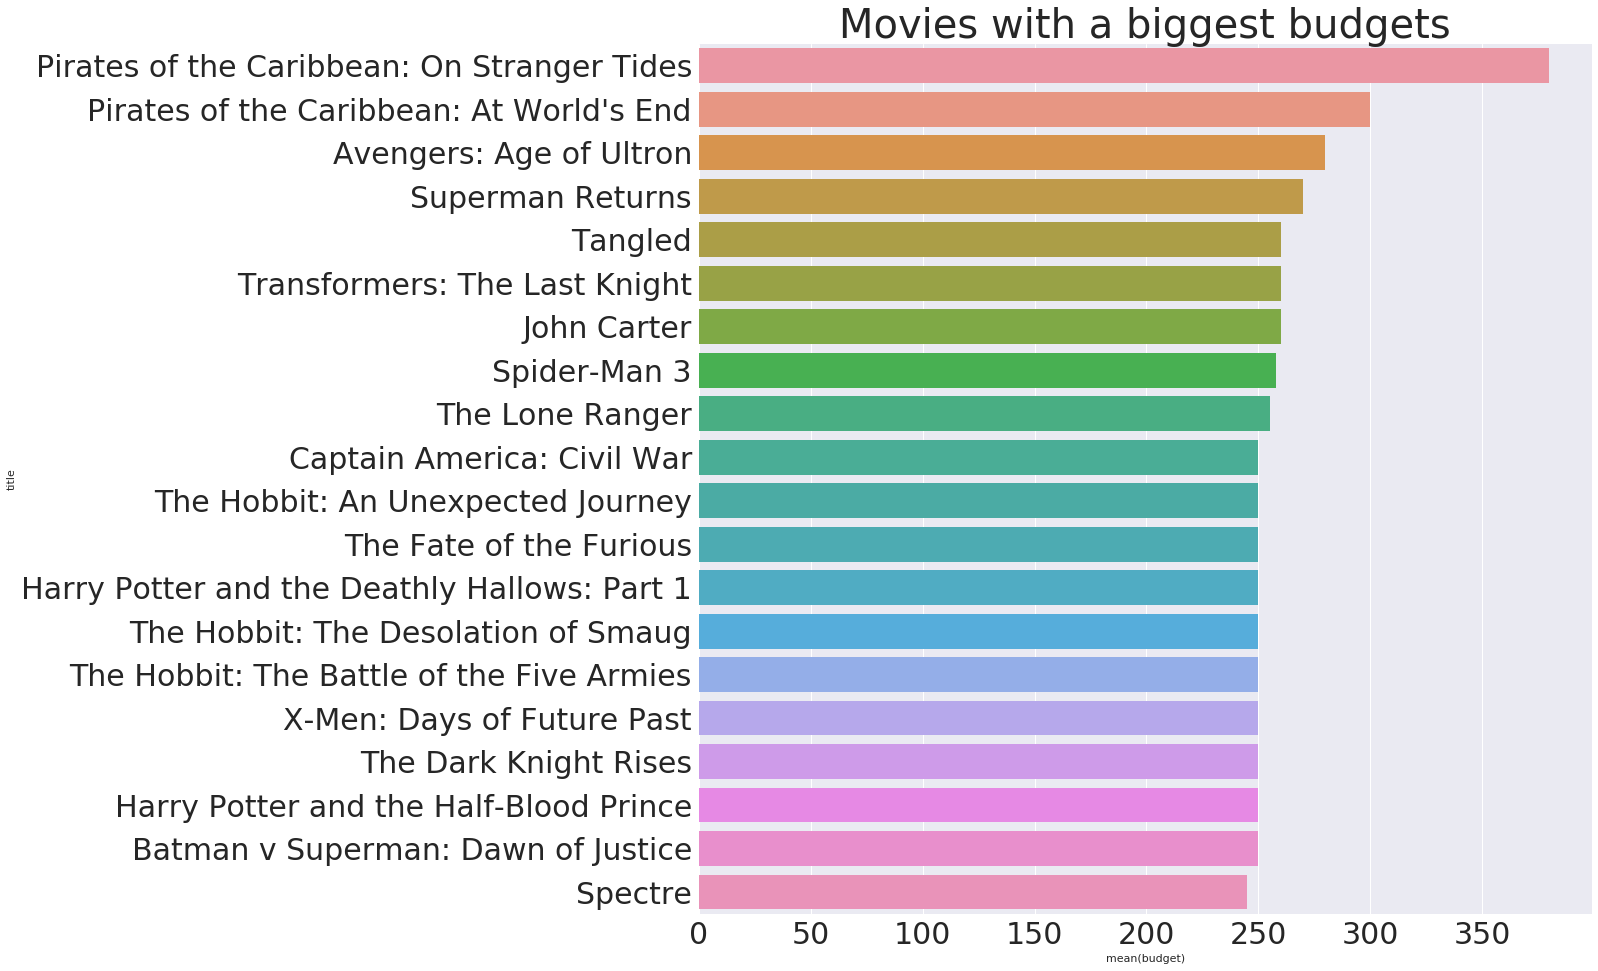

In [52]:
plt.figure(figsize=(16, 16))

df_tit_bud = df_exp[['title', 'budget']].sort_values('budget', ascending=False).head(20)
sns.barplot(x = df_tit_bud['budget'], y = df_tit_bud['title'])
plt.title('Movies with a biggest budgets', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

## Movies with a biggest revenue

In [53]:
df_bud_rait[['title','release_date', 'revenue',  'budget', 'success',
        'budget_raiting']].sort_values('revenue', ascending=False).head(15)

,title,release_date,revenue,budget,success,budget_raiting
21,Avatar,2009-12-10,2787.965087,237.0,10.763566,22
20,Star Wars: The Force Awakens,2015-12-15,2068.223624,245.0,7.441729,21
52,Titanic,1997-11-18,1845.034188,200.0,8.225171,53
26,The Avengers,2012-04-25,1519.557910,220.0,5.907081,27
147,Jurassic World,2015-06-09,1513.528810,150.0,9.090192,148
58,Furious 7,2015-04-01,1506.249360,190.0,6.927628,59
2,Avengers: Age of Ultron,2015-04-22,1405.403694,280.0,4.019299,3
251,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1342.000000,125.0,9.736000,252
150,Frozen,2013-11-27,1274.219009,150.0,7.494793,151
108,Beauty and the Beast,2017-03-16,1262.886337,160.0,6.893040,109


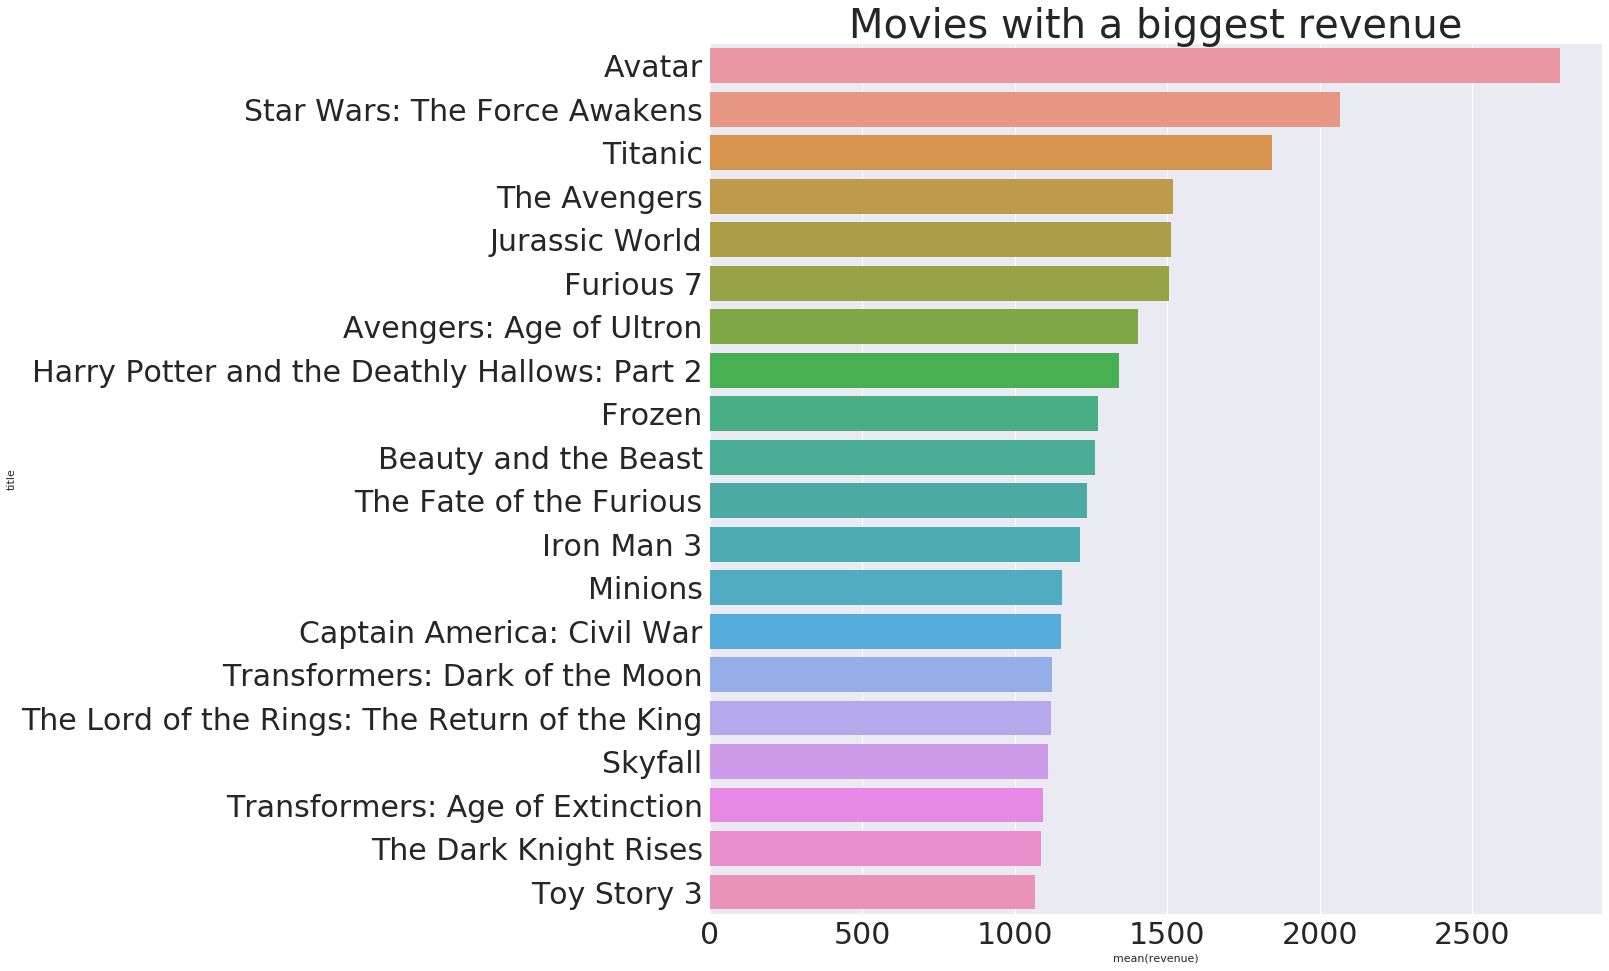

In [54]:
plt.figure(figsize=(16, 16))

df_tit_rev = df_exp[['title', 'revenue']].sort_values('revenue', ascending=False).head(20)
sns.barplot(x = 'revenue', y = 'title', data=df_tit_rev)
plt.title('Movies with a biggest revenue', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

## Movies with a smallest budget

In [55]:
df_bud_rait[['title','release_date', 'budget', 'revenue', 'success',
        'budget_raiting']].sort_values('budget', ascending=True).head(15)

,title,release_date,budget,revenue,success,budget_raiting
5345,Voracious,2012-09-05,0.011178,0.034659,2.100644,5346
5344,Captive,2012-09-05,0.011180,0.024591,1.199553,5345
5343,Pink Flamingos,1972-03-12,0.012000,6.000000,499.000000,5344
5342,Paranormal Activity,2007-09-14,0.015000,193.355800,12889.386667,5343
5341,Robot Monster,1953-06-25,0.016000,1.000000,61.500000,5342
5340,Bellflower,2011-04-16,0.017000,0.101236,4.955059,5341
5339,The Cheat,1915-12-13,0.017311,0.137365,6.935128,5340
5338,Godfather,1991-03-03,0.018000,0.700000,37.888889,5339
5337,Cure,1997-11-06,0.020000,0.099000,3.950000,5338
5336,Remington and the Curse of the Zombadings,2011-08-31,0.022361,0.721651,31.272752,5337


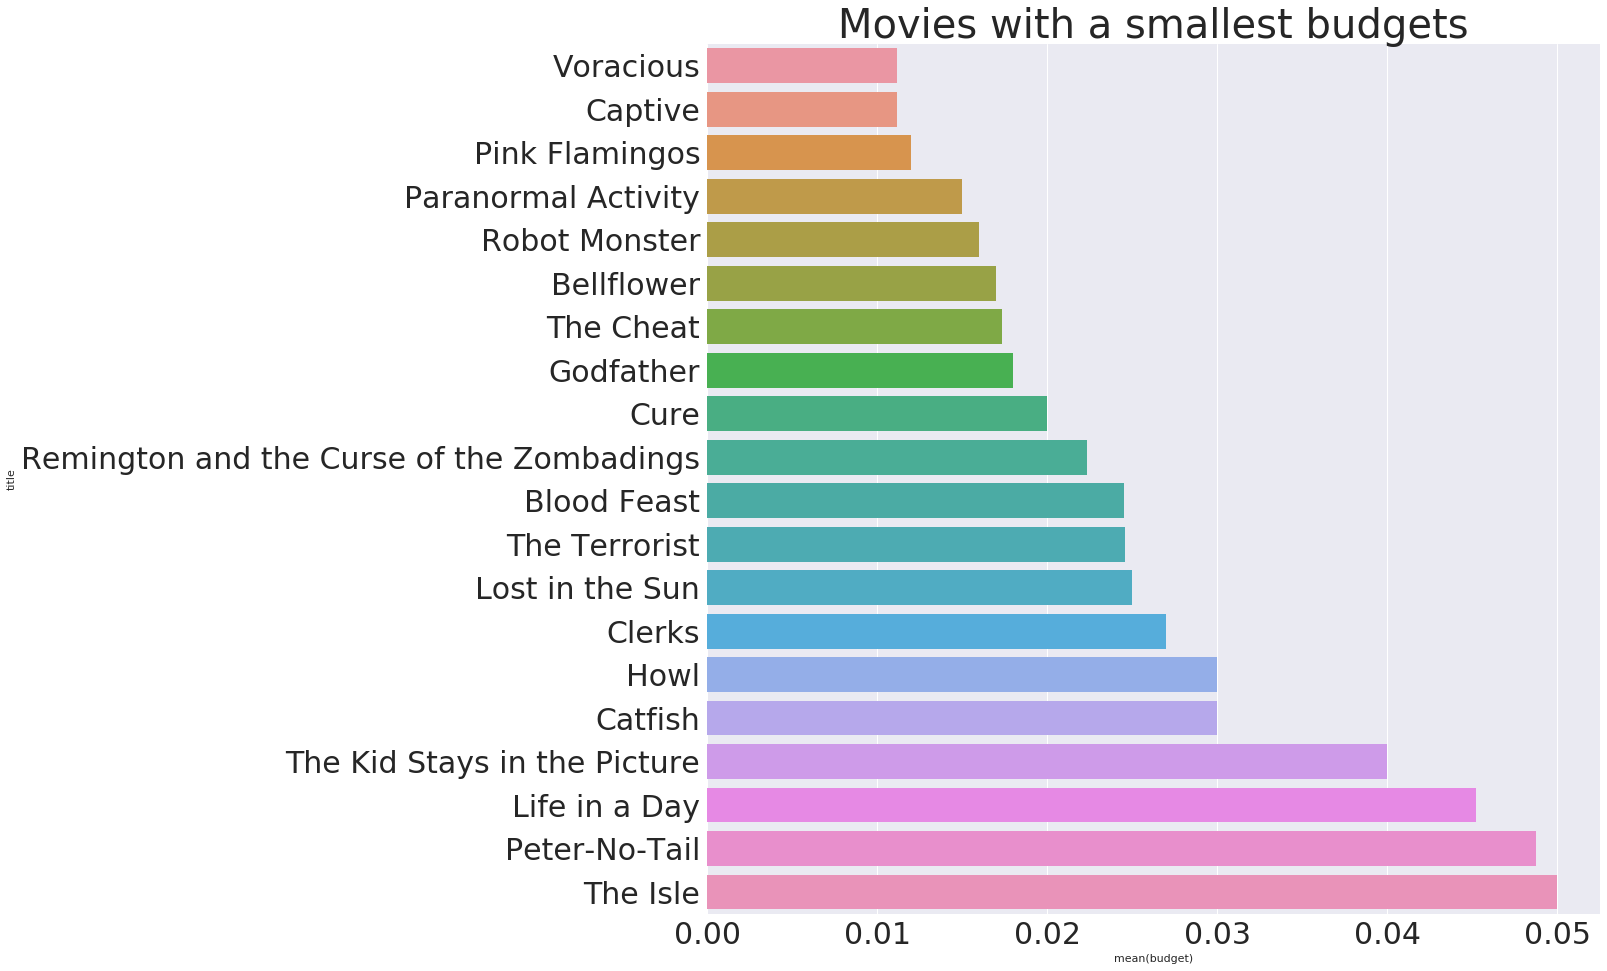

In [56]:
plt.figure(figsize=(16, 16))

df_tit_bud = df_exp[['title', 'budget']].sort_values('budget', ascending=True).head(20)
sns.barplot(x = df_tit_bud['budget'], y = df_tit_bud['title'])
plt.title('Movies with a smallest budgets', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

## Movies with a smallest revenue

In [57]:
df_bud_rait[['title','release_date','revenue', 'budget', 'success',
        'budget_raiting']].sort_values('revenue', ascending=True).head(15)

,title,release_date,revenue,budget,success,budget_raiting
4976,Alone With Her,2006-04-28,0.010018,1.000,-0.989982,4977
2384,Chaos,2005-01-17,0.010289,20.000,-0.999486,2385
5148,Squeeze,1997-06-06,0.010300,0.500,-0.979400,5149
5278,Logan,2010-09-10,0.010474,0.135,-0.922415,5279
5101,Naturally Native,1999-10-08,0.010508,0.700,-0.984989,5102
3436,Special Forces,2011-11-02,0.010759,10.000,-0.998924,3437
5153,Peter and Vandy,2009-01-01,0.011276,0.500,-0.977448,5154
4998,Waltzing Anna,2006-08-11,0.011455,1.000,-0.988545,4999
3543,Laurence Anyways,2012-05-18,0.012250,9.500,-0.998711,3544
4832,Standing Still,2005-01-02,0.012762,1.700,-0.992493,4833


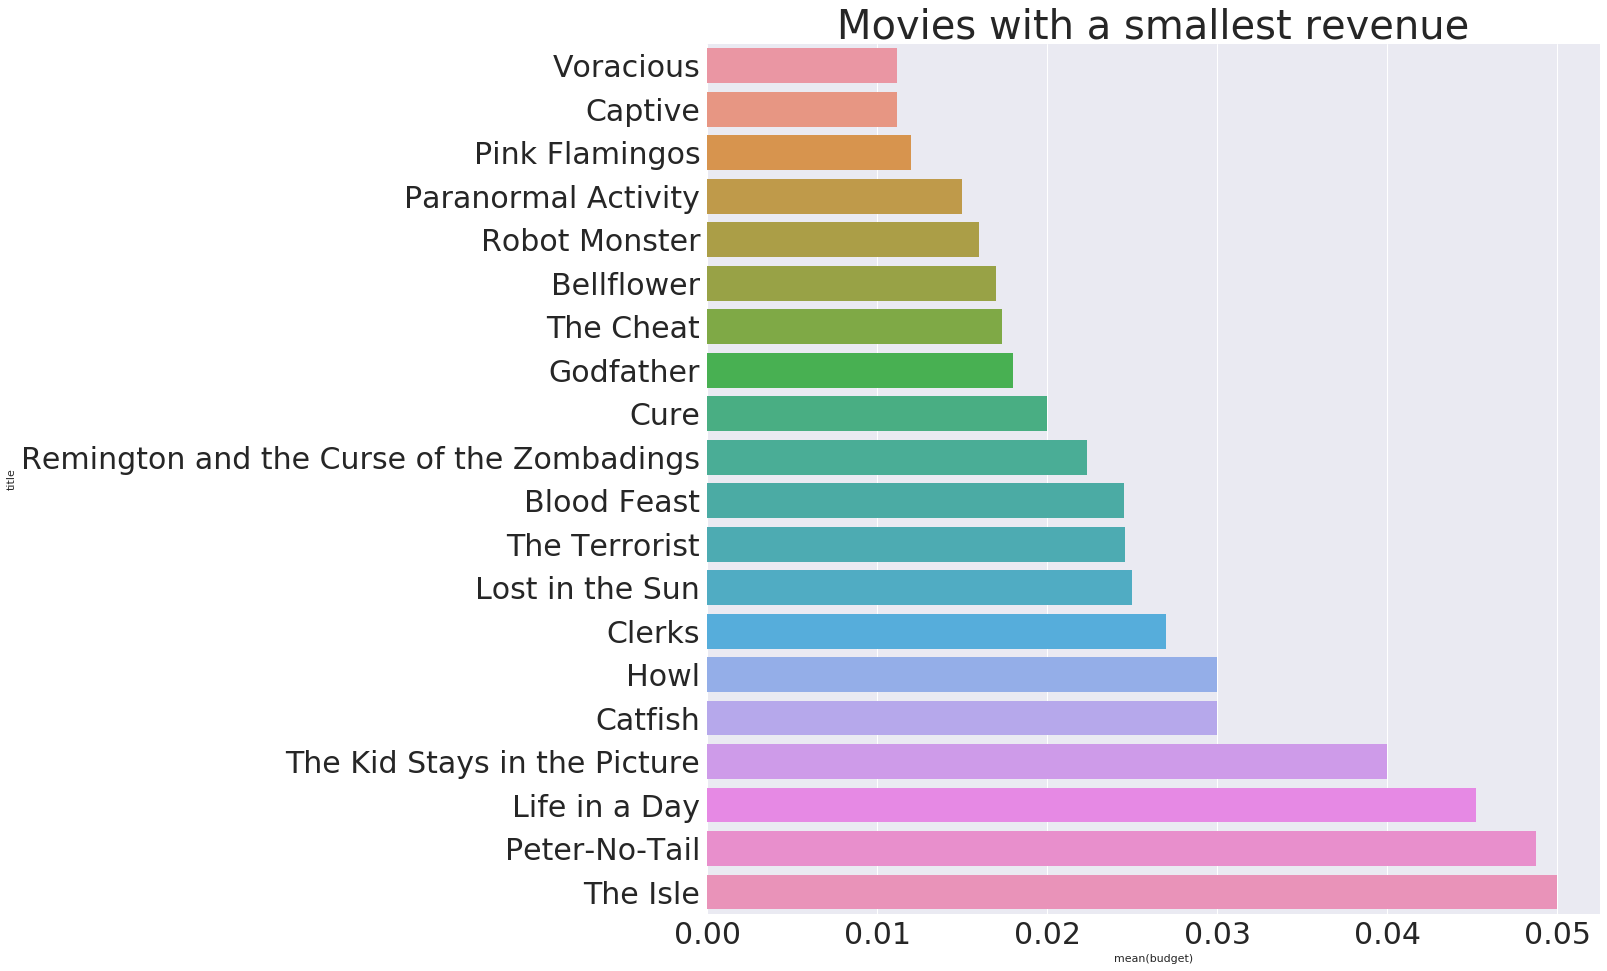

In [58]:
plt.figure(figsize=(16, 16))

df_tit_rev = df_exp[['title', 'budget']].sort_values('budget', ascending=True).head(20)
sns.barplot(x = df_tit_rev['budget'], y = df_tit_rev['title'])
plt.title('Movies with a smallest revenue', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

## Most successful movies

In [59]:
df_bud_rait[['title','release_date','success','revenue', 'budget',
        'budget_raiting']].sort_values('success', ascending=False).head(15)

,title,release_date,success,revenue,budget,budget_raiting
5342,Paranormal Activity,2007-09-14,12889.386667,193.355800,0.015,5343
5322,The Blair Witch Project,1999-07-14,4132.333333,248.000000,0.060,5323
5284,The Way of the Dragon,1972-06-01,652.846154,85.000000,0.130,5285
5343,Pink Flamingos,1972-03-12,499.000000,6.000000,0.012,5344
5318,Super Size Me,2004-01-17,438.616585,28.575078,0.065,5319
5305,The Gallows,2015-07-10,425.644100,42.664410,0.100,5306
5282,Open Water,2004-08-06,419.522723,54.667954,0.130,5283
5308,The Texas Chain Saw Massacre,1974-10-01,362.047059,30.859000,0.085,5309
5051,Bambi,1942-08-14,310.709965,267.447150,0.858,5052
5289,Night of the Living Dead,1968-10-01,262.157895,30.000000,0.114,5290


## Most successful movies with $1+ million budget

In [60]:
df_bud_rait[df_bud_rait['budget'] >= 1][['title','release_date','success','budget','revenue',
        'budget_raiting']].sort_values('success', ascending=False).head(15)

,title,release_date,success,budget,revenue,budget_raiting
4506,Alice in Wonderland,1951-07-03,189.666667,3.000000,572.000000,4507
4885,Snow White and the Seven Dwarfs,1937-12-20,123.242561,1.488423,184.925486,4886
4999,Rocky,1976-11-21,116.235147,1.000000,117.235147,5000
4988,The Devil Inside,2012-01-06,100.758490,1.000000,101.758490,4989
4296,Gone with the Wind,1939-12-15,99.044115,4.000000,400.176459,4297
4690,Lost in Thailand,2012-12-12,93.545455,2.200000,208.000000,4691
4936,The Rocky Horror Picture Show,1975-08-14,93.076932,1.200000,112.892319,4937
4585,Cinderella,1950-03-04,89.893591,2.900000,263.591415,4586
4934,Saw,2004-10-01,85.593058,1.200000,103.911669,4935
3372,E.T. the Extra-Terrestrial,1982-04-03,74.520507,10.500000,792.965326,3373


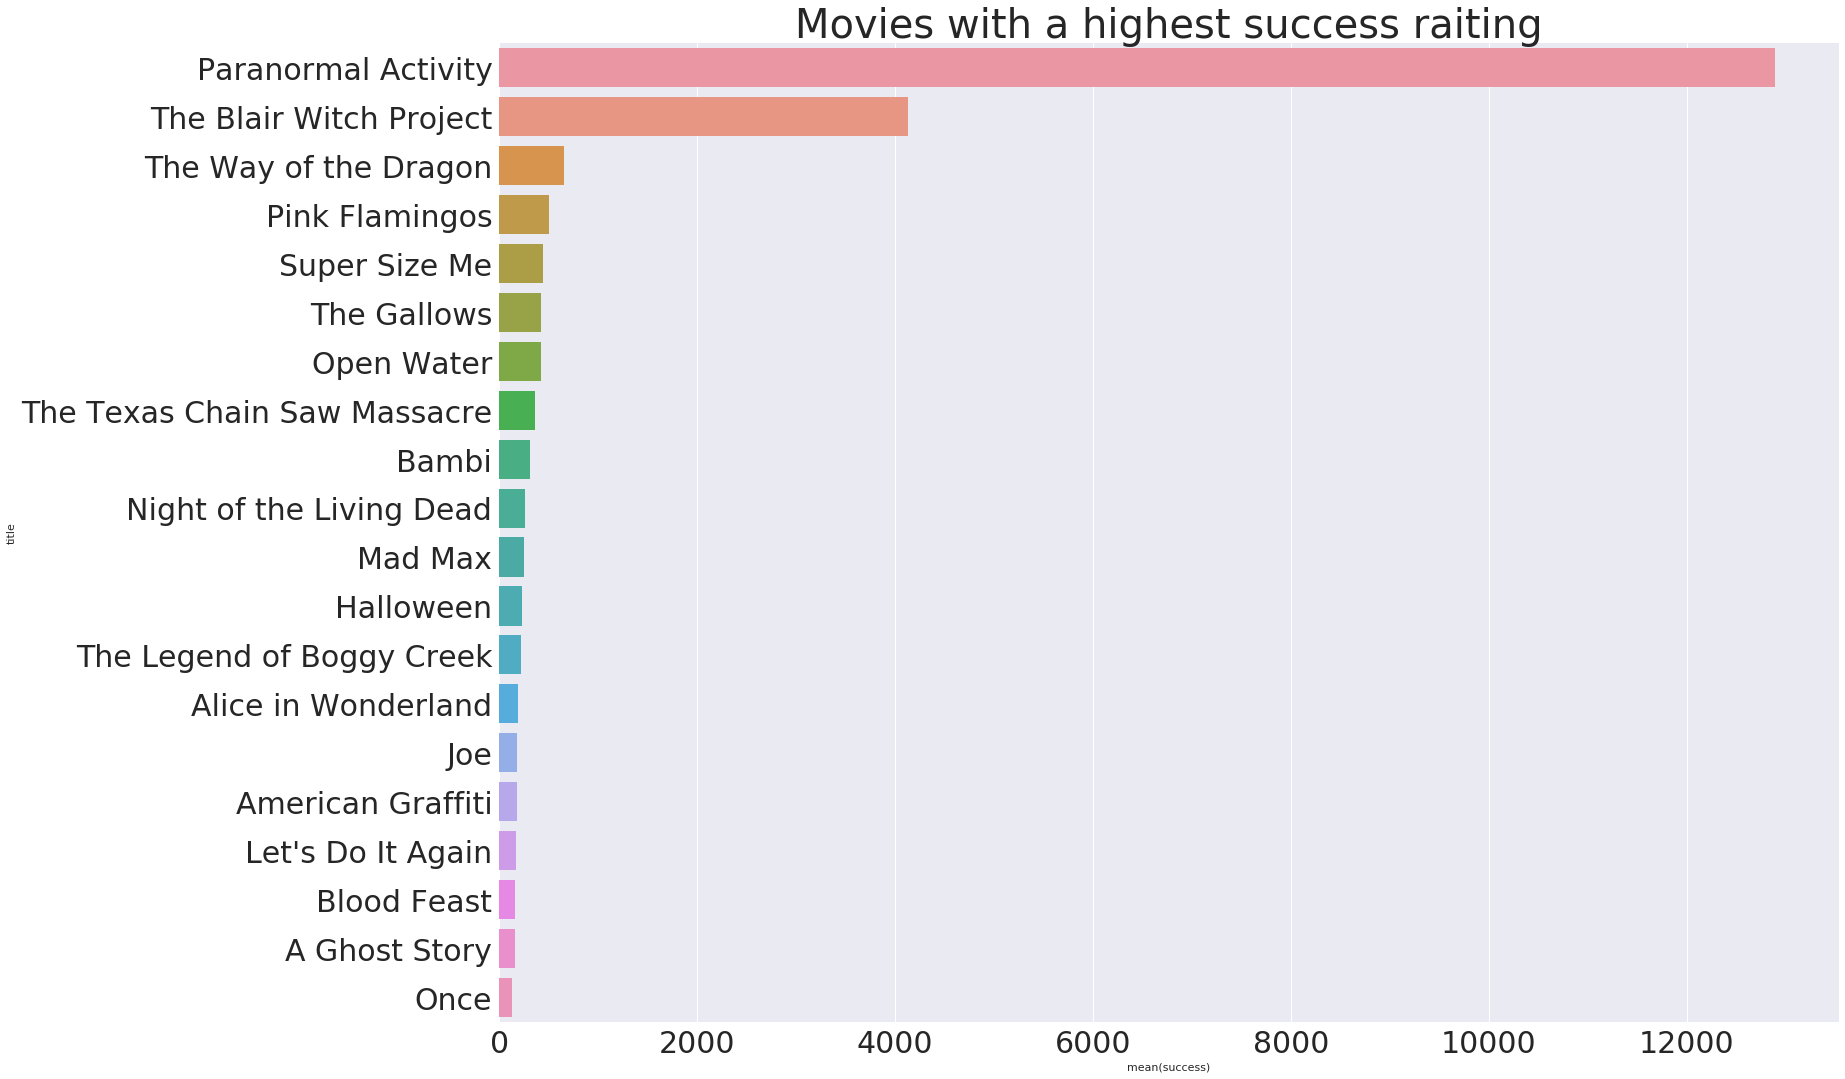

In [70]:
plt.figure(figsize=(24, 18))

df_tit_suc = df_exp[['title', 'success']].sort_values('success', ascending=False).head(20)
sns.barplot(x = df_tit_suc['success'], y = df_tit_suc['title'])
plt.title('Movies with a highest success raiting', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

## Least successful movies

In [72]:
df_bud_rait[['title','release_date','success','budget','revenue',
        'budget_raiting']].sort_values('success', ascending=True).head(15)

,title,release_date,success,budget,revenue,budget_raiting
2412,Chaos,2005-01-17,-0.999486,20.0,0.010289,2413
2487,5 Days of War,2011-04-14,-0.999126,20.0,0.017479,2488
3394,Special Forces,2011-11-02,-0.998924,10.0,0.010759,3395
760,Foodfight!,2012-06-15,-0.998866,65.0,0.073706,761
2738,Term Life,2016-04-29,-0.998712,16.5,0.021256,2739
3540,Laurence Anyways,2012-05-18,-0.998711,9.5,0.012250,3541
2814,The Good Night,2007-01-25,-0.998641,15.0,0.020380,2815
3492,Cherry 2000,1987-11-12,-0.998600,10.0,0.014000,3493
3119,Twice Born,2012-09-13,-0.998593,13.0,0.018295,3120
2846,All The Queen's Men,2001-10-14,-0.998467,15.0,0.023000,2847


### From the all the numbers above we can learn, that the movies with extremely high budget usualy brings profit equal to 1-3 of it's budgets, which is a good result. At the same time some of them lose money, which is awful considering their  100+ millions budgets.  
### Most successful movies have a very small budgets up to 100k, their profit is not that big in actual dollars but even if they are losing money - their lost is not equal to the GDP of some countries.  
### However, IMHO, the best balance between budgets, revenue, success and actual amout of money made is showed by movies with 1 - 10 millions budget.

## Before comparing popularity and financial success, let's look at distribution of popularity (according to TMDB)

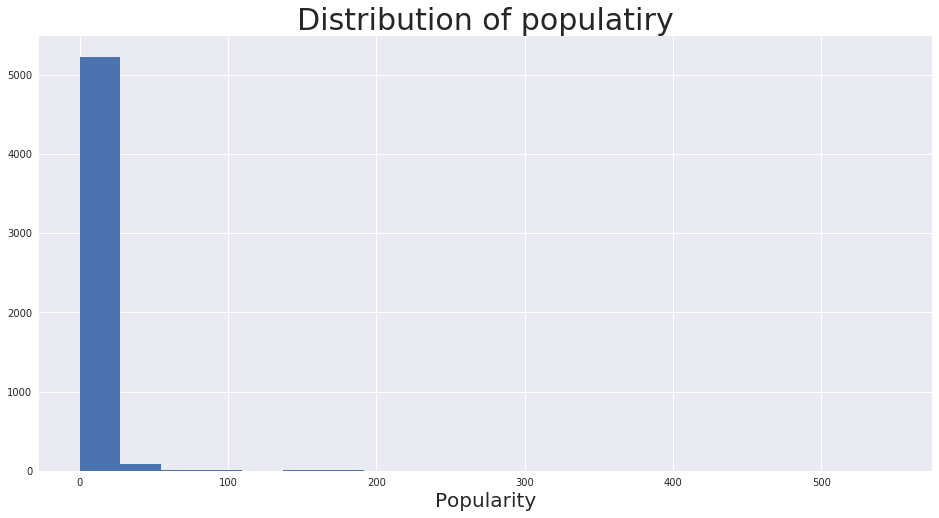

In [73]:
plt.figure(figsize = (16, 8))
plt.hist(df_suc['popularity'], bins = 20)
plt.xlabel('Popularity', fontsize=20)
plt.title('Distribution of populatiry', size = 30);

### Most of it concentrated between 1 and 25 points.

### Let's compare the most popular movies (according to TMDB) with it's budgets, revenues and success

In [74]:
df_bud_rait[['title','release_date', 'popularity', 'budget', 'budget_raiting',
             'revenue', 'success']].sort_values('popularity', ascending=False).head(17)

,title,release_date,popularity,budget,budget_raiting,revenue,success
622,Minions,2015-06-17,547.488298,74.0,623,1156.730962,14.631499
169,Wonder Woman,2017-05-30,294.337037,149.0,170,820.580447,4.507251
108,Beauty and the Beast,2017-03-16,287.253654,160.0,109,1262.886337,6.893040
1612,Baby Driver,2017-06-28,228.032744,34.0,1613,224.511319,5.603274
104,Big Hero 6,2014-10-24,213.849907,165.0,105,652.105443,2.952154
892,Deadpool,2016-02-09,187.860492,58.0,893,783.112979,12.501948
33,Guardians of the Galaxy Vol. 2,2017-04-19,185.330992,200.0,34,863.416141,3.317081
21,Avatar,2009-12-10,185.070892,237.0,22,2787.965087,10.763566
2494,John Wick,2014-10-22,183.870374,20.0,2495,88.761661,3.438083
785,Gone Girl,2014-10-01,154.801009,61.0,786,369.330363,5.054596


### Less popular movies

In [75]:
df_bud_rait[['title','release_date', 'popularity', 'budget', 'budget_raiting',
             'revenue', 'success']].sort_values('popularity', ascending=True).head(17)

,title,release_date,popularity,budget,budget_raiting,revenue,success
3082,Lucky Lady,1975-12-25,0.000657,13.000000,3083,24.441725,0.880133
5237,Swoon,1992-09-11,0.003013,0.250000,5238,0.340147,0.360588
4204,Cheetah,1989-08-18,0.011574,5.000000,4205,8.153677,0.630735
3566,Felix The Cat: The Movie,1988-10-01,0.030576,9.000000,3567,1.964253,-0.781750
4132,Antidur,2007-09-06,0.039793,5.000000,4133,1.413000,-0.717400
5186,Shikshanachya Aaicha Gho,2010-01-15,0.043519,0.380000,5187,0.520000,0.368421
4912,Journey from the Fall,2006-02-22,0.044561,1.300000,4913,0.639000,-0.508462
5000,Sankofa,1993-05-28,0.045860,1.000000,5001,2.691899,1.691899
5256,Trois,2000-02-11,0.064310,0.200000,5257,1.160268,4.801340
5146,Kadhal Kottai,1996-07-12,0.071908,0.500000,5147,0.500000,0.000000


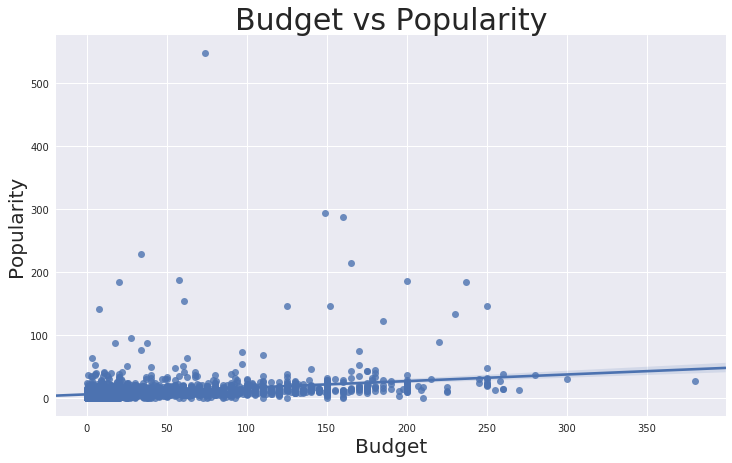

In [76]:
plt.figure(figsize = (12,7))

sns.regplot(df_exp['budget'],df_exp['popularity'])
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Budget vs Popularity', fontsize=30);

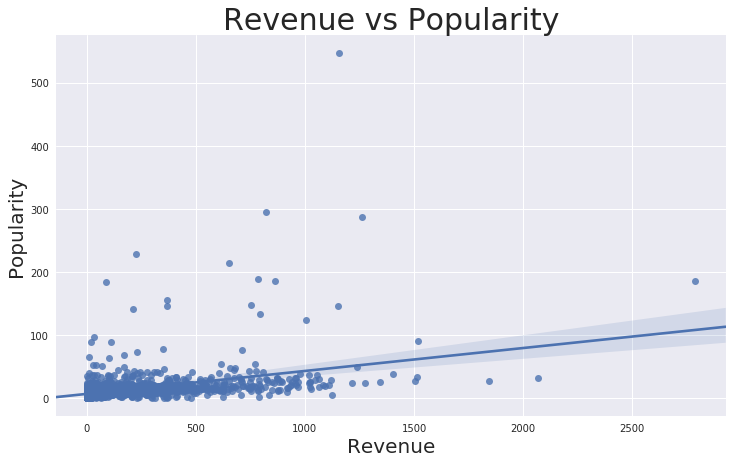

In [77]:
plt.figure(figsize = (12,7))

sns.regplot(df_exp['revenue'],df_exp['popularity'])
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue vs Popularity', fontsize=30);

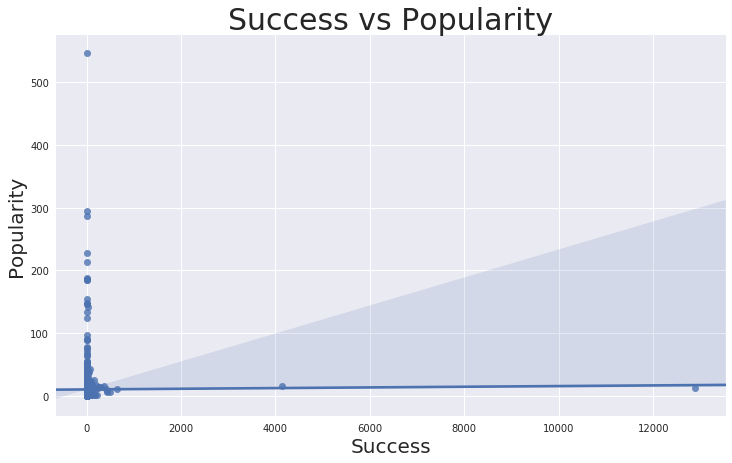

In [78]:
plt.figure(figsize = (12,7))

sns.regplot(df_exp['success'],df_exp['popularity'])
plt.ylabel('Popularity', fontsize=20)
plt.xlabel('Success', fontsize=20)
plt.title('Success vs Popularity', fontsize=30);

### Eventhough the most popular movies have made some profit, they are not even close to the most profitable ones. Most of them have very high budget, which means they have very expenive advertisement compaign that makes them popular. The only exeption probably is "Pulp Fiction", which is defenitely the exeptional movie by itself.

## Let's compare movies with the biggest amount of votes (according to TMDB) with it's budgets, revenues and success.

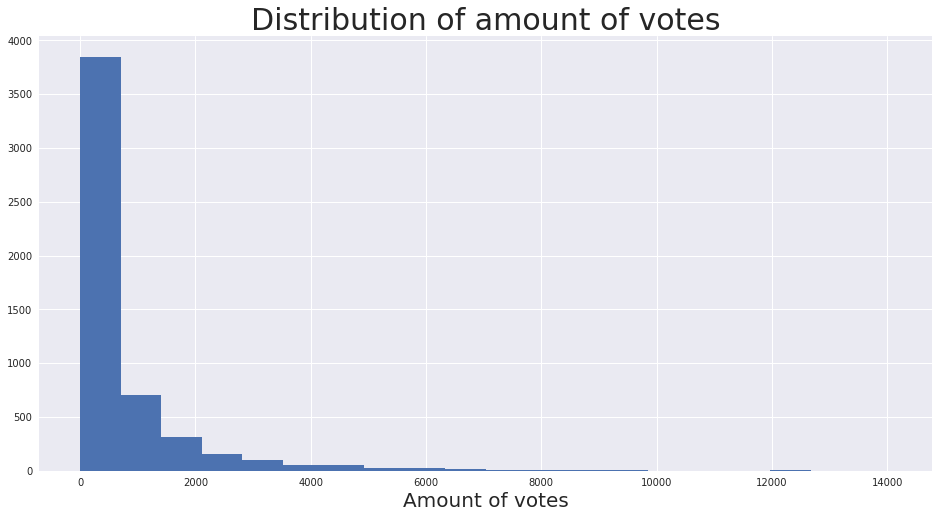

In [79]:
plt.figure(figsize = (16, 8))
plt.hist(df_suc['vote_count'], bins = 20)
plt.xlabel('Amount of votes', fontsize=20)
plt.title('Distribution of amount of votes', size = 30);

### Most amounts of votes is between 0 and 700

In [80]:
df_bud_rait[['title','release_date', 'vote_count', 'budget', 'budget_raiting',
             'revenue', 'success']].sort_values('vote_count', ascending=False).head(19)

,title,release_date,vote_count,budget,budget_raiting,revenue,success
110,Inception,2010-07-14,14075.0,160.0,111,825.532764,4.159580
62,The Dark Knight,2008-07-16,12269.0,185.0,63,1004.558444,4.430046
21,Avatar,2009-12-10,12114.0,237.0,22,2787.965087,10.763566
26,The Avengers,2012-04-25,12000.0,220.0,27,1519.557910,5.907081
892,Deadpool,2016-02-09,11444.0,58.0,893,783.112979,12.501948
102,Interstellar,2014-11-05,11187.0,165.0,103,675.120017,3.091636
369,Django Unchained,2012-12-25,10297.0,100.0,370,425.368238,3.253682
93,Guardians of the Galaxy,2014-07-30,10014.0,170.0,94,773.328629,3.548992
772,Fight Club,1999-10-15,9678.0,63.0,773,100.853753,0.600853
587,The Hunger Games,2012-03-12,9634.0,75.0,588,691.210692,8.216143


### Let's compare movies with the smallest amount of votes (according to TMDB) with it's budgets, revenues and success.

In [81]:
df_bud_rait[['title','release_date', 'vote_count', 'budget', 'budget_raiting',
             'revenue', 'success']].sort_values('vote_count', ascending=True).head(17)

,title,release_date,vote_count,budget,budget_raiting,revenue,success
3082,Lucky Lady,1975-12-25,0.0,13.000000,3083,24.441725,0.880133
2187,Honky Tonk Freeway,1981-08-21,0.0,24.000000,2188,0.939423,-0.960857
3189,Bopha!,1993-09-16,0.0,12.000000,3190,0.212483,-0.982293
5108,Naturally Native,1999-10-08,0.0,0.700000,5109,0.010508,-0.984989
5346,Voracious,2012-09-05,1.0,0.011178,5347,0.034659,2.100644
4912,Journey from the Fall,2006-02-22,1.0,1.300000,4913,0.639000,-0.508462
4977,Waltzing Anna,2006-08-11,1.0,1.000000,4978,0.011455,-0.988545
5077,Happy Family,2006-12-14,1.0,0.800000,5078,0.966214,0.207767
3971,Королёв,2007-10-29,1.0,6.000000,3972,0.031000,-0.994833
3929,Mickey,2004-05-02,1.0,6.000000,3930,0.293793,-0.951035


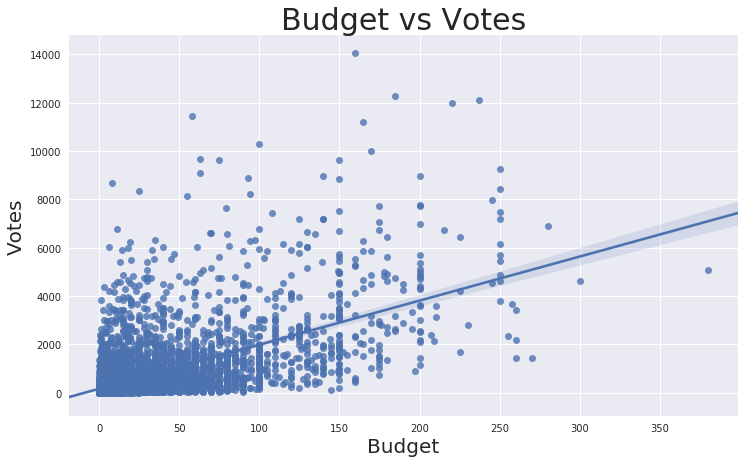

In [82]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['budget'],df_exp['vote_count'])
plt.ylabel('Votes', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Budget vs Votes',size= 30);

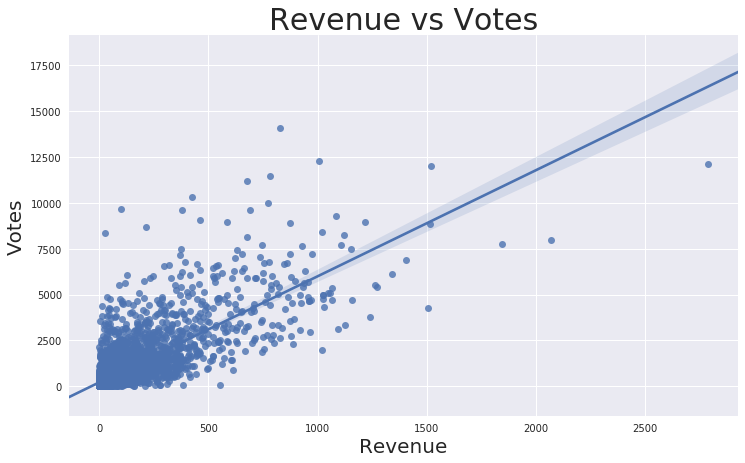

In [83]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['revenue'],df_exp['vote_count'])
plt.ylabel('Votes', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue vs Votes',size= 30);

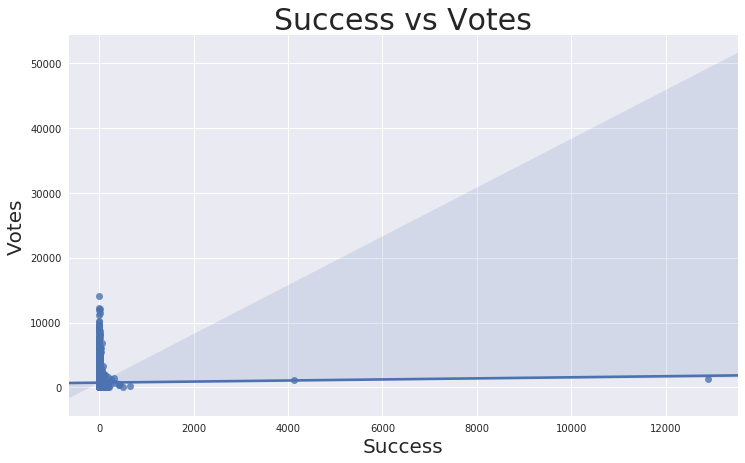

In [84]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['success'],df_exp['vote_count'])
plt.ylabel('Votes', fontsize=20)
plt.xlabel('Success', fontsize=20)
plt.title('Success vs Votes',size= 30);

### Looks like the same picture as we saw with popularity

### Let's compare movies with the highest average of votes (according to TMDB) with it's budgets, revenues and success

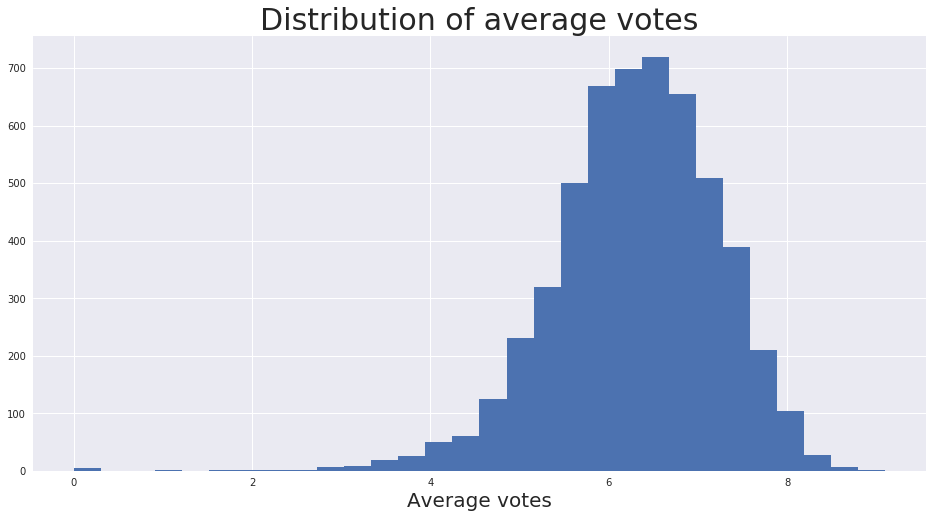

In [85]:
plt.figure(figsize = (16, 8))
plt.hist(df_suc['vote_average'], bins = 30)
plt.xlabel('Average votes', fontsize=20)
plt.title('Distribution of average votes', size = 30);

### The mean of average vote is 6.3

In [86]:
df_bud_rait[['title','release_date', 'vote_average', 'vote_count', 'budget', 'budget_raiting',
             'revenue', 'success']].sort_values('vote_average', ascending=False).head(19)

,title,release_date,vote_average,vote_count,budget,budget_raiting,revenue,success
3068,Dilwale Dulhania Le Jayenge,1995-10-20,9.1,661.0,13.200000,3069,100.000000,6.575758
4859,Katyar Kaljat Ghusali,2015-11-12,9.0,2.0,1.500000,4860,4.400000,1.933333
4932,Stop Making Sense,1984-11-16,8.7,47.0,1.200000,4933,4.978922,3.149102
5321,Tosun Pasha,1976-01-01,8.6,10.0,0.064200,5322,0.698200,9.875389
5095,The Guide,2014-11-12,8.6,6.0,0.722083,5096,0.499168,-0.308711
3373,There Goes My Baby,1994-09-02,8.5,2.0,10.500000,3374,0.123509,-0.988237
2006,The Shawshank Redemption,1994-09-23,8.5,8358.0,25.000000,2007,28.341469,0.133659
3937,The Godfather,1972-03-14,8.5,6024.0,6.000000,3938,245.066411,39.844402
5218,Goodbye Pork Pie,1981-02-05,8.5,4.0,0.300000,5219,1.400000,3.666667
4473,Whiplash,2014-10-10,8.3,4376.0,3.300000,4474,13.092000,2.967273


Let's compare movies with the lowest average of votes (according to TMDB) with it's budgets

In [87]:
df_bud_rait[['title','release_date', 'vote_average', 'vote_count', 'budget', 'budget_raiting',
             'revenue', 'success']].sort_values('vote_average', ascending=True).head(19)

,title,release_date,vote_average,vote_count,budget,budget_raiting,revenue,success
2187,Honky Tonk Freeway,1981-08-21,0.0,0.0,24.000,2188,0.939423,-0.960857
3189,Bopha!,1993-09-16,0.0,0.0,12.000,3190,0.212483,-0.982293
5108,Naturally Native,1999-10-08,0.0,0.0,0.700,5109,0.010508,-0.984989
3082,Lucky Lady,1975-12-25,0.0,0.0,13.000,3083,24.441725,0.880133
4132,Antidur,2007-09-06,1.0,1.0,5.000,4133,1.413000,-0.717400
3971,Королёв,2007-10-29,1.0,1.0,6.000,3972,0.031000,-0.994833
4459,"Kidnapping, Caucasian Style",2014-08-21,1.7,6.0,3.500,4460,0.179000,-0.948857
4788,Native Son,1986-12-24,2.0,2.0,2.000,4789,1.301121,-0.349440
3779,Black Rose,2014-04-17,2.0,6.0,7.000,3780,0.855450,-0.877793
760,Foodfight!,2012-06-15,2.3,28.0,65.000,761,0.073706,-0.998866


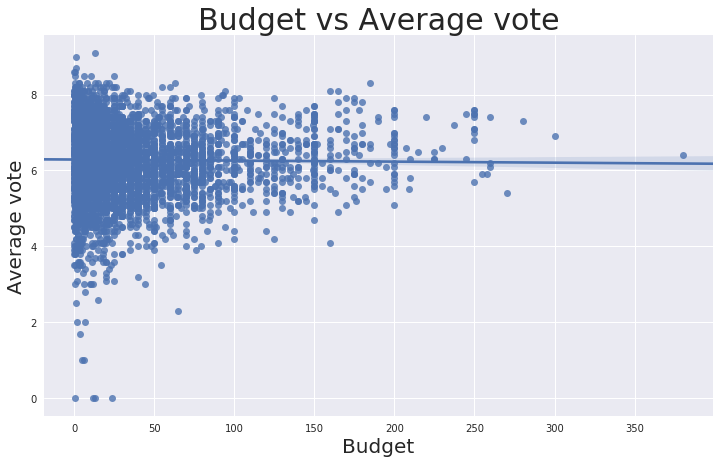

In [88]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['budget'],df_exp['vote_average'])
plt.ylabel('Average vote', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Budget vs Average vote',size= 30);

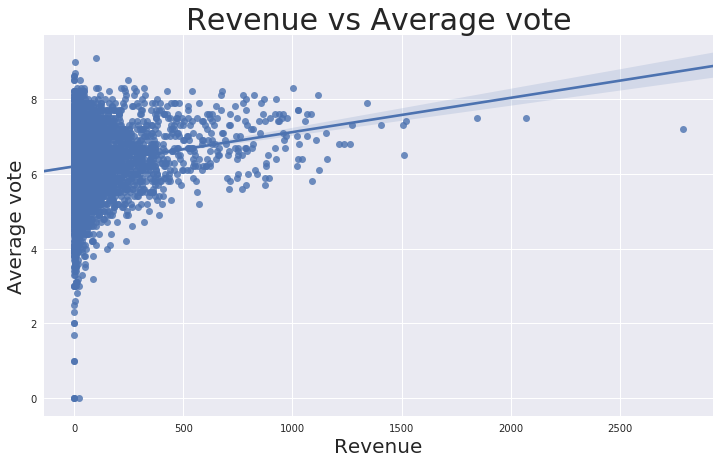

In [89]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['revenue'],df_exp['vote_average'])
plt.ylabel('Average vote', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue vs Average vote',size= 30);

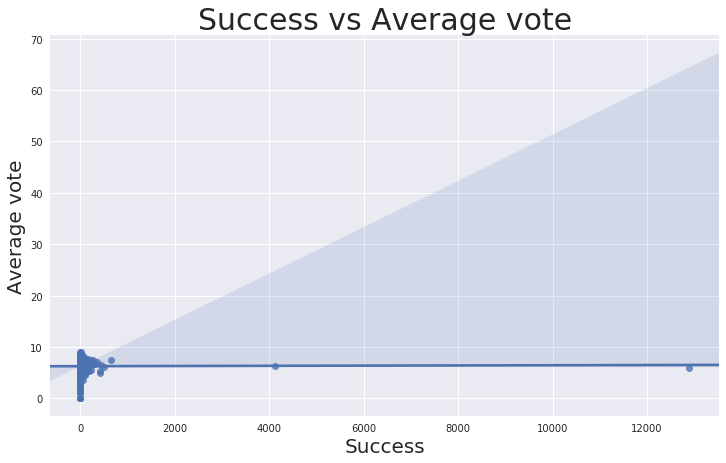

In [90]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['success'],df_exp['vote_average'])
plt.ylabel('Average vote', fontsize=20)
plt.xlabel('Success', fontsize=20)
plt.title('Success vs Average vote',size= 30);

In [211]:
156000 / 876

178.08219178082192

### We can see that high vote raiting has nothing to do with budget. Movies with high vote raiting not always even financially successful, like any kind of high art, that only prepared recipient will consume. To draw some parallels I can compare it with the restaurants business: Sofisticated high-class steak house might be less profitable than fast-food chain. Or "Ford company" 178 times more profitable than Aston Martin with all due respect to them both.

## Let's see how belongings to the collection correlated with budgets, revenues and success

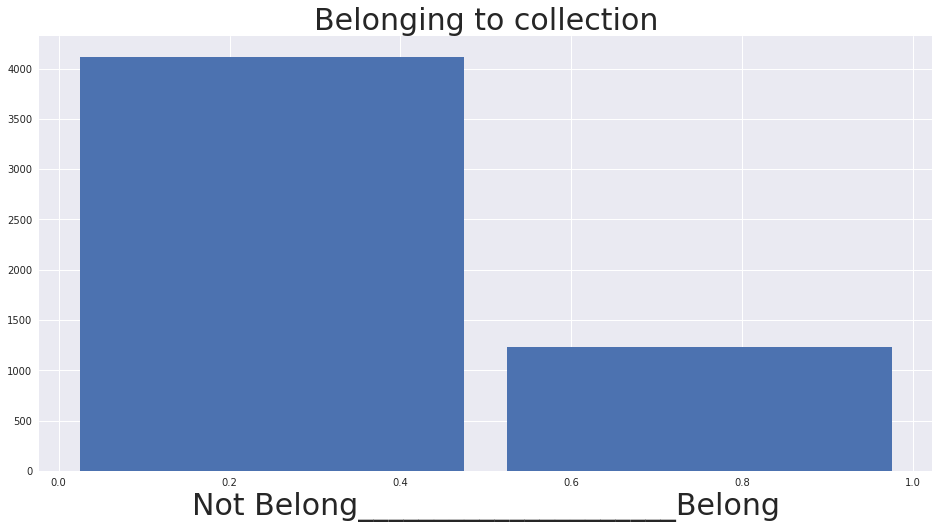

In [95]:
plt.figure(figsize = (16, 8))
plt.hist(df_suc['belongs_to_collection'], bins=2, rwidth=0.9)
plt.title('Belonging to collection', size = 30)
plt.xlabel('Not Belong_____________________Belong', fontsize = 30);

In [96]:
df_suc['belongs_to_collection'].mean()

0.22966149242565925

In [97]:
df_bud_rait[['belongs_to_collection', 'budget',
             'revenue', 'success']].groupby(['belongs_to_collection']).sum()

,budget,revenue,success,success_binary
belongs_to_collection,,,,
0,111283.972867,249634.698288,13203.274370,1794
1,57571.970327,240386.576369,26704.693732,944


### Most expensive movies

In [98]:
df_bud_rait[['title','release_date', 'belongs_to_collection', 'budget',
             'revenue', 'success']].sort_values('budget', ascending=False).head(15)

,title,release_date,belongs_to_collection,budget,revenue,success
0,Pirates of the Caribbean: On Stranger Tides,2011-05-14,1,380.0,1045.713802,1.751878
1,Pirates of the Caribbean: At World's End,2007-05-19,1,300.0,961.000000,2.203333
2,Avengers: Age of Ultron,2015-04-22,1,280.0,1405.403694,4.019299
3,Superman Returns,2006-06-28,1,270.0,391.081192,0.448449
4,Tangled,2010-11-24,1,260.0,591.794936,1.276134
5,Transformers: The Last Knight,2017-06-21,1,260.0,604.942143,1.326701
6,John Carter,2012-03-07,0,260.0,284.139100,0.092843
7,Spider-Man 3,2007-05-01,1,258.0,890.871626,2.452991
8,The Lone Ranger,2013-07-03,0,255.0,89.289910,-0.649843
14,The Hobbit: The Battle of the Five Armies,2014-12-10,1,250.0,956.019788,2.824079


### Most profitable movies

In [101]:
df_bud_rait[df_bud_rait['belongs_to_collection'] == 1][['title','release_date', 'belongs_to_collection','revenue', 'budget',
            'success']].sort_values('revenue', ascending=False).head(15)

,title,release_date,belongs_to_collection,revenue,budget,success
21,Avatar,2009-12-10,1,2787.965087,237.0,10.763566
20,Star Wars: The Force Awakens,2015-12-15,1,2068.223624,245.0,7.441729
26,The Avengers,2012-04-25,1,1519.557910,220.0,5.907081
147,Jurassic World,2015-06-09,1,1513.528810,150.0,9.090192
58,Furious 7,2015-04-01,1,1506.249360,190.0,6.927628
2,Avengers: Age of Ultron,2015-04-22,1,1405.403694,280.0,4.019299
251,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1,1342.000000,125.0,9.736000
150,Frozen,2013-11-27,1,1274.219009,150.0,7.494793
11,The Fate of the Furious,2017-04-12,1,1238.764765,250.0,3.955059
39,Iron Man 3,2013-04-18,1,1215.439994,200.0,5.077200


### Most successful movies

In [102]:
df_bud_rait[df_bud_rait['belongs_to_collection'] == 1][['title','release_date', 'belongs_to_collection','success', 'budget',
             'revenue']].sort_values('success', ascending=False).head(15)

,title,release_date,belongs_to_collection,success,budget,revenue
5343,Paranormal Activity,2007-09-14,1,12889.386667,0.015,193.355800
5323,The Blair Witch Project,1999-07-14,1,4132.333333,0.060,248.000000
5319,Super Size Me,2004-01-17,1,438.616585,0.065,28.575078
5283,Open Water,2004-08-06,1,419.522723,0.130,54.667954
5309,The Texas Chain Saw Massacre,1974-10-01,1,362.047059,0.085,30.859000
5052,Bambi,1942-08-14,1,310.709965,0.858,267.447150
5290,Night of the Living Dead,1968-10-01,1,262.157895,0.114,30.000000
5180,Mad Max,1979-04-12,1,249.000000,0.400,100.000000
5209,Halloween,1978-10-25,1,232.333333,0.300,70.000000
5082,American Graffiti,1973-08-01,1,179.180180,0.777,140.000000


### Belong to collection with smallest budget, revenue, success

In [105]:
df_bud_rait[df_bud_rait['belongs_to_collection'] == 1][['title','release_date', 'belongs_to_collection', 'budget',
             'revenue', 'success']].sort_values('budget', ascending=True).head(15)

,title,release_date,belongs_to_collection,budget,revenue,success
5343,Paranormal Activity,2007-09-14,1,0.015000,193.355800,12889.386667
5333,Clerks,1994-09-13,1,0.027000,3.151130,115.708519
5325,The Angrez,2006-06-02,1,0.050000,0.300000,5.000000
5323,The Blair Witch Project,1999-07-14,1,0.060000,248.000000,4132.333333
5319,Super Size Me,2004-01-17,1,0.065000,28.575078,438.616585
5313,Vixen!,1968-10-15,1,0.076000,6.000000,77.947368
5309,The Texas Chain Saw Massacre,1974-10-01,1,0.085000,30.859000,362.047059
5290,Night of the Living Dead,1968-10-01,1,0.114000,30.000000,262.157895
5283,Open Water,2004-08-06,1,0.130000,54.667954,419.522723
5281,Cat People,1942-12-05,1,0.134000,4.000000,28.850746


In [107]:
df_bud_rait[df_bud_rait['belongs_to_collection'] == 1][['title','release_date', 
                                                        'belongs_to_collection', 'revenue', 'budget',
                                                        'success']].sort_values('revenue', ascending=True).head(15)

,title,release_date,belongs_to_collection,revenue,budget,success
4529,Naqoyqatsi,2002-09-02,1,0.013308,3.000,-0.995564
4568,Women in Trouble,2009-11-13,1,0.018097,3.000,-0.993968
4400,Paradise: Love,2012-04-27,1,0.024267,3.600,-0.993259
3421,"The Tulse Luper Suitcases, Part 1: The Moab Story",2003-05-24,1,0.025800,10.000,-0.997420
3927,The Boondock Saints,1999-01-22,1,0.030471,6.000,-0.994922
5112,Stake Land,2010-09-30,1,0.033245,0.650,-0.948854
4644,Hatchet II,2010-08-26,1,0.052604,2.500,-0.978958
4769,Return of the Living Dead 3,1993-10-01,1,0.054207,2.000,-0.972897
4448,The Mother of Tears,2007-09-06,1,0.054947,3.500,-0.984301
4670,Eye of the Dolphin,2007-08-24,1,0.071904,2.500,-0.971238


In [108]:
df_bud_rait[df_bud_rait['belongs_to_collection'] == 1][['title','release_date', 'belongs_to_collection','success', 'budget',
             'revenue']].sort_values('success', ascending=True).head(15)

,title,release_date,belongs_to_collection,success,budget,revenue
3421,"The Tulse Luper Suitcases, Part 1: The Moab Story",2003-05-24,1,-0.997420,10.00,0.025800
4529,Naqoyqatsi,2002-09-02,1,-0.995564,3.00,0.013308
3927,The Boondock Saints,1999-01-22,1,-0.994922,6.00,0.030471
4568,Women in Trouble,2009-11-13,1,-0.993968,3.00,0.018097
4400,Paradise: Love,2012-04-27,1,-0.993259,3.60,0.024267
1762,Dominion: Prequel to the Exorcist,2005-05-20,1,-0.991617,30.00,0.251495
4448,The Mother of Tears,2007-09-06,1,-0.984301,3.50,0.054947
3157,King Solomon's Mines,1985-03-20,1,-0.980942,12.50,0.238227
4644,Hatchet II,2010-08-26,1,-0.978958,2.50,0.052604
4769,Return of the Living Dead 3,1993-10-01,1,-0.972897,2.00,0.054207


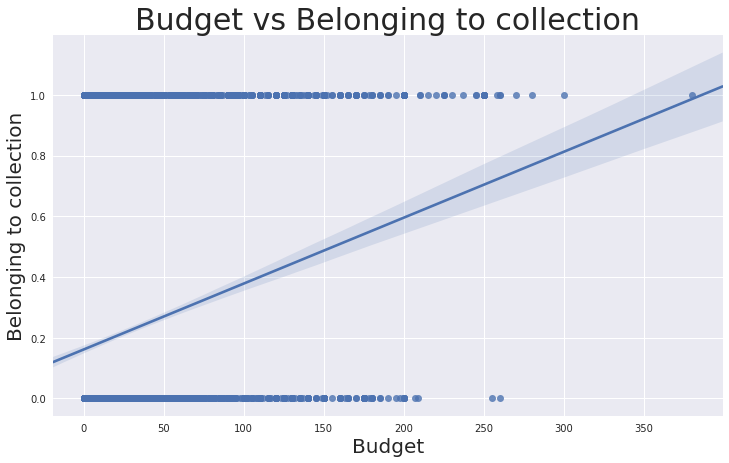

In [109]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['budget'],df_exp['belongs_to_collection'])
plt.ylabel('Belonging to collection', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Budget vs Belonging to collection',size= 30);

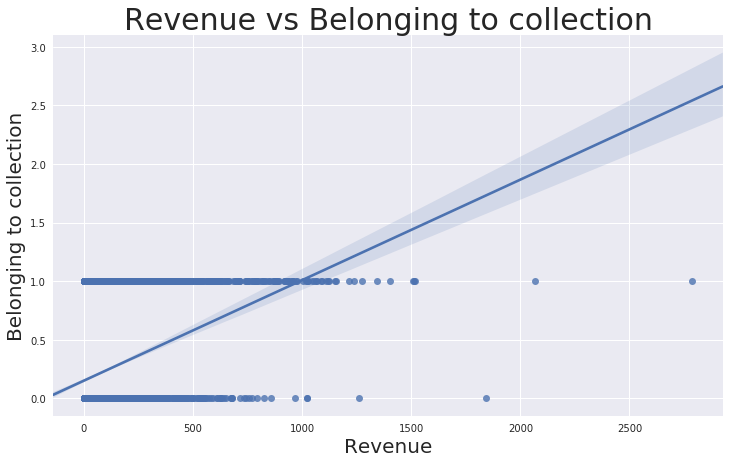

In [110]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['revenue'],df_exp['belongs_to_collection'])
plt.ylabel('Belonging to collection', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue vs Belonging to collection',size= 30);

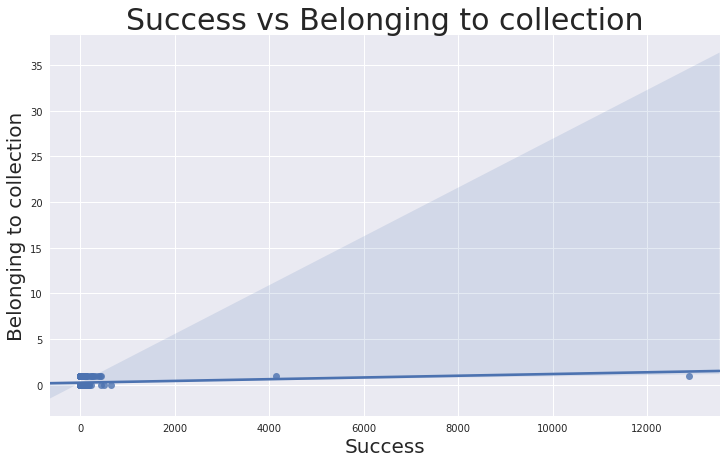

In [111]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['success'],df_exp['belongs_to_collection'])
plt.ylabel('Belonging to collection', fontsize=20)
plt.xlabel('Success', fontsize=20)
plt.title('Success vs Belonging to collection',size= 30);

### 23% of the movies we have in our dataset is belong to collection  
### And they genereting the same amout of profit that other 73%  
### Belonging to the collection correlated with budget and revenue, and it makes total sense. Once some movie made a profit, it's creators want to repeat the success, once the plot allows it. They already checked that that specific combination of story, characters and actors works well and people like it enough to pay for that and waiting for more, so it makes the investments in to the new part of the same movie less risky. Eventhough sequels sometimes is not that good as original movie - they still generating some profit.  
### I believe that some collections was planned in advance or original movies had an open end on purpose, so there is a possibility for the siquel. And some movies got a continuation just because the original one became very profitable (Paranormal Activity, Saw). Great example of opening the possibility for sequel was showed by the movie "Rambo: First Blood". In the original novel "First Blood" by David Morrell John Rambo died. But moviemakers made him survived for few more movies, that brought some profit.

### Let's see how having a homepage correlated with budgets, revenues and success

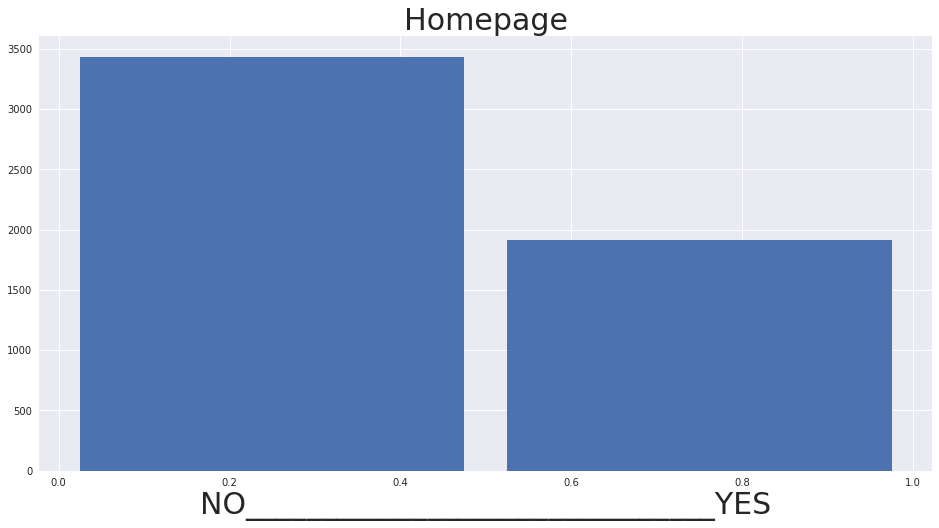

In [114]:
plt.figure(figsize = (16, 8))
plt.hist(df_suc['homepage'], bins=2, rwidth=0.9)
plt.title('Homepage', size = 30)
plt.xlabel('NO_______________________________YES', fontsize = 30);

In [212]:
df_suc['homepage'].mean()

0.35777071254909293

### Highest budgets, revenue and success

In [115]:
df_bud_rait[['title','release_date', 'homepage', 'budget',
             'revenue', 'success']].sort_values('budget', ascending=False).head(15)

,title,release_date,homepage,budget,revenue,success
0,Pirates of the Caribbean: On Stranger Tides,2011-05-14,1,380.0,1045.713802,1.751878
1,Pirates of the Caribbean: At World's End,2007-05-19,1,300.0,961.000000,2.203333
2,Avengers: Age of Ultron,2015-04-22,1,280.0,1405.403694,4.019299
3,Superman Returns,2006-06-28,1,270.0,391.081192,0.448449
4,Tangled,2010-11-24,1,260.0,591.794936,1.276134
5,Transformers: The Last Knight,2017-06-21,1,260.0,604.942143,1.326701
6,John Carter,2012-03-07,1,260.0,284.139100,0.092843
7,Spider-Man 3,2007-05-01,1,258.0,890.871626,2.452991
8,The Lone Ranger,2013-07-03,1,255.0,89.289910,-0.649843
14,The Hobbit: The Battle of the Five Armies,2014-12-10,1,250.0,956.019788,2.824079


In [117]:
df_bud_rait[['title','release_date', 'homepage', 'budget',
             'revenue', 'success']].sort_values('revenue', ascending=False).head(15)

,title,release_date,homepage,budget,revenue,success
21,Avatar,2009-12-10,1,237.0,2787.965087,10.763566
20,Star Wars: The Force Awakens,2015-12-15,1,245.0,2068.223624,7.441729
52,Titanic,1997-11-18,1,200.0,1845.034188,8.225171
26,The Avengers,2012-04-25,1,220.0,1519.557910,5.907081
147,Jurassic World,2015-06-09,1,150.0,1513.528810,9.090192
58,Furious 7,2015-04-01,1,190.0,1506.249360,6.927628
2,Avengers: Age of Ultron,2015-04-22,1,280.0,1405.403694,4.019299
251,Harry Potter and the Deathly Hallows: Part 2,2011-07-07,1,125.0,1342.000000,9.736000
150,Frozen,2013-11-27,1,150.0,1274.219009,7.494793
108,Beauty and the Beast,2017-03-16,1,160.0,1262.886337,6.893040


In [118]:
df_bud_rait[['title','release_date', 'homepage', 'budget',
             'revenue', 'success']].sort_values('success', ascending=False).head(15)

,title,release_date,homepage,budget,revenue,success
5343,Paranormal Activity,2007-09-14,1,0.015,193.355800,12889.386667
5323,The Blair Witch Project,1999-07-14,1,0.060,248.000000,4132.333333
5284,The Way of the Dragon,1972-06-01,0,0.130,85.000000,652.846154
5344,Pink Flamingos,1972-03-12,0,0.012,6.000000,499.000000
5319,Super Size Me,2004-01-17,0,0.065,28.575078,438.616585
5296,The Gallows,2015-07-10,1,0.100,42.664410,425.644100
5283,Open Water,2004-08-06,0,0.130,54.667954,419.522723
5309,The Texas Chain Saw Massacre,1974-10-01,0,0.085,30.859000,362.047059
5052,Bambi,1942-08-14,1,0.858,267.447150,310.709965
5290,Night of the Living Dead,1968-10-01,0,0.114,30.000000,262.157895


### Lowest Budgets , Revenues and success

In [119]:
df_bud_rait[['title','release_date', 'homepage', 'budget',
             'revenue', 'success']].sort_values('budget', ascending=True).head(15)

,title,release_date,homepage,budget,revenue,success
5346,Voracious,2012-09-05,0,0.011178,0.034659,2.100644
5345,Captive,2012-09-05,0,0.011180,0.024591,1.199553
5344,Pink Flamingos,1972-03-12,0,0.012000,6.000000,499.000000
5343,Paranormal Activity,2007-09-14,1,0.015000,193.355800,12889.386667
5342,Robot Monster,1953-06-25,0,0.016000,1.000000,61.500000
5341,Bellflower,2011-04-16,1,0.017000,0.101236,4.955059
5340,The Cheat,1915-12-13,0,0.017311,0.137365,6.935128
5339,Godfather,1991-03-03,0,0.018000,0.700000,37.888889
5338,Cure,1997-11-06,0,0.020000,0.099000,3.950000
5337,Remington and the Curse of the Zombadings,2011-08-31,1,0.022361,0.721651,31.272752


In [120]:
df_bud_rait[['title','release_date', 'homepage', 'budget',
             'revenue', 'success']].sort_values('revenue', ascending=True).head(15)

,title,release_date,homepage,budget,revenue,success
4968,Alone With Her,2006-04-28,0,1.000,0.010018,-0.989982
2412,Chaos,2005-01-17,0,20.000,0.010289,-0.999486
5131,Squeeze,1997-06-06,0,0.500,0.010300,-0.979400
5279,Logan,2010-09-10,1,0.135,0.010474,-0.922415
5108,Naturally Native,1999-10-08,1,0.700,0.010508,-0.984989
3394,Special Forces,2011-11-02,1,10.000,0.010759,-0.998924
5159,Peter and Vandy,2009-01-01,1,0.500,0.011276,-0.977448
4977,Waltzing Anna,2006-08-11,0,1.000,0.011455,-0.988545
3540,Laurence Anyways,2012-05-18,1,9.500,0.012250,-0.998711
4837,Standing Still,2005-01-02,0,1.700,0.012762,-0.992493


In [121]:
df_bud_rait[['title','release_date', 'homepage', 'budget',
             'revenue', 'success']].sort_values('success', ascending=True).head(15)

,title,release_date,homepage,budget,revenue,success
2412,Chaos,2005-01-17,0,20.0,0.010289,-0.999486
2487,5 Days of War,2011-04-14,0,20.0,0.017479,-0.999126
3394,Special Forces,2011-11-02,1,10.0,0.010759,-0.998924
760,Foodfight!,2012-06-15,1,65.0,0.073706,-0.998866
2738,Term Life,2016-04-29,1,16.5,0.021256,-0.998712
3540,Laurence Anyways,2012-05-18,1,9.5,0.012250,-0.998711
2814,The Good Night,2007-01-25,0,15.0,0.020380,-0.998641
3492,Cherry 2000,1987-11-12,1,10.0,0.014000,-0.998600
3119,Twice Born,2012-09-13,0,13.0,0.018295,-0.998593
2846,All The Queen's Men,2001-10-14,0,15.0,0.023000,-0.998467


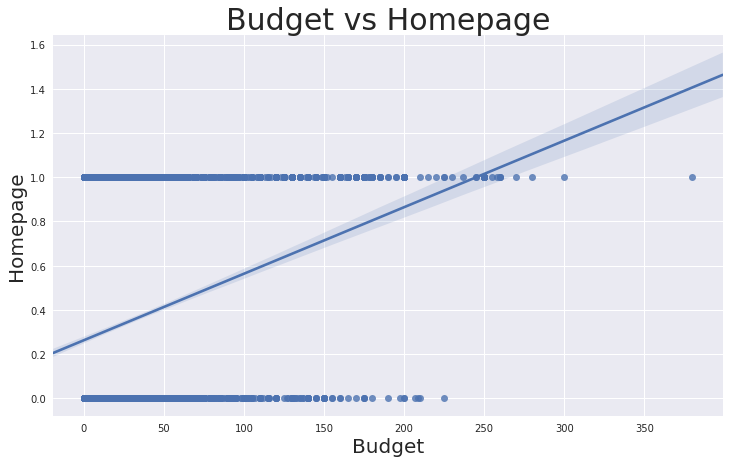

In [122]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['budget'],df_exp['homepage'])
plt.ylabel('Homepage', fontsize=20)
plt.xlabel('Budget', fontsize=20)
plt.title('Budget vs Homepage',size= 30);

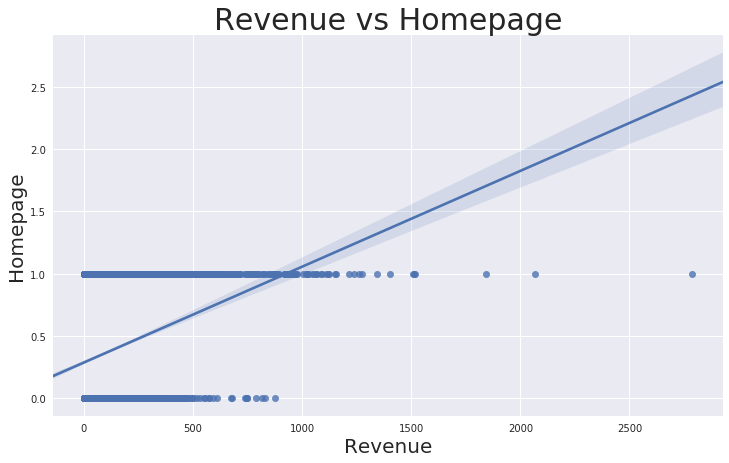

In [123]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['revenue'],df_exp['homepage'])
plt.ylabel('Homepage', fontsize=20)
plt.xlabel('Revenue', fontsize=20)
plt.title('Revenue vs Homepage',size= 30);

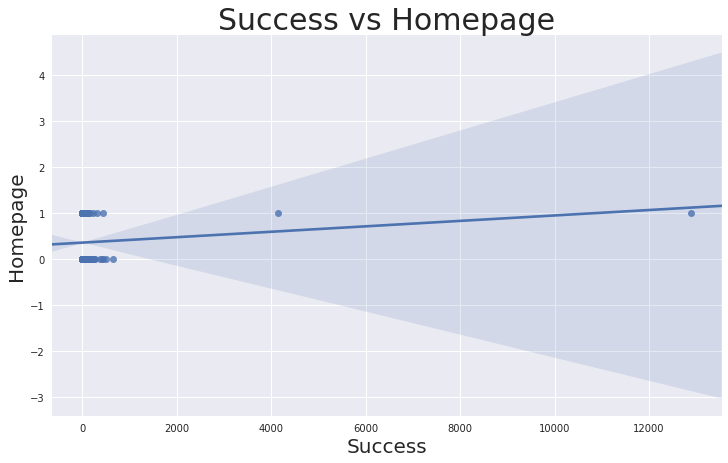

In [124]:
plt.figure(figsize=(12,7))
sns.regplot(df_exp['success'],df_exp['homepage'])
plt.ylabel('Homepage', fontsize=20)
plt.xlabel('Success', fontsize=20)
plt.title('Success vs Homepage',size= 30);

### Obviously having homepage correlated with everything, especially nowadays. It is not one of the most important component of the success, but it is helpful.

# Time and money. Let's explore release date.

In [125]:
df_time = df_exp.set_index(pd.DatetimeIndex(df_exp['release_date']))
df_time.dropna(inplace=True)

In [126]:
df_time['month'] = [int(str(x).split('-')[1]) for x in df_time['release_date']]

In [127]:
df_time.sort_values('month', ascending=True, inplace=True)

In [128]:
dicti = {1 : 'Jan',
2 : 'Feb',
3 : 'Mar',
4 : 'Apr',
5 : 'May',
6 : 'Jun',
7 : 'Jul',
8: 'Aug',
9 : 'Sep',
10 : 'Oct',
11 : 'Nov',
12 : 'Dec'}

df_time['month'] = df_time.month.map(dicti)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


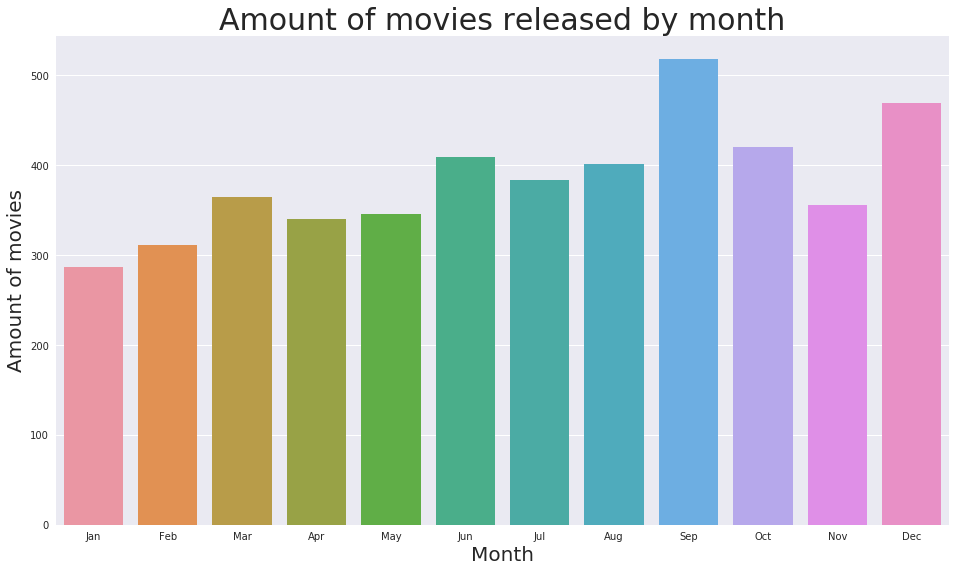

In [129]:
plt.figure(figsize = (16, 9))
sns.countplot(x='month', data=df_time)

plt.title('Amount of movies released by month', size = 30)
plt.ylabel('Amount of movies', fontsize=20)
plt.xlabel('Month', fontsize=20);

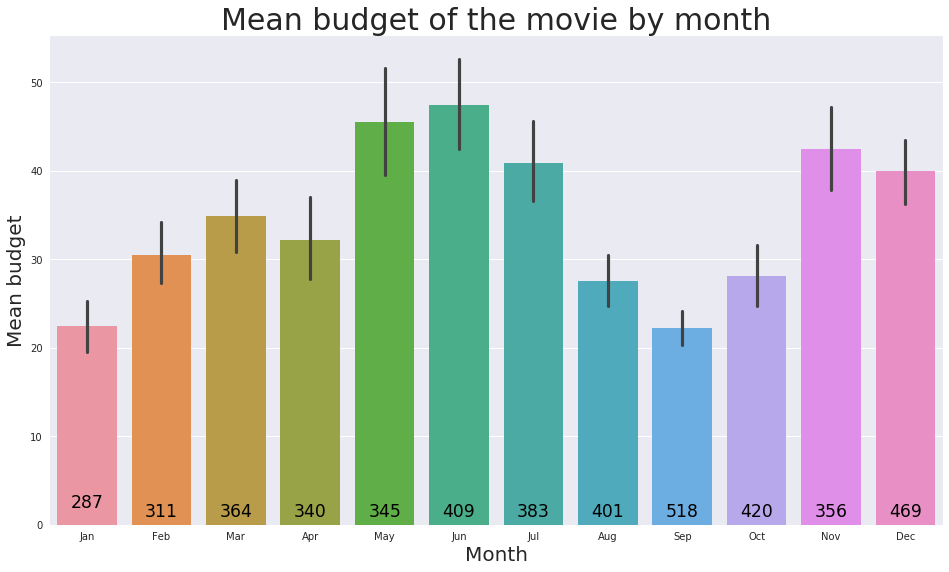

In [131]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_time['month'], y=df_time['budget'])

monthsl = ['Jan','Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec']
medians = df_time.groupby(['month'])['title'].value_counts().values
nobs = df_time['month'].value_counts()
nobs = [str(nobs[x]) for x in monthsl]
nobs = [i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='xx-large', color='k')

plt.title('Mean budget of the movie by month', size = 30)
plt.ylabel('Mean budget', fontsize=20)
plt.xlabel('Month', fontsize=20);

sns.plt.show();


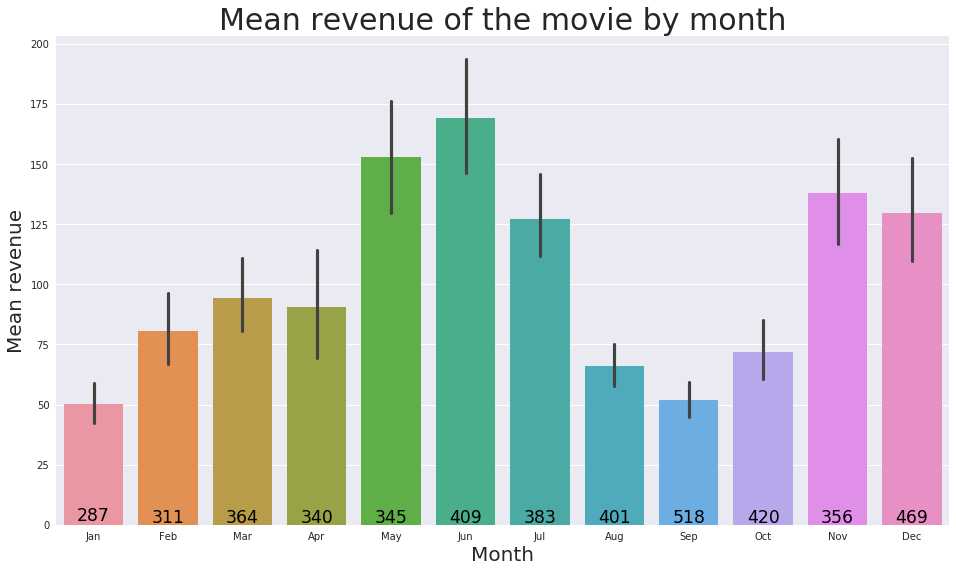

In [132]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_time['month'], y=df_time['revenue'])

monthsl = ['Jan','Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec']
medians = df_time.groupby(['month'])['title'].value_counts().values
nobs = df_time['month'].value_counts()
nobs = [str(nobs[x]) for x in monthsl]
nobs = [i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='xx-large', color='k')

plt.title('Mean revenue of the movie by month', size = 30)
plt.ylabel('Mean revenue', fontsize=20)
plt.xlabel('Month', fontsize=20);

sns.plt.show();

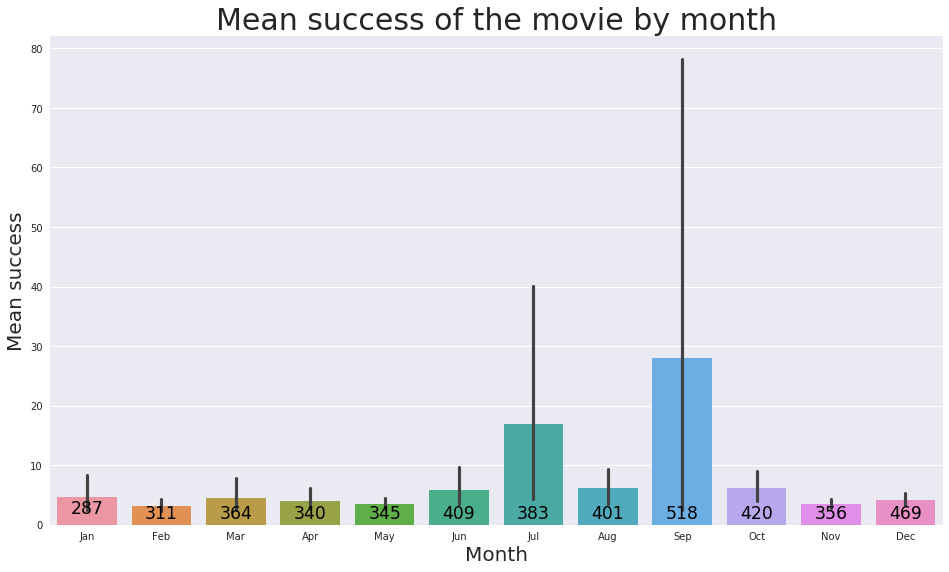

In [135]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_time['month'], y=df_time['success'])

monthsl = ['Jan','Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec']
medians = df_time.groupby(['month'])['title'].value_counts().values
nobs = df_time['month'].value_counts()
nobs = [str(nobs[x]) for x in monthsl]
nobs = [i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='xx-large', color='k')

plt.title('Mean success of the movie by month', size = 30)
plt.ylabel('Mean success', fontsize=20)
plt.xlabel('Month', fontsize=20);

sns.plt.show();

In [213]:
df_time[df_time['month'] == 'Sep'][['success', 'title', 'budget']].sort_values('success', ascending=False).head(15)

,success,title,budget
release_date,,,
2007-09-14,12889.386667,Paranormal Activity,0.015
1994-09-13,115.708519,Clerks,0.027
2006-09-29,100.783310,Facing the Giants,0.100
2010-09-17,100.531433,Catfish,0.030
1978-09-02,83.615385,Dawn of the Dead,0.650
1964-09-12,71.500000,A Fistful of Dollars,0.200
2008-09-26,65.912634,Fireproof,0.500
1986-09-26,64.640701,Crocodile Dundee,5.000
2010-09-13,63.672767,Insidious,1.500


### We can see the big amout of the movies was released in September, they have a low budget and small sum of revenue, but overall they are very successful.  
### Second big amout of the movies was released in May and June, with the biggest budget and biggest revenue.  
### Finally third claster we can see around December, with mid-high budgets and very good revenues.

# Movies by day

In [143]:
df_time.release_date = pd.to_datetime(df_time.release_date)
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4603 entries, 2001-01-20 to 1995-12-15
Data columns (total 23 columns):
belongs_to_collection    4603 non-null int64
budget                   4603 non-null float64
genres                   4603 non-null object
homepage                 4603 non-null int64
overview                 4603 non-null object
popularity               4603 non-null float64
production_companies     4603 non-null object
production_countries     4603 non-null object
release_date             4603 non-null datetime64[ns]
revenue                  4603 non-null float64
runtime                  4603 non-null float64
spoken_languages         4603 non-null object
tagline                  4603 non-null object
title                    4603 non-null object
vote_average             4603 non-null float64
vote_count               4603 non-null float64
keywords                 4603 non-null object
cast                     4603 non-null object
crew                     4603 non-n

In [144]:
df_time['weekday'] = pd.Series(df_time['release_date']).dt.dayofweek
df_time.sort_values('weekday', ascending=True, inplace=True)

In [145]:
dicti = {0 : 'Mon',
1 : 'Tue',
2 : 'Wed',
3 : 'Thu',
4 : 'Fri',
5 : 'Sat',
6 : 'Sun'}

df_time['weekday'] = df_time.weekday.map(dicti)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


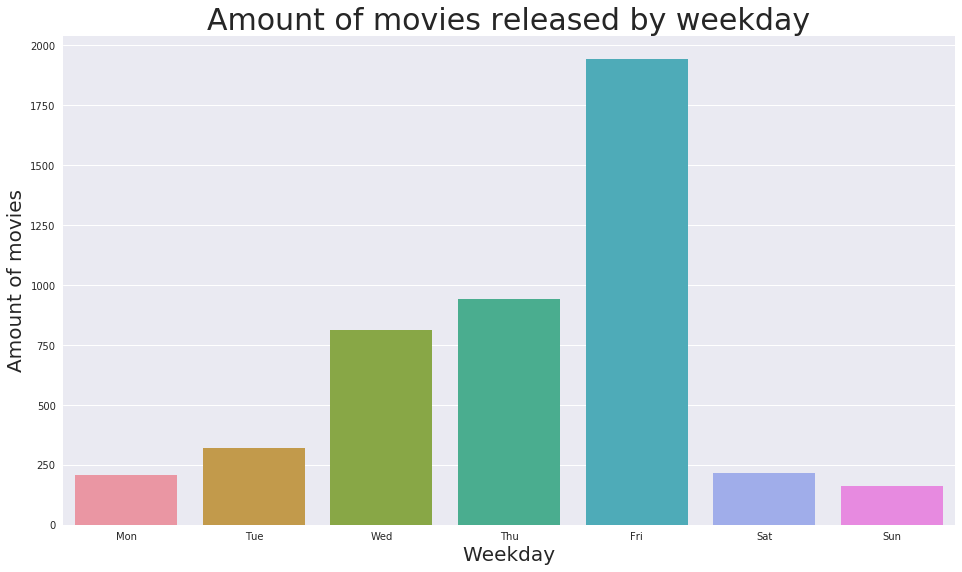

In [146]:
plt.figure(figsize = (16, 9))
sns.countplot(x='weekday', data=df_time)

plt.title('Amount of movies released by weekday', size = 30)
plt.ylabel('Amount of movies', fontsize=20)
plt.xlabel('Weekday', fontsize=20);

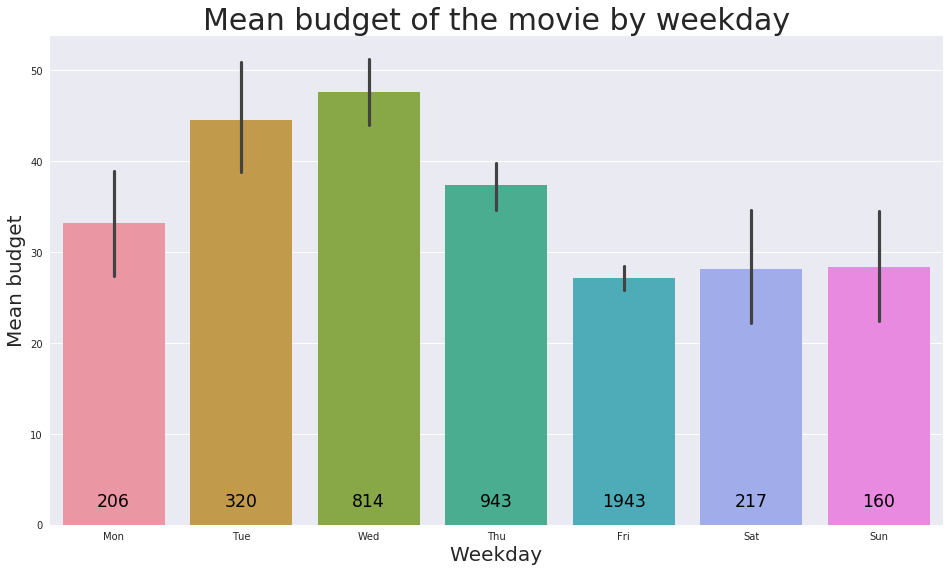

In [147]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_time['weekday'], y=df_time['budget'])

daysl = ['Mon','Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
medians = df_time.groupby(['weekday'])['title'].value_counts().values
nobs = df_time['weekday'].value_counts()
nobs = [str(nobs[x]) for x in daysl]
nobs = [i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='xx-large', color='k')

plt.title('Mean budget of the movie by weekday', size = 30)
plt.ylabel('Mean budget', fontsize=20)
plt.xlabel('Weekday', fontsize=20);

sns.plt.show();


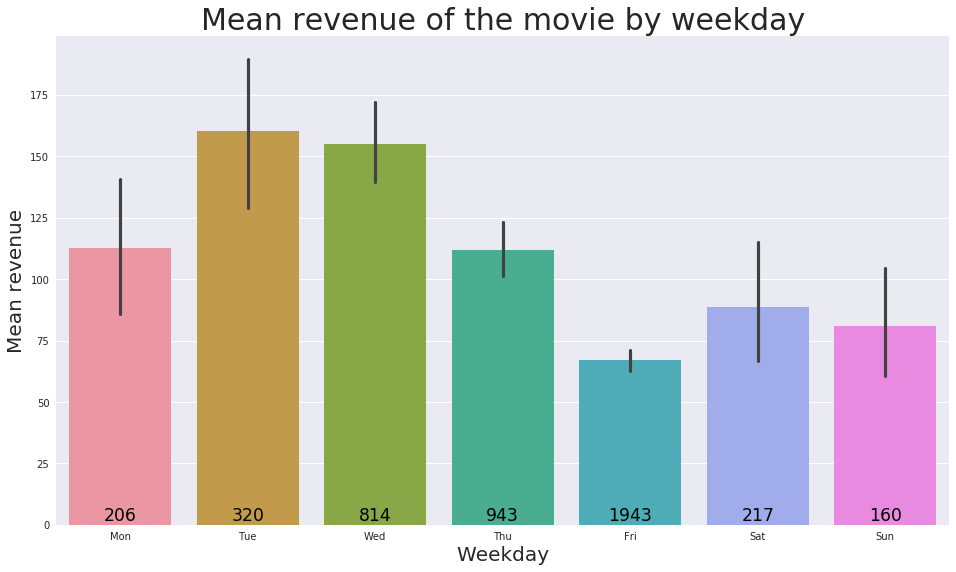

In [148]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_time['weekday'], y=df_time['revenue'])

daysl = ['Mon','Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
medians = df_time.groupby(['weekday'])['title'].value_counts().values
nobs = df_time['weekday'].value_counts()
nobs = [str(nobs[x]) for x in daysl]
nobs = [i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='xx-large', color='k')

plt.title('Mean revenue of the movie by weekday', size = 30)
plt.ylabel('Mean revenue', fontsize=20)
plt.xlabel('Weekday', fontsize=20);

sns.plt.show();

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


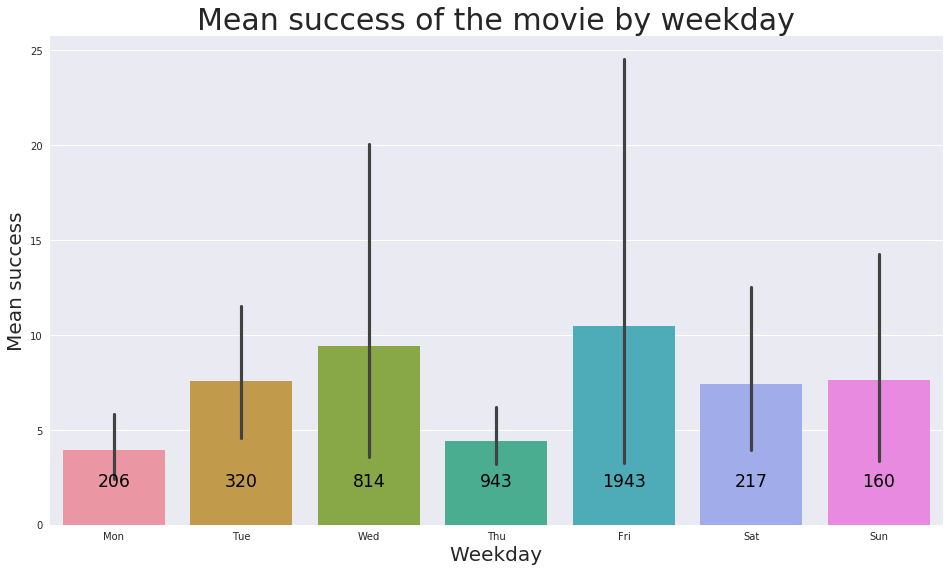

In [149]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_time['weekday'], y=df_time['success'])

daysl = ['Mon','Tue', 'Wed', 'Thu', 'Fri','Sat','Sun']
medians = df_time.groupby(['weekday'])['title'].value_counts().values
nobs = df_time['weekday'].value_counts()
nobs = [str(nobs[x]) for x in daysl]
nobs = [i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='xx-large', color='k')

plt.title('Mean success of the movie by weekday', size = 30)
plt.ylabel('Mean success', fontsize=20)
plt.xlabel('Weekday', fontsize=20);

sns.plt.show();

### Most of the movies was released by Friday, so people will go and see them on weekend, which makes total sense. But also most expensive movies that generates more profit was released by Tuesday an Wednesday.

In [152]:
df_time[df_time['weekday'] == 'Tue'][['budget', 'title']].sort_values('budget', ascending=False).head(15)

,budget,title
release_date,,
2007-05-01,258.0,Spider-Man 3
2009-07-07,250.0,Harry Potter and the Half-Blood Prince
2015-12-15,245.0,Star Wars: The Force Awakens
2006-06-20,200.0,Pirates of the Caribbean: Dead Man's Chest
1997-11-18,200.0,Titanic
2011-06-28,195.0,Transformers: Dark of the Moon
2015-05-19,190.0,Tomorrowland
2007-12-04,180.0,The Golden Compass
2014-05-27,178.0,Edge of Tomorrow


In [214]:
df_time[df_time['weekday'] == 'Tue'][['revenue', 'title', 'budget']].sort_values('revenue', ascending=False).head(15)

,revenue,title,budget
release_date,,,
2015-12-15,2068.223624,Star Wars: The Force Awakens,245.0
1997-11-18,1845.034188,Titanic,200.0
2015-06-09,1513.528810,Jurassic World,150.0
2011-06-28,1123.746996,Transformers: Dark of the Moon,195.0
2006-06-20,1065.659812,Pirates of the Caribbean: Dead Man's Chest,200.0
2013-06-25,970.761885,Despicable Me 2,76.0
2009-07-07,933.959197,Harry Potter and the Half-Blood Prince,250.0
2007-05-01,890.871626,Spider-Man 3,258.0
2012-06-26,877.244782,Ice Age: Continental Drift,95.0


In [215]:
df_time[df_time['weekday'] == 'Fri'][['success', 'title', 'budget']].sort_values('success', ascending=False).head(15)

,success,title,budget
release_date,,,
2007-09-14,12889.386667,Paranormal Activity,0.015
2015-07-10,425.644100,The Gallows,0.100
2004-08-06,419.522723,Open Water,0.130
1942-08-14,310.709965,Bambi,0.858
2017-07-07,154.842550,A Ghost Story,0.100
2007-03-23,128.440706,Once,0.160
2004-06-11,114.295243,Napoleon Dynamite,0.400
2005-12-02,108.850308,Keeping Mum,0.169
1977-07-22,107.695652,The Hills Have Eyes,0.230


# What's your poison? Let's explore genres

Some of the movies contain few genres, so I will use them all.

In [155]:
gen = df_exp.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
gen.name = 'genre'
df_gen = df_exp.drop('genres', axis=1).join(gen)

In [156]:
df_gen_count = pd.DataFrame(df_gen['genre'].value_counts(), columns=(['genre'])).reset_index()
df_gen_count.rename(index=str, columns={"index": "genre", "genre": "count"}, inplace=True)
df_gen_count

,genre,count
0,Drama,2565
1,Comedy,1832
2,Thriller,1502
3,Action,1417
4,Romance,995


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


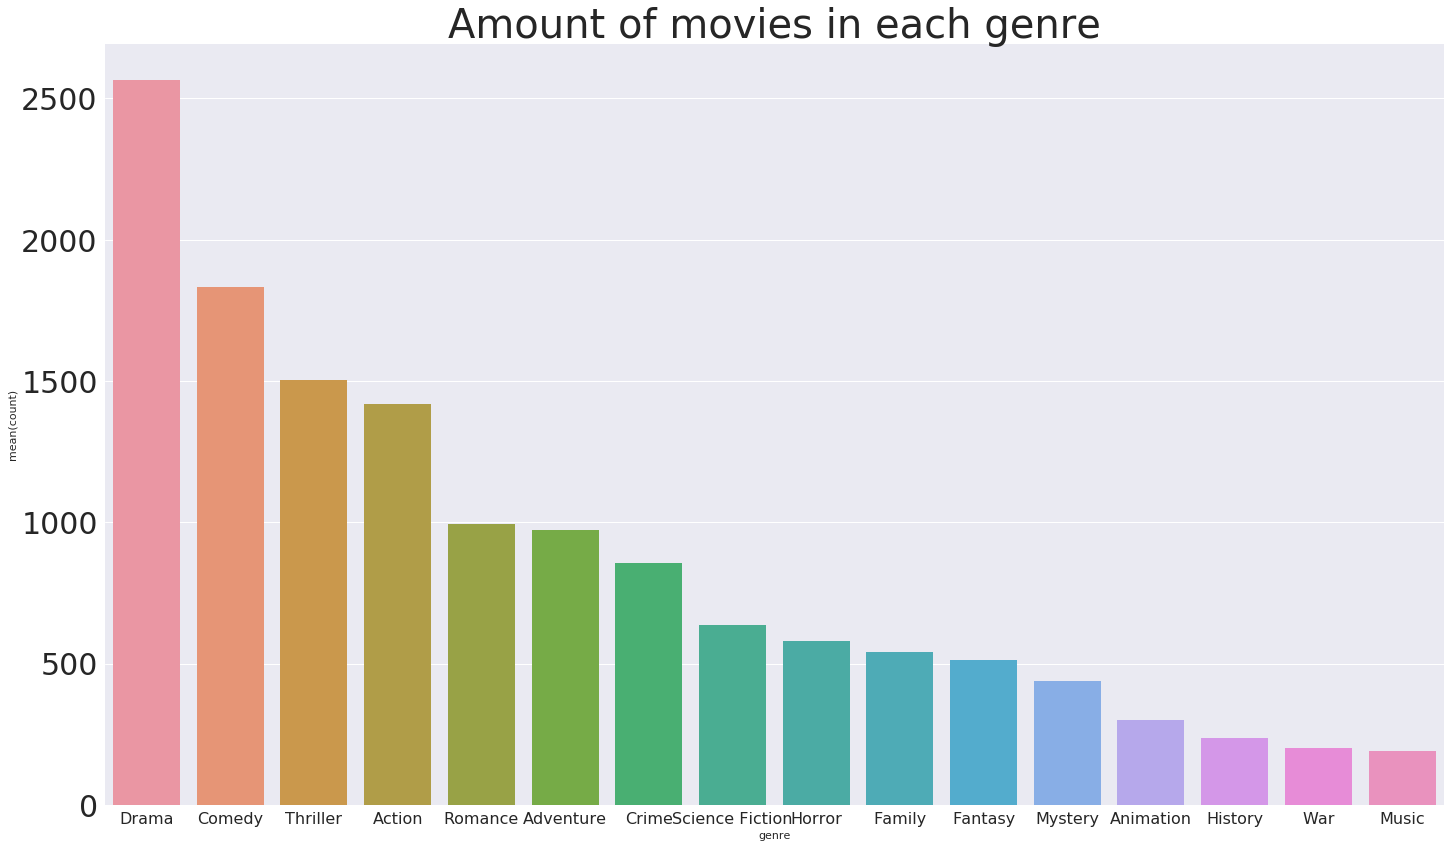

In [157]:
plt.figure(figsize=(24, 14))

sns.barplot(x='genre', y='count', data=df_gen_count.head(16))
plt.title('Amount of movies in each genre', fontsize = 40);
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 30)
plt.show();

### Drama is the most popular genre. And comedy is the second popular. Probably because it is easier to make people cry, than laugh

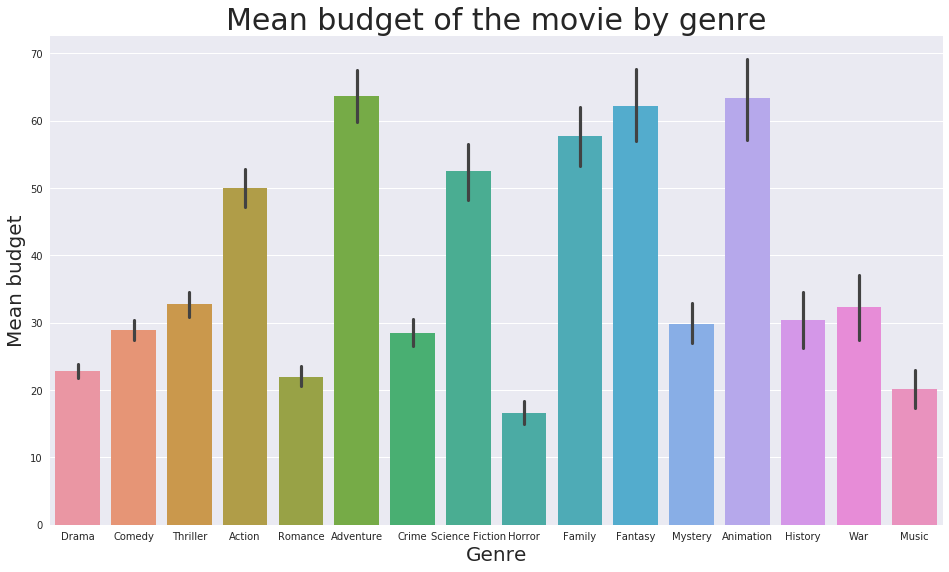

In [158]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_gen['genre'], y=df_gen['budget'], order=df_gen_count['genre'].head(16))

plt.title('Mean budget of the movie by genre', size = 30)
plt.ylabel('Mean budget', fontsize=20)
plt.xlabel('Genre', fontsize=20);

sns.plt.show();

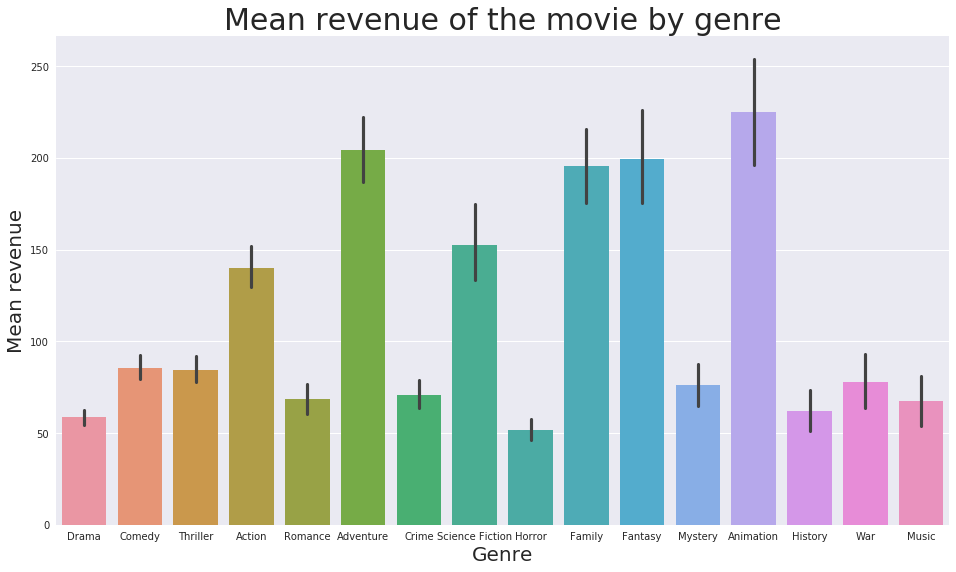

In [159]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_gen['genre'], y=df_gen['revenue'], order=df_gen_count['genre'].head(16))

plt.title('Mean revenue of the movie by genre', size = 30)
plt.ylabel('Mean revenue', fontsize=20)
plt.xlabel('Genre', fontsize=20);

sns.plt.show();

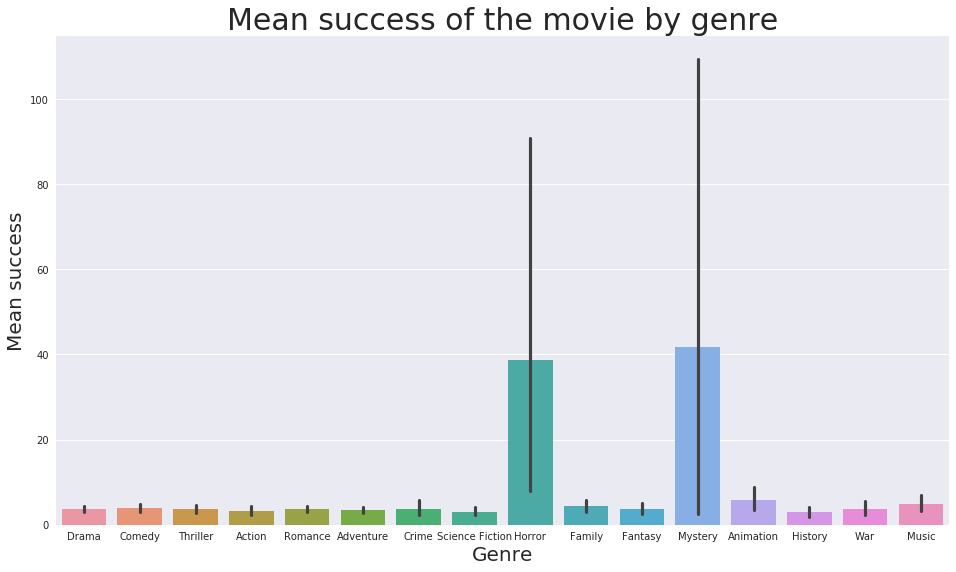

In [160]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x=df_gen['genre'], y=df_gen['success'], order=df_gen_count['genre'].head(16))

plt.title('Mean success of the movie by genre', size = 30)
plt.ylabel('Mean success', fontsize=20)
plt.xlabel('Genre', fontsize=20);

sns.plt.show();

In [1]:
df_gen[df_gen['genre'] == 'Mystery'][['success', 'title', 'budget', 'revenue']].sort_values('success', ascending=False).head(15)

NameError: name 'df_gen' is not defined

### As we can see, the most expencive movies that generate the biggest amout of money is animation, anventure, sci-fi, action and family movies with all advanced special effects and most expensive actors. and most successful movie is low budget horros and mysteries. In general every genre generating amout of money that equaly proportional to it's budget. There is no bad or good genres. All of them is in demand.

# Who does that? Production companies, actor and directors.

In [162]:
pr_comp = df_exp.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
pr_comp.name = 'production_companies'
df_prod_comp = df_exp.drop('production_companies', axis=1).join(pr_comp)

In [163]:
df_comp_count = pd.DataFrame(df_prod_comp['production_companies'].value_counts(), columns=(['production_companies'])).reset_index()
df_comp_count.rename(index=str, columns={"index": "production_companies", "production_companies": "count"}, inplace=True)
df_comp_count.head(17)

,production_companies,count
0,Warner Bros.,416
1,Universal Pictures,386
2,Paramount Pictures,344
3,Twentieth Century Fox Film Corporation,297
4,Columbia Pictures,212
5,New Line Cinema,175
6,Metro-Goldwyn-Mayer (MGM),163
7,Walt Disney Pictures,134
8,Touchstone Pictures,129
9,Columbia Pictures Corporation,116


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


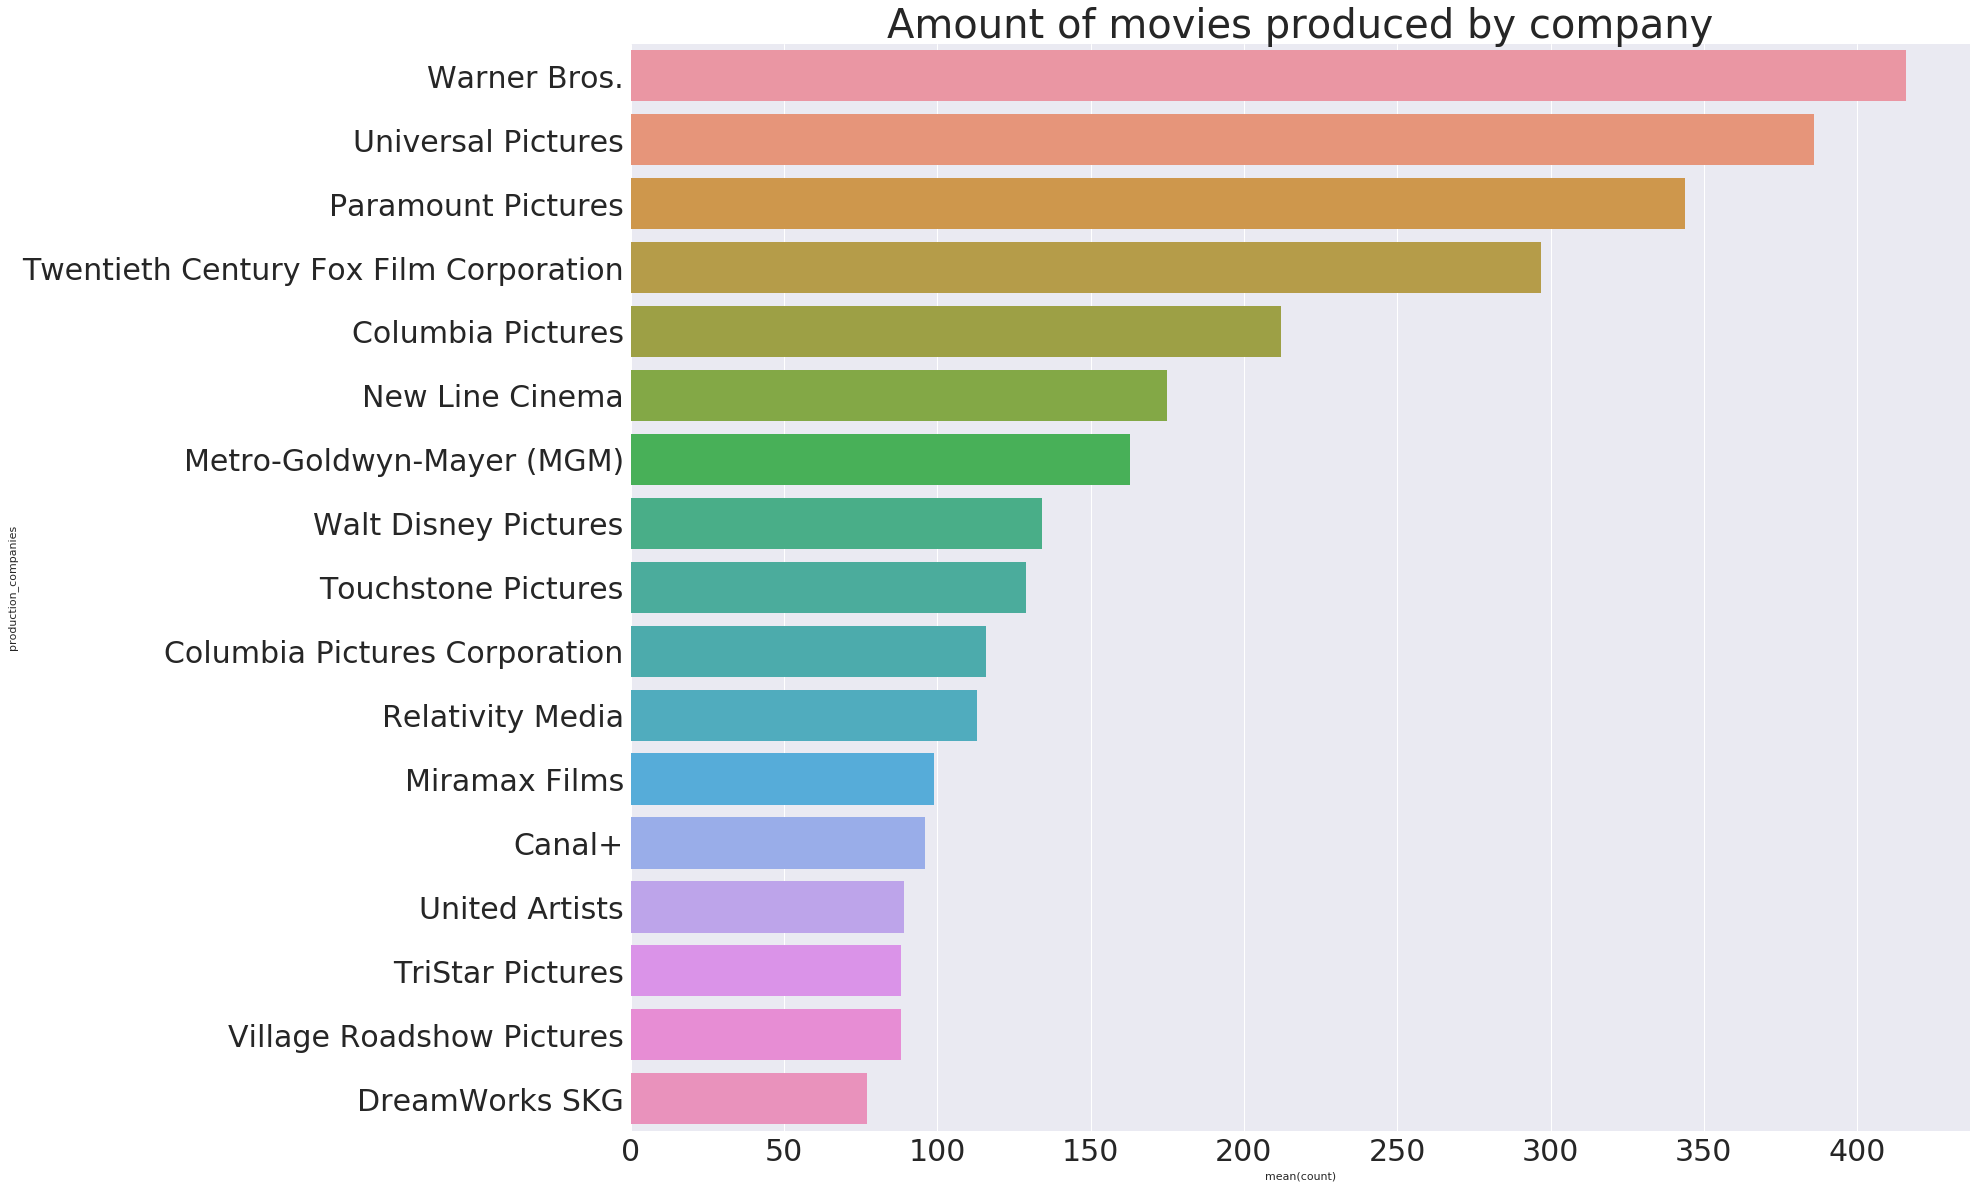

In [164]:
plt.figure(figsize=(24, 20))

sns.barplot(x='count', y='production_companies', data=df_comp_count.head(17))
plt.title('Amount of movies produced by company', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

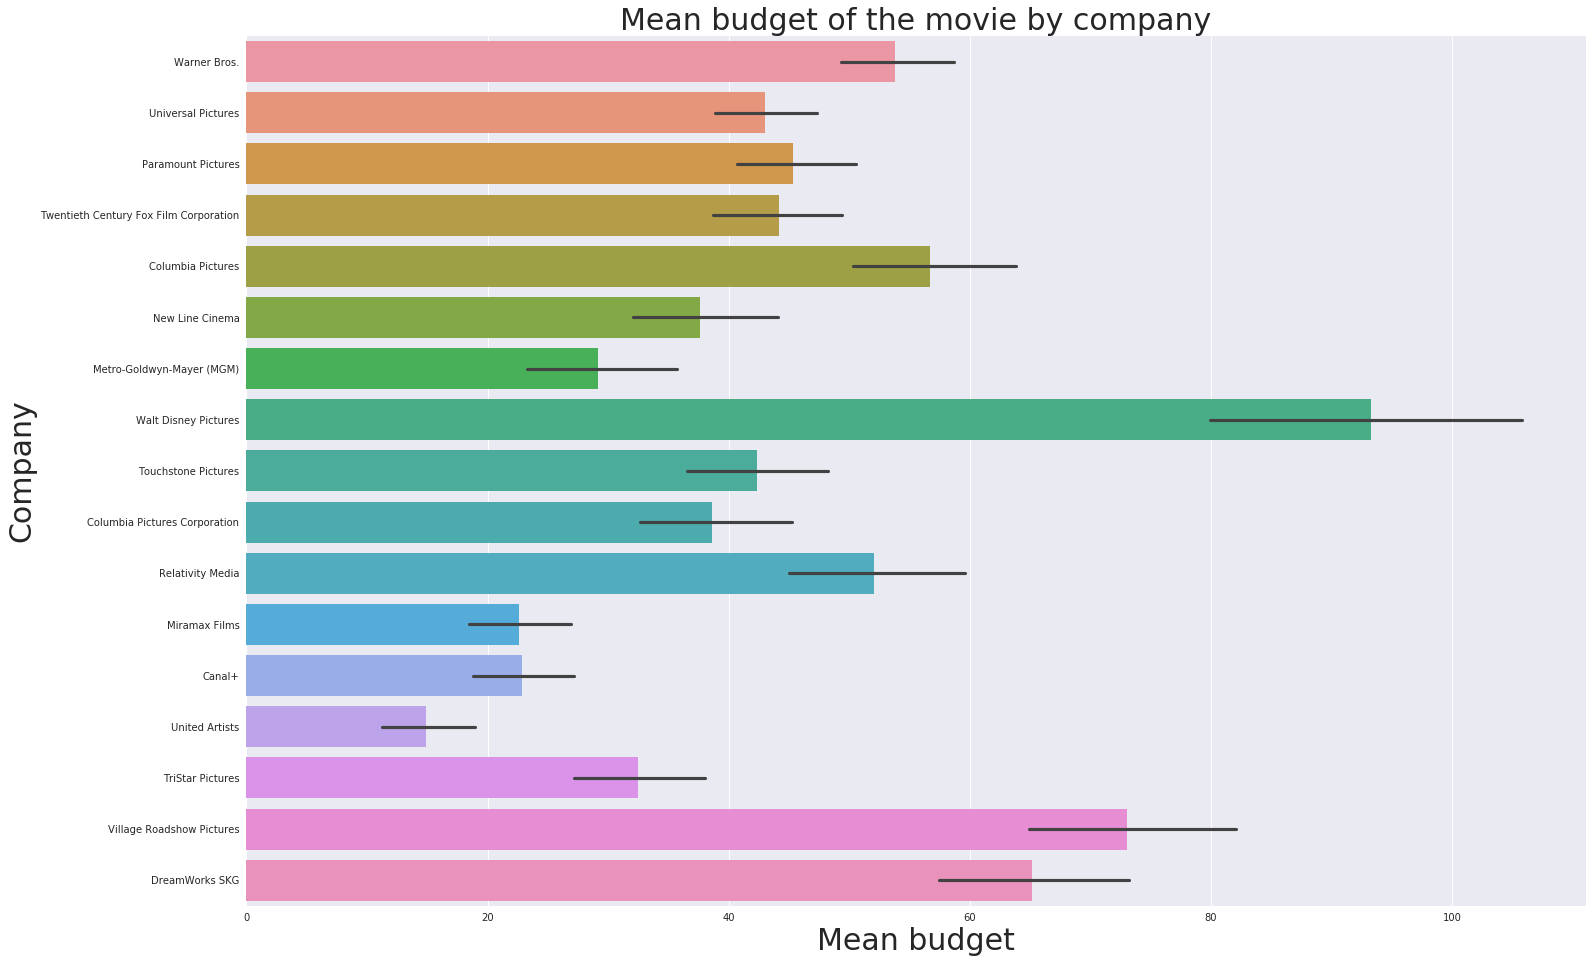

In [165]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_prod_comp['budget'], y=df_prod_comp['production_companies'], order=df_comp_count['production_companies'].head(17))

plt.title('Mean budget of the movie by company', size = 30)
plt.ylabel('Company', fontsize=30)
plt.xlabel('Mean budget', fontsize=30);

sns.plt.show();

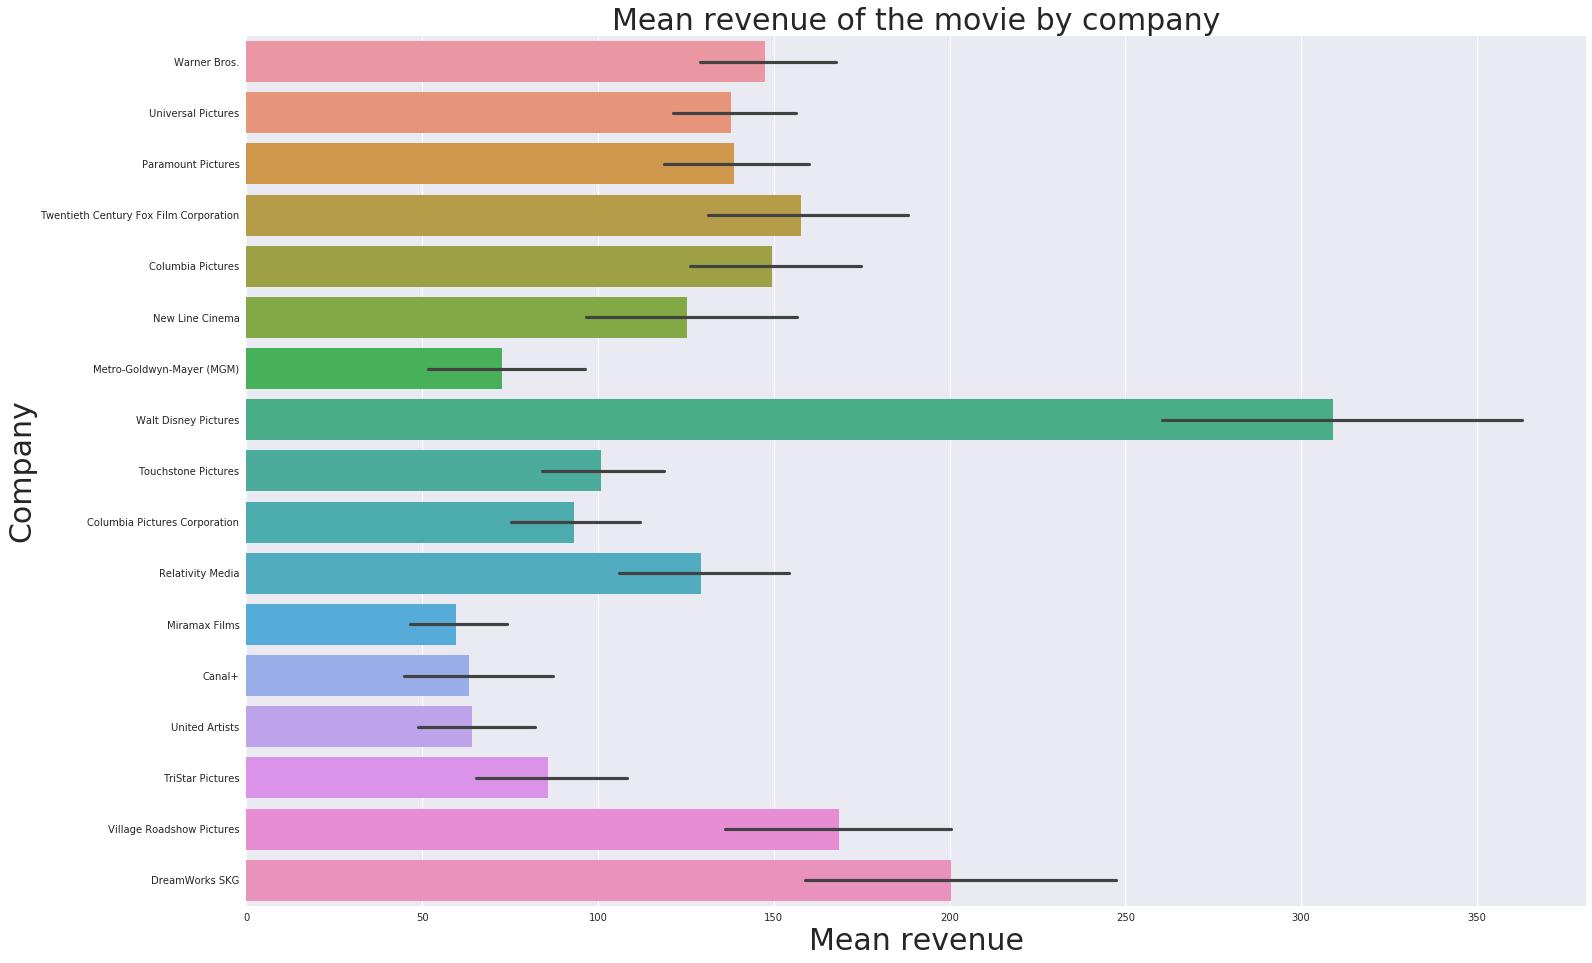

In [166]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_prod_comp['revenue'], y=df_prod_comp['production_companies'], order=df_comp_count['production_companies'].head(17))

plt.title('Mean revenue of the movie by company', size = 30)
plt.ylabel('Company', fontsize=30)
plt.xlabel('Mean revenue', fontsize=30);

sns.plt.show();

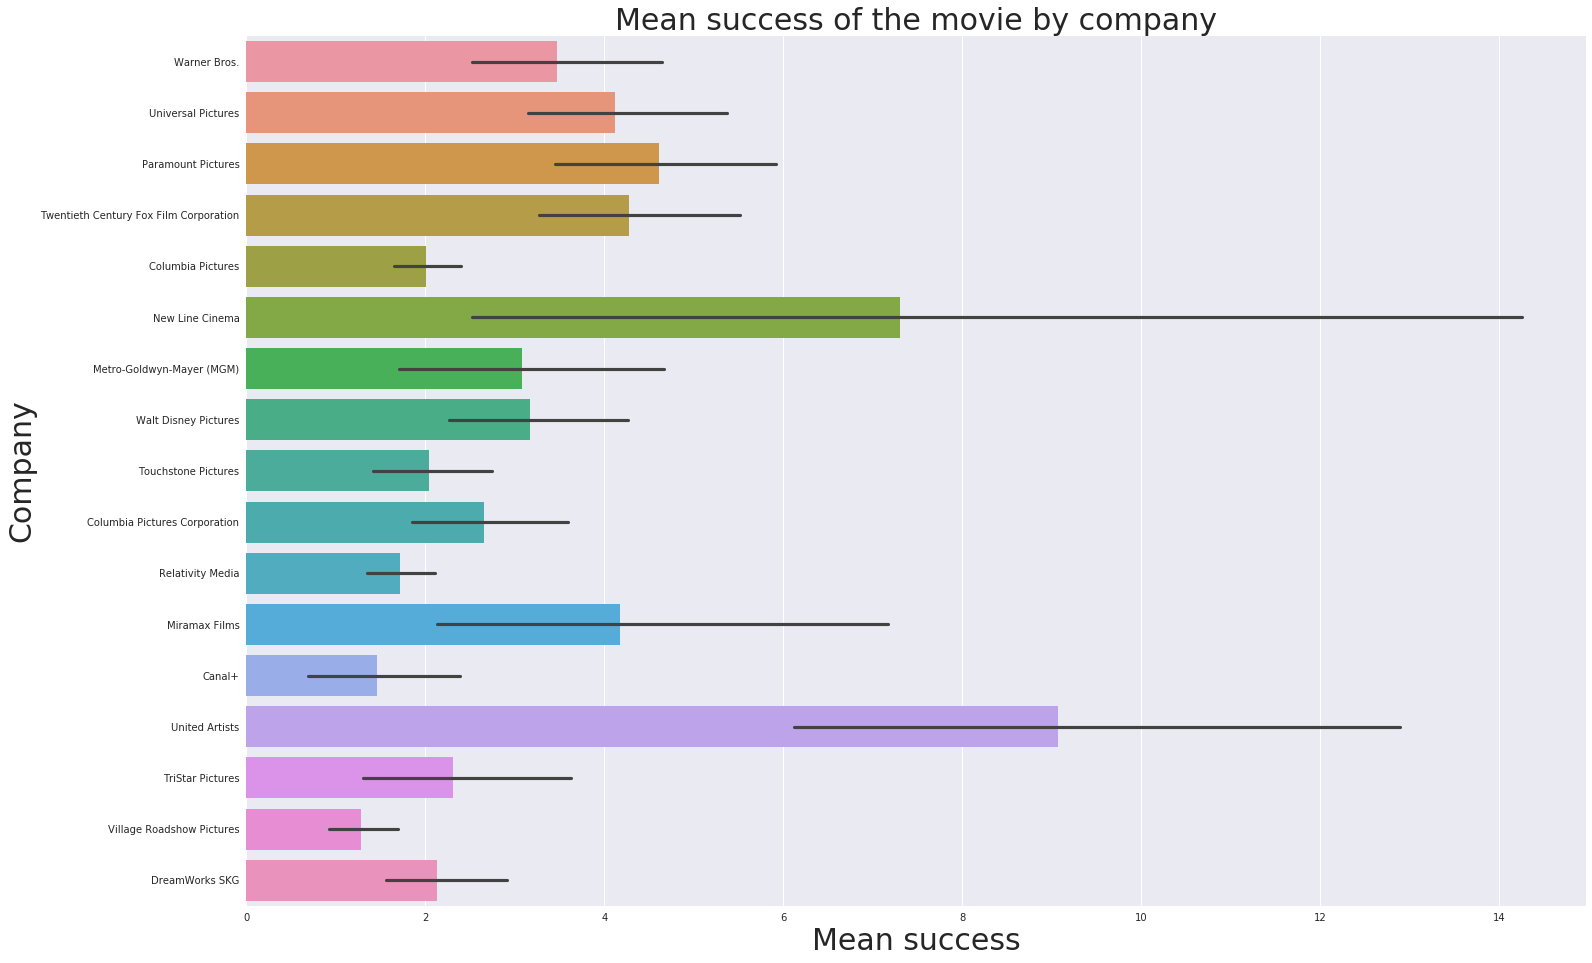

In [167]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_prod_comp['success'], y=df_prod_comp['production_companies'], order=df_comp_count['production_companies'].head(17))

plt.title('Mean success of the movie by company', size = 30)
plt.ylabel('Company', fontsize=30)
plt.xlabel('Mean success', fontsize=30);

sns.plt.show();

In [216]:
df_prod_comp[df_prod_comp['production_companies'] == 'United Artists'][['success', 'title', 'budget']].sort_values('success', ascending=False).head(15)

,success,title,budget
1857,116.235147,Rocky,1.00
2850,71.500000,A Fistful of Dollars,0.20
2848,61.736842,Dr. No,0.95
2846,48.952425,Goldfinger,2.50
2847,38.449382,From Russia with Love,2.00
1161,35.327092,One Flew Over the Cuckoo's Nest,3.00
6889,27.915200,Last Tango in Paris,1.25
2308,27.597451,Rocky II,7.00
2890,22.111119,Live and Let Die,7.00
1306,17.777778,Carrie,1.80


In [217]:
df_prod_comp[df_prod_comp['production_companies'] == 'New Line Cinema'][['success', 'title', 'budget']].sort_values('success', ascending=False).head(15)

,success,title,budget
31804,425.644100,The Gallows,0.100
2358,362.047059,The Texas Chain Saw Massacre,0.085
24406,38.272894,Annabelle,6.500
21409,23.461549,The Conjuring,13.000
227,14.454711,Dumb and Dumber,16.000
362,14.286235,The Mask,23.000
3333,13.962963,Teenage Mutant Ninja Turtles,13.500
1308,13.169174,A Nightmare on Elm Street,1.800
7033,10.903074,The Lord of the Rings: The Return of the King,94.000
5844,10.725157,The Lord of the Rings: The Two Towers,79.000


### Amout of the movies made by the company doesn't tell us anything, but the age of the company. Walt Disney have a highest mean budgets and revenues making animations and fantasies. With relatively small amout of the movies, Dream Works having high budget and revenues (probably because it was founded by Steven Spielberg and he, being one of the most successful director of all times, makes most of the movies). But most profitable if United Artists and New Line Cinema with low and mid-budget movies.

# Is it your fee or phone number??! Actors that we care about. Or not.

In [170]:
actor = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
actor.name = 'cast'
df_cast = df.drop('cast', axis=1).join(actor)

### Amout of the movies each actor did. From original 45 000 movies data set.

In [171]:
df_actor_count = pd.DataFrame(df_cast['cast'].value_counts(), columns=(['cast'])).reset_index()
df_actor_count.rename(index=str, columns={"index": "cast", "cast": "count"}, inplace=True)
df_actor_count.head(20)

,cast,count
0,Bess Flowers,242
1,Christopher Lee,149
2,John Wayne,126
3,Samuel L. Jackson,124
4,John Carradine,112
5,Gérard Depardieu,111
6,Donald Sutherland,111
7,Michael Caine,110
8,Jackie Chan,109
9,Frank Welker,108


In [172]:
actor = df_exp.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
actor.name = 'cast'
df_cast = df_exp.drop('cast', axis=1).join(actor)

### Amout of the movies each actor did. From our exploring movies data set of 5347 observations.

In [173]:
df_actor_count = pd.DataFrame(df_cast['cast'].value_counts(), columns=(['cast'])).reset_index()
df_actor_count.rename(index=str, columns={"index": "cast", "cast": "count"}, inplace=True)
df_actor_count.head(20)

,cast,count
0,Samuel L. Jackson,69
1,Robert De Niro,62
2,Bruce Willis,60
3,Matt Damon,57
4,Morgan Freeman,56
5,Brad Pitt,50
6,Liam Neeson,50
7,Nicolas Cage,50
8,Sylvester Stallone,49
9,Willem Dafoe,47


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


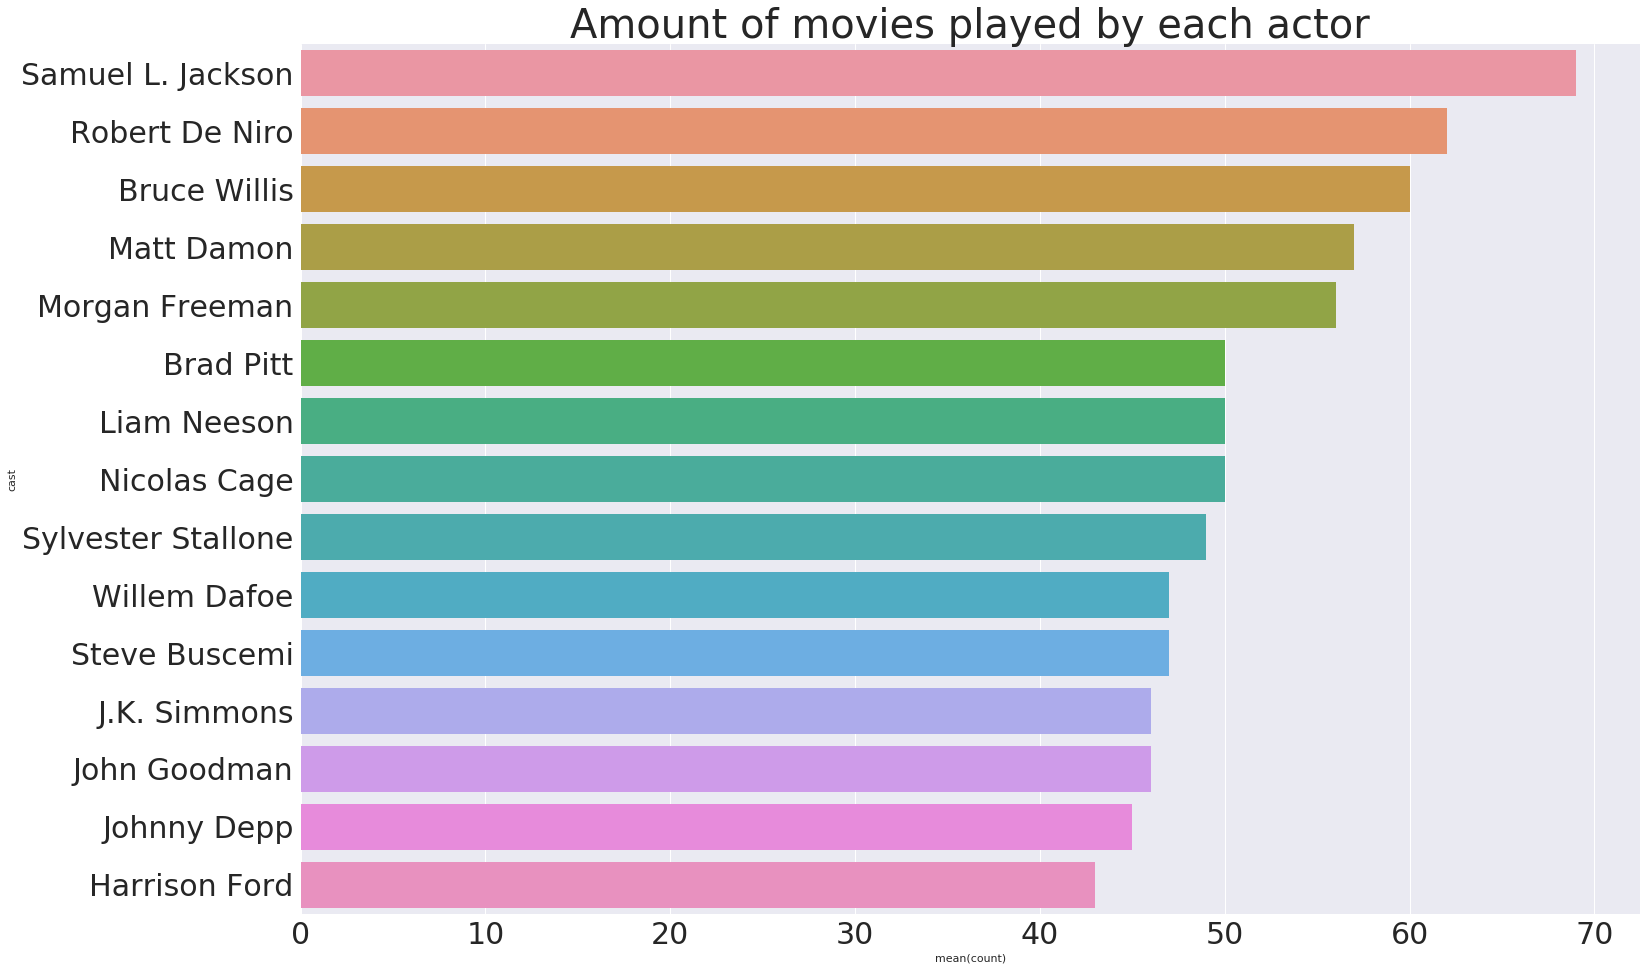

In [174]:
plt.figure(figsize=(24, 16))

sns.barplot(x='count', y='cast', data=df_actor_count.head(15))
plt.title('Amount of movies played by each actor', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

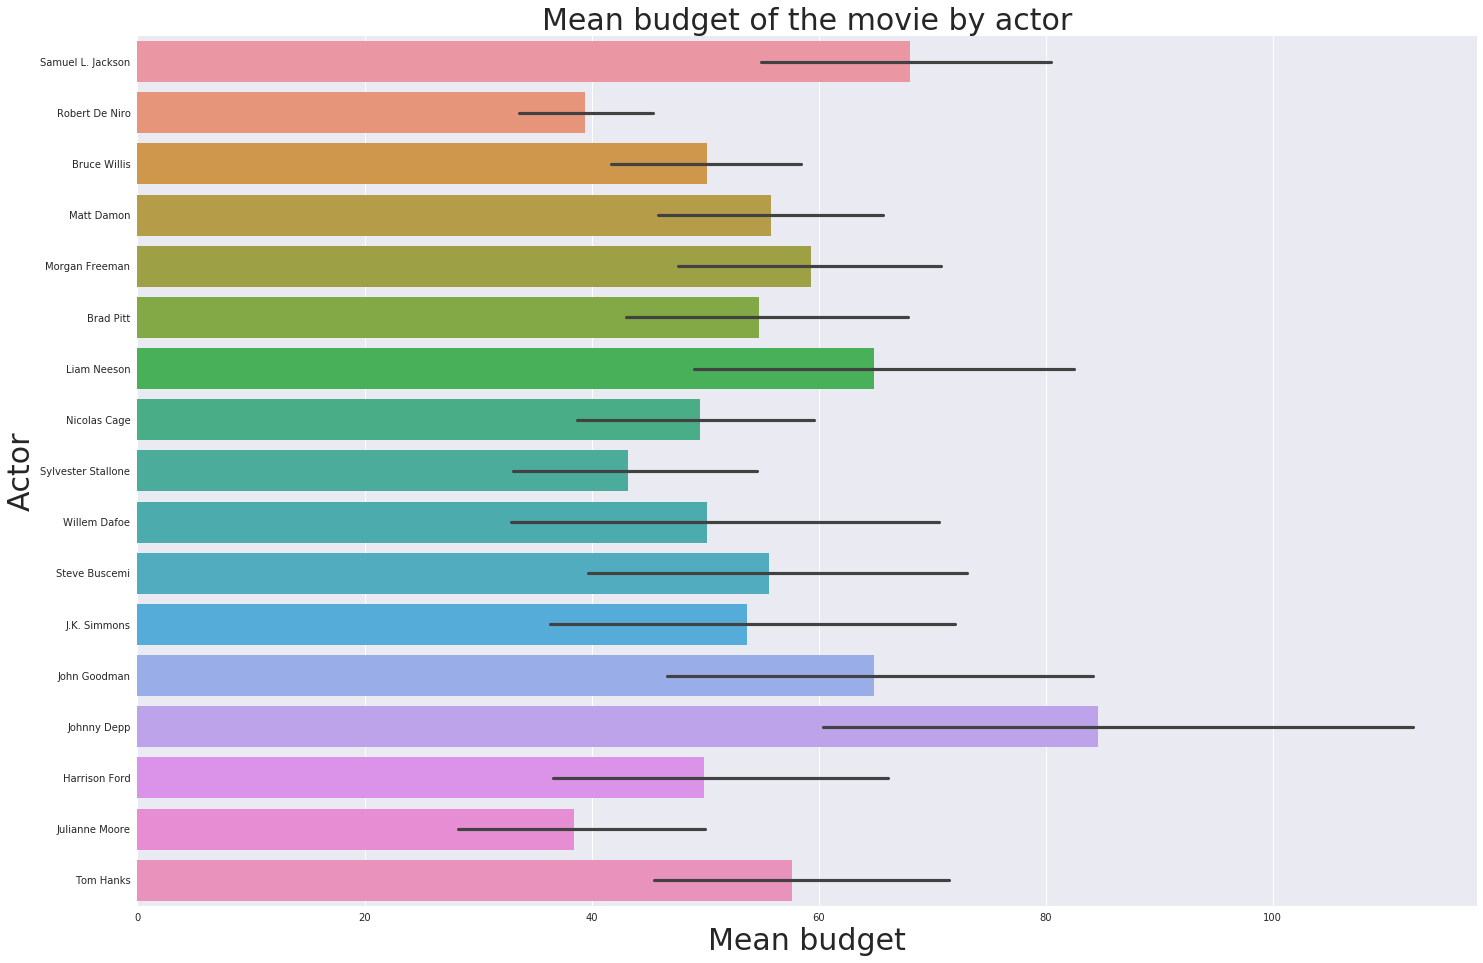

In [185]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_cast['budget'], y=df_cast['cast'], order=df_actor_count['cast'].head(17))

plt.title('Mean budget of the movie by actor', size = 30)
plt.ylabel('Actor', fontsize=30)
plt.xlabel('Mean budget', fontsize=30);

sns.plt.show();

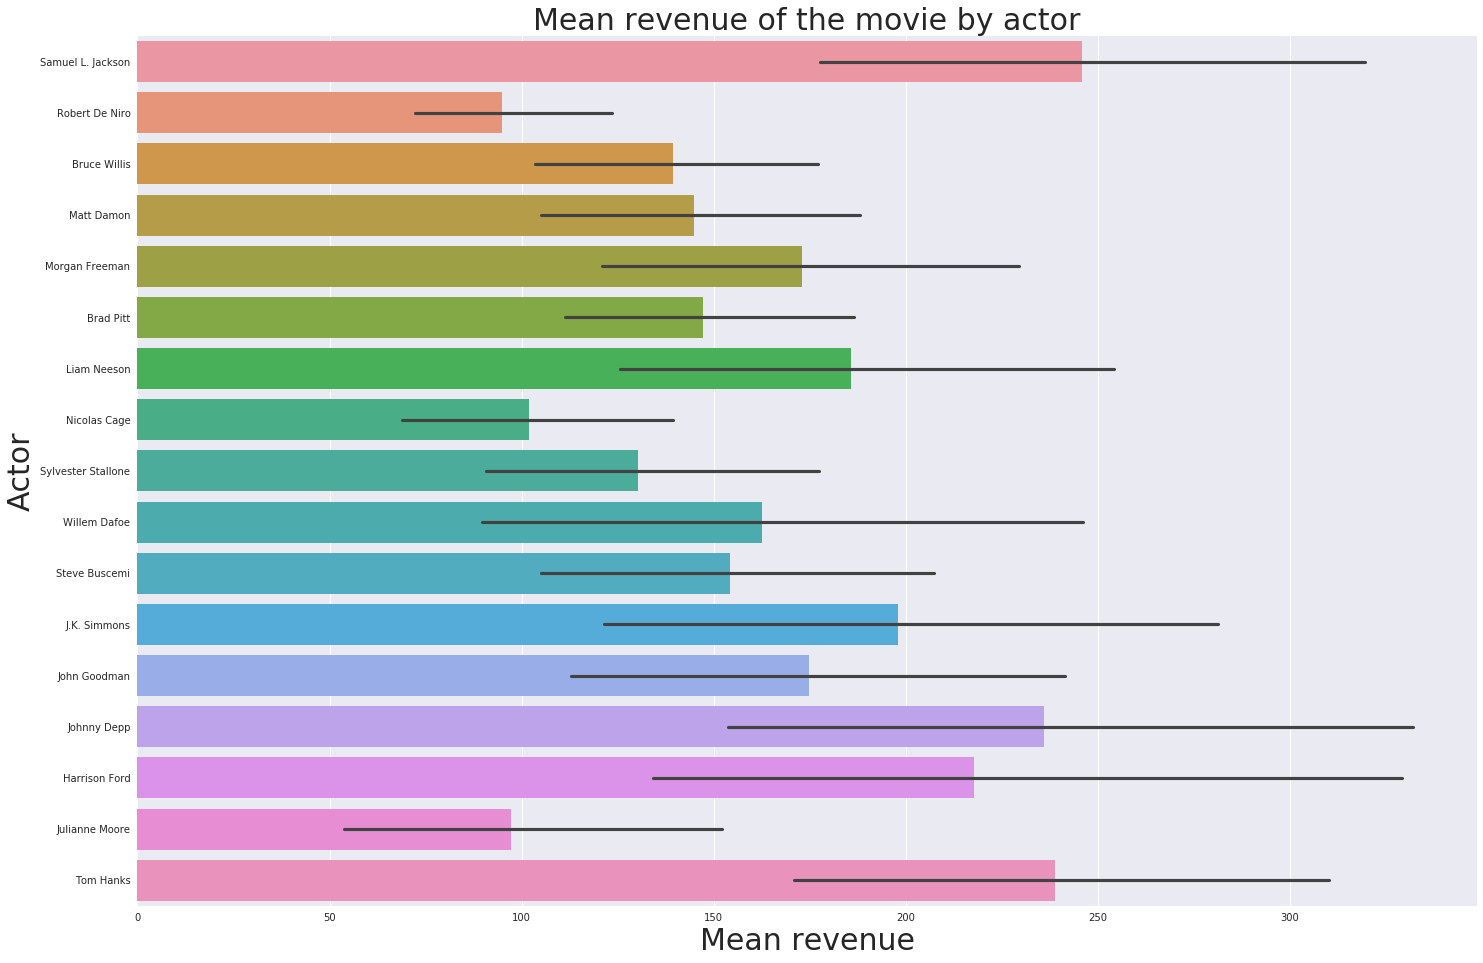

In [186]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_cast['revenue'], y=df_cast['cast'], order=df_actor_count['cast'].head(17))

plt.title('Mean revenue of the movie by actor', size = 30)
plt.ylabel('Actor', fontsize=30)
plt.xlabel('Mean revenue', fontsize=30);

sns.plt.show();

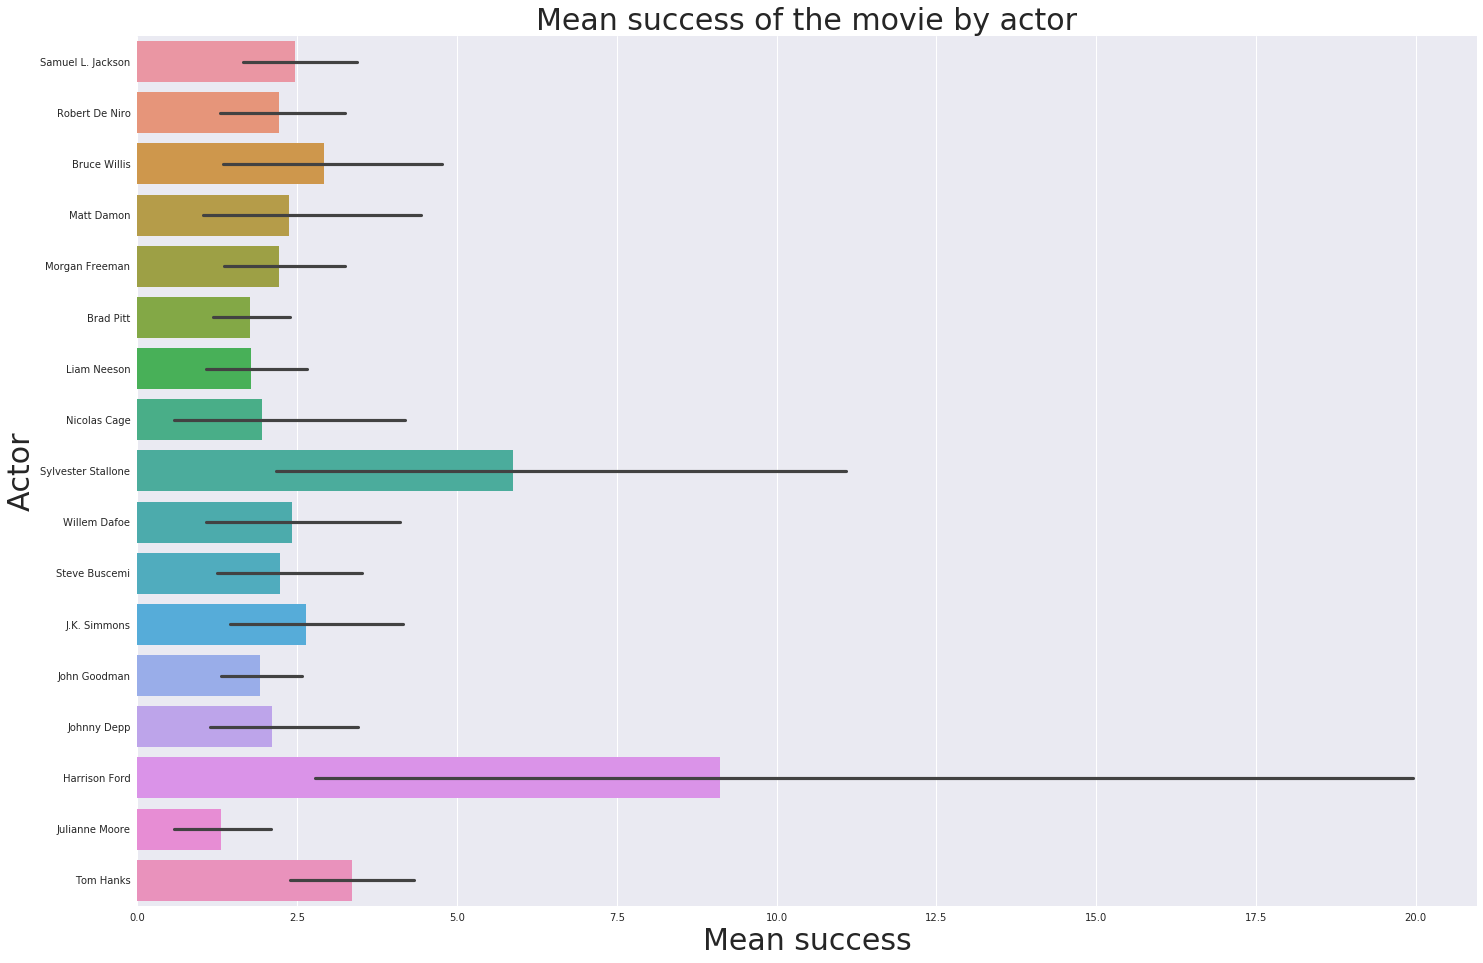

In [187]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_cast['success'], y=df_cast['cast'], order=df_actor_count['cast'].head(17))

plt.title('Mean success of the movie by actor', size = 30)
plt.ylabel('Actor', fontsize=30)
plt.xlabel('Mean success', fontsize=30);

sns.plt.show();

### Correlation between mean budget and mean revenue is obvious for almost each actor. Most of them playing the same type of the characters in the movies based on the same type  of the story. About types of the stories I'll explain later.  
### Significant success showed by Harrison Ford and Sylvester Stallone, because of the legendary movies they played back in a days, with low budgets and tremendously high revenue (Rocky, Rambo, Indiana Jones and of course Star Wars!).  
### More deep detailed analysis can be done about each and every actor in order to categorized them by the type and also by return they generate for 1 dollar spent on their fee as a lead.

# With the great power comes great responsibility. Director.

#### Amout of movies made by directors from original 45 000 movies data set.

In [188]:
df_dir_count = pd.DataFrame(df['director'].value_counts()).reset_index()
df_dir_count.rename(index=str, columns={"index": "director", "director": "count"}, inplace=True)
df_dir_count.head(10)

,director,count
0,John Ford,67
1,Michael Curtiz,66
2,Werner Herzog,55
3,Julien Duvivier,54
4,Alfred Hitchcock,53
5,Georges Méliès,51
6,Woody Allen,49
7,Jean-Luc Godard,47
8,Frank Capra,47
9,Sidney Lumet,46


### Amout of the movies made by director from our exploring movies data set of 5347 observations.¶

In [189]:
df_dir_count = pd.DataFrame(df_exp['director'].value_counts()).reset_index()
df_dir_count.rename(index=str, columns={"index": "director", "director": "count"}, inplace=True)
df_dir_count.head(10)

,director,count
0,Steven Spielberg,30
1,Clint Eastwood,27
2,Woody Allen,24
3,Ridley Scott,23
4,Alfred Hitchcock,21
5,Brian De Palma,18
6,Tim Burton,18
7,Martin Scorsese,18
8,Steven Soderbergh,17
9,Robert Zemeckis,17


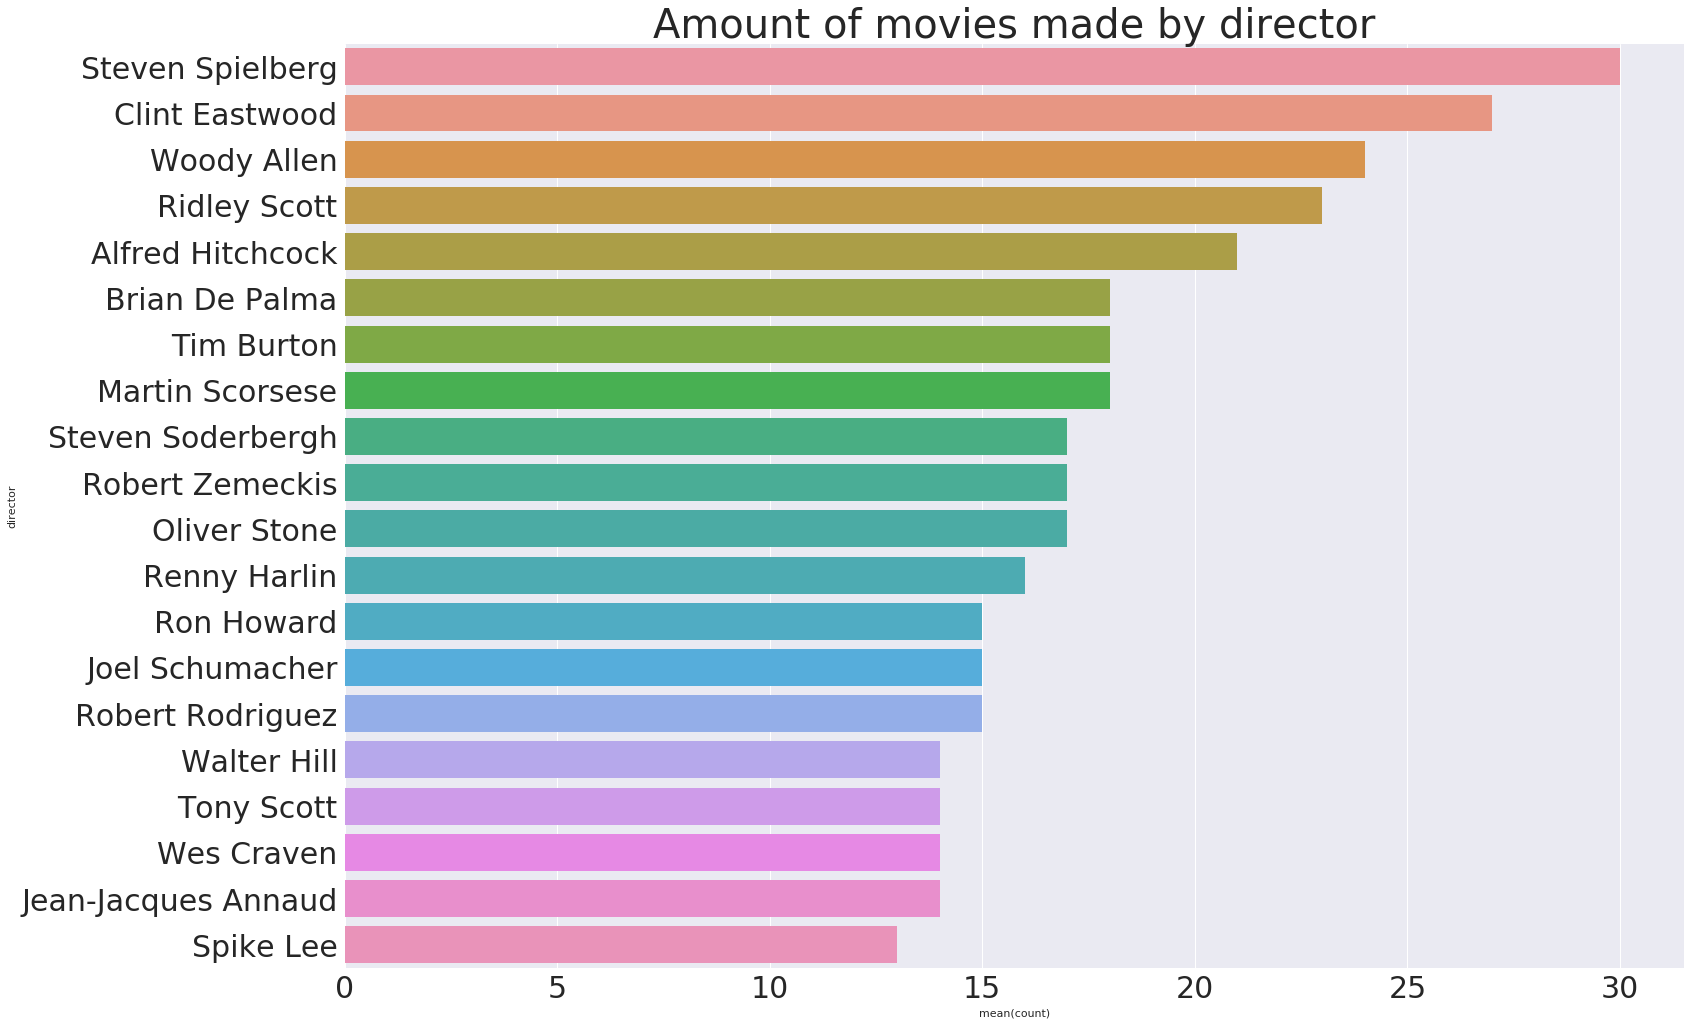

In [190]:
plt.figure(figsize=(24, 17))

sns.barplot(x='count', y='director', data=df_dir_count.head(20))
plt.title('Amount of movies made by director', fontsize = 40);
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show();

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


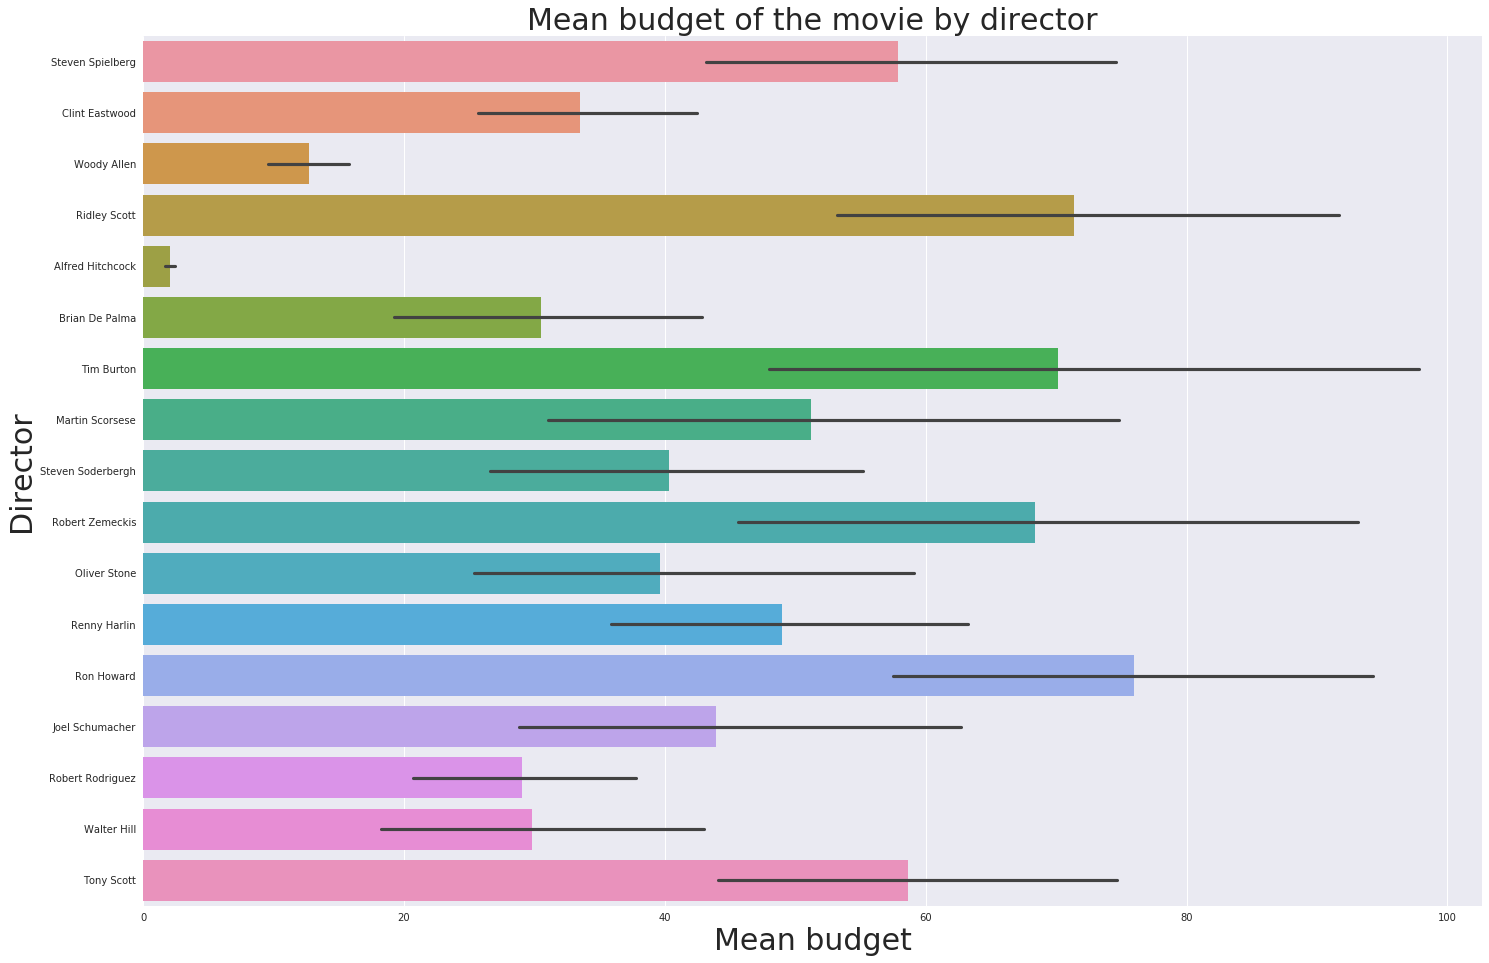

In [191]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_exp['budget'], y=df_exp['director'], order=df_dir_count['director'].head(17))

plt.title('Mean budget of the movie by director', size = 30)
plt.ylabel('Director', fontsize=30)
plt.xlabel('Mean budget', fontsize=30);

sns.plt.show();

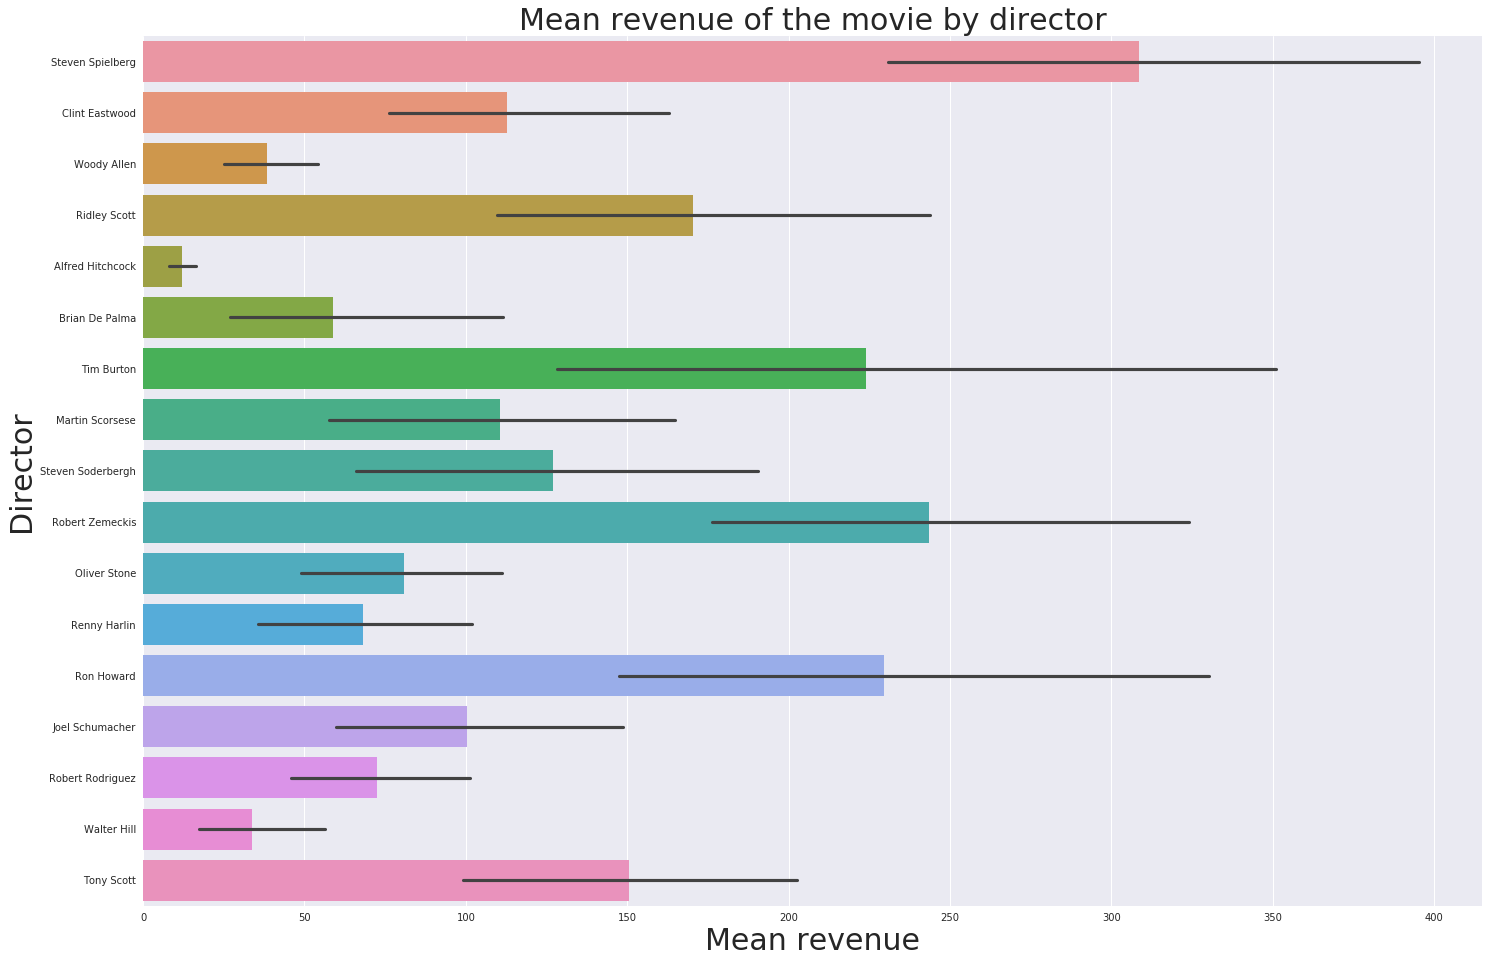

In [192]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_exp['revenue'], y=df_exp['director'], order=df_dir_count['director'].head(17))

plt.title('Mean revenue of the movie by director', size = 30)
plt.ylabel('Director', fontsize=30)
plt.xlabel('Mean revenue', fontsize=30);

sns.plt.show();

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


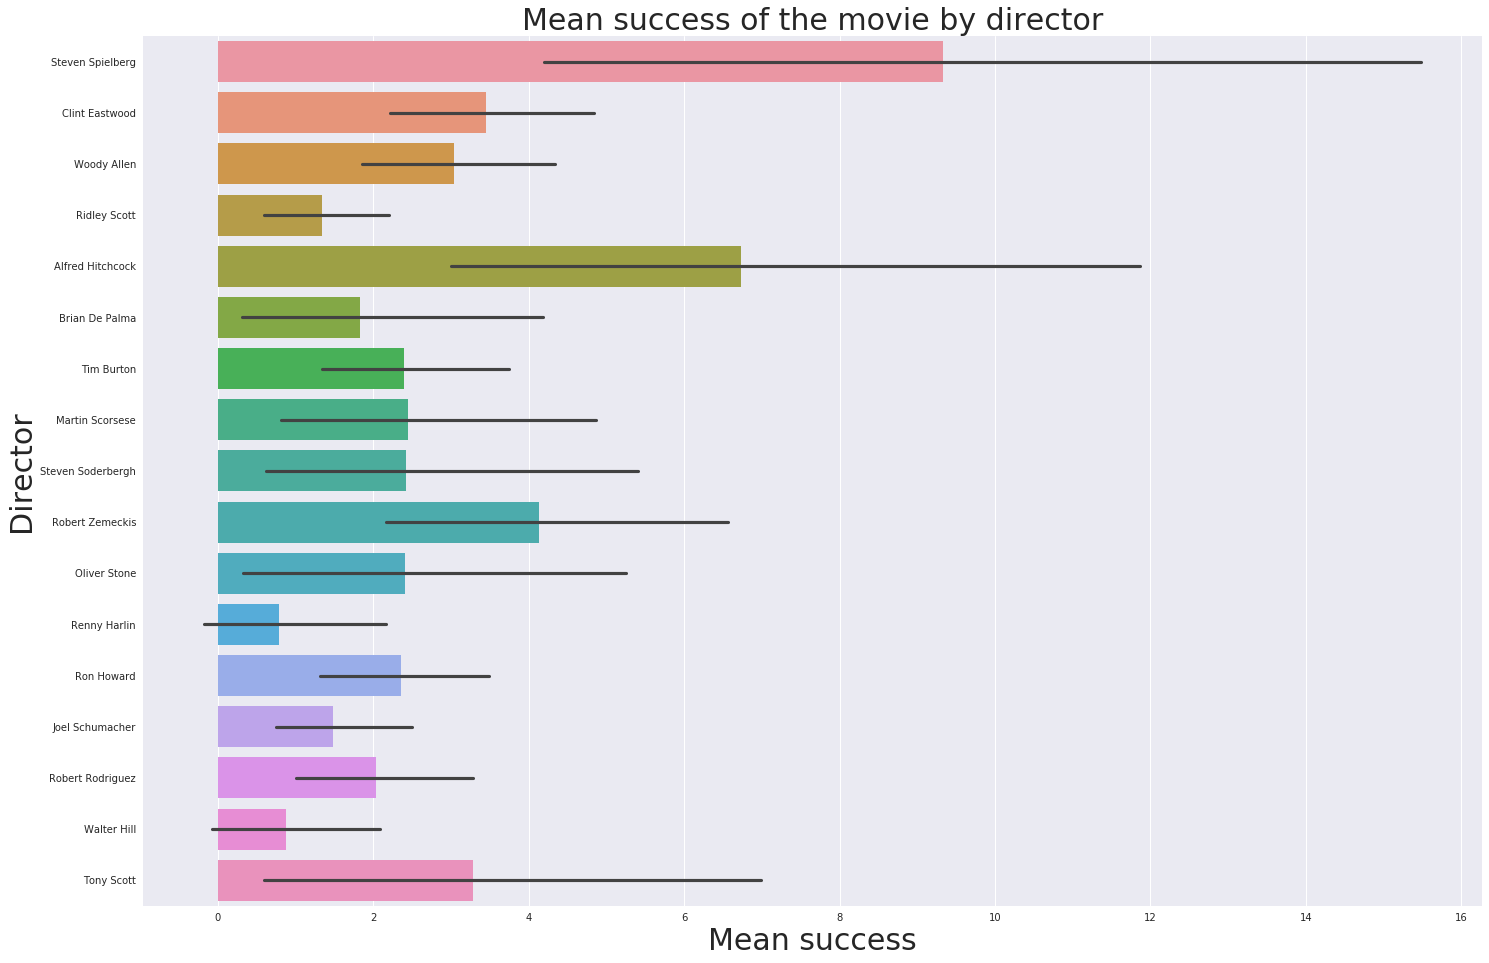

In [193]:
plt.figure(figsize = (24, 16))
ax = sns.barplot(x=df_exp['success'], y=df_exp['director'], order=df_dir_count['director'].head(17))

plt.title('Mean success of the movie by director', size = 30)
plt.ylabel('Director', fontsize=30)
plt.xlabel('Mean success', fontsize=30);

sns.plt.show();

In [194]:
df_exp[['title', 'director', 'success']].sort_values('success', ascending=False).head(15)

,title,director,success
14285,Paranormal Activity,Oren Peli,12889.386667
2610,The Blair Witch Project,Daniel Myrick,4132.333333
4334,The Way of the Dragon,Bruce Lee,652.846154
2260,Pink Flamingos,John Waters,499.000000
7824,Super Size Me,Morgan Spurlock,438.616585
31804,The Gallows,Travis Cluff,425.644100
9506,Open Water,Chris Kentis,419.522723
2358,The Texas Chain Saw Massacre,Tobe Hooper,362.047059
1921,Bambi,David Hand,310.709965
947,Night of the Living Dead,George A. Romero,262.157895


In [221]:
df_exp[df_exp['director'] == 'James Cameron'][['title', 'director', 'success', 'budget', 'revenue', 'release_date']].sort_values('budget', ascending=True)

,title,director,success,budget,revenue,release_date
1204,The Terminator,James Cameron,11.245500,6.4,78.371200,1984-10-26
6184,Ghosts of the Abyss,James Cameron,0.310836,13.0,17.040871,2003-04-10
1167,Aliens,James Cameron,8.908998,18.5,183.316455,1986-07-18
1101,The Abyss,James Cameron,0.285716,70.0,90.000098,1989-08-09
582,Terminator 2: Judgment Day,James Cameron,4.200000,100.0,520.000000,1991-07-01
375,True Lies,James Cameron,2.294630,115.0,378.882411,1994-07-14
1651,Titanic,James Cameron,8.225171,200.0,1845.034188,1997-11-18
14644,Avatar,James Cameron,10.763566,237.0,2787.965087,2009-12-10


In [223]:
df_exp[df_exp['director'] == 'Darren Aronofsky'][['title', 'director', 'success', 'budget', 'revenue', 'release_date']].sort_values('release_date', ascending=True)

,title,director,success,budget,revenue,release_date
1824,Pi,Darren Aronofsky,52.685867,0.06,3.221152,1998-07-10
3839,Requiem for a Dream,Darren Aronofsky,0.642246,4.50,7.390108,2000-10-27
11317,The Fountain,Darren Aronofsky,-0.562717,35.00,15.304890,2006-09-06
13264,The Wrestler,Darren Aronofsky,6.450666,6.00,44.703995,2008-09-07
16168,Black Swan,Darren Aronofsky,24.215672,13.00,327.803731,2010-12-02
23204,Noah,Darren Aronofsky,1.901100,125.00,362.637473,2014-03-20


### Amout of the movies made by director has nothing to do with it's success. Steven Spielberg is the champion by all means, but Alfred Hitchcock also showed great result and we can't compare budgets and revenues of this two, because they represent completely different eras of the movie. There is a lot of brilliant directors who created tons of legendary movies, even if there was just few of them in their career.

# In the next [notebook](./2_NLP_modeling.ipynb) we will try to predict financial success of the movies based on it's features.